In [574]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import torch
import sys
warnings.simplefilter('ignore')
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import re
from pymorphy2 import MorphAnalyzer
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error

In [575]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_colwidth',100)
np.set_printoptions(threshold=sys.maxsize)

In [576]:
df = pd.read_csv(r"C:\Users\nicka\OneDrive\Рабочий стол\all_data.csv",sep = ';',encoding = 'cp1251',index_col=0) #index_col=0 для того чтобы не было
df.sample(10)

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,phone,district,street,underground,residential_complex
3566,Century 21 Street Realty,real_estate_agent,https://www.cian.ru/sale/flat/287779591/,Москва_и_др.,sale,flat,7,14,5,128.0,663984,84990000,2021,55.0,36.0,79623676854,Раменки,проспект Генерала Дорохова,Ломоносовский проспект,West Garden
6088,МИР,real_estate_agent,https://krasnogorsk.cian.ru/sale/flat/286142592/,Москва_и_др.,sale,flat,13,14,1,37.3,171581,6400000,1981,17.0,8.8,79684263679,NaN,NaN,NaN,NaN
2288,Apple Real Estate,real_estate_agent,https://www.cian.ru/sale/flat/281352056/,Москва_и_др.,sale,flat,2,4,4,132.0,544696,71900000,2003,70.0,15.0,79670580817,Крылатское,Островной проезд,Молодёжная,Остров Фантазий
789,Адреса,real_estate_agent,https://krasnogorsk.cian.ru/sale/flat/285365745/,Москва_и_др.,sale,flat,3,24,1,41.0,190243,7800000,2017,18.8,10.1,79064592359,NaN,NaN,NaN,NaN
6422,RAN-realty,real_estate_agent,https://www.cian.ru/sale/flat/286728254/,Москва_и_др.,sale,flat,19,24,3,70.6,280311,19790000,2021,40.5,13.7,79660951832,Метрогородок,Тагильская,Бульвар Рокоссовского,Сиреневый парк
4902,Владис,real_estate_agent,https://www.cian.ru/sale/flat/286119579/,Москва_и_др.,sale,flat,1,9,-1,17.7,350282,6200000,-1,9.7,3.0,79645672951,Западное Дегунино,Дегунинская,Селигерская,NaN
184,ЕГЦН-М,real_estate_agent,https://khimki.cian.ru/sale/flat/287301406/,Москва_и_др.,sale,flat,2,5,1,37.0,142000,5254000,-1,27.8,2.2,79104217165,NaN,NaN,Хлебниково,NaN
525,Homeapp,real_estate_agent,https://www.cian.ru/sale/flat/287299260/,Москва_и_др.,sale,flat,12,12,1,35.0,347142,12150000,1965,22.0,6.0,79660531406,Ростокино,проспект Мира,Улица Сергея Эйзенштейна,NaN
5314,Самолет плюс МО,real_estate_agent,https://solnechnogorsk.cian.ru/sale/flat/287669247/,Москва_и_др.,sale,flat,4,5,1,31.0,132258,4100000,1975,19.0,7.0,79660610947,NaN,NaN,NaN,NaN
4077,ID 20212056,realtor,https://www.cian.ru/sale/flat/283010516/,Москва_и_др.,sale,flat,5,9,5,110.0,281727,30990000,2000,-1.0,44.0,79854780411,Матушкино,Зеленоград,NaN,NaN


In [538]:
sns.pairplot(data=df, diag_kind='kde')


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000016DF4EF8A60> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x0000016DFDA1C5E0> (for post_execute):



KeyboardInterrupt



<Axes: >

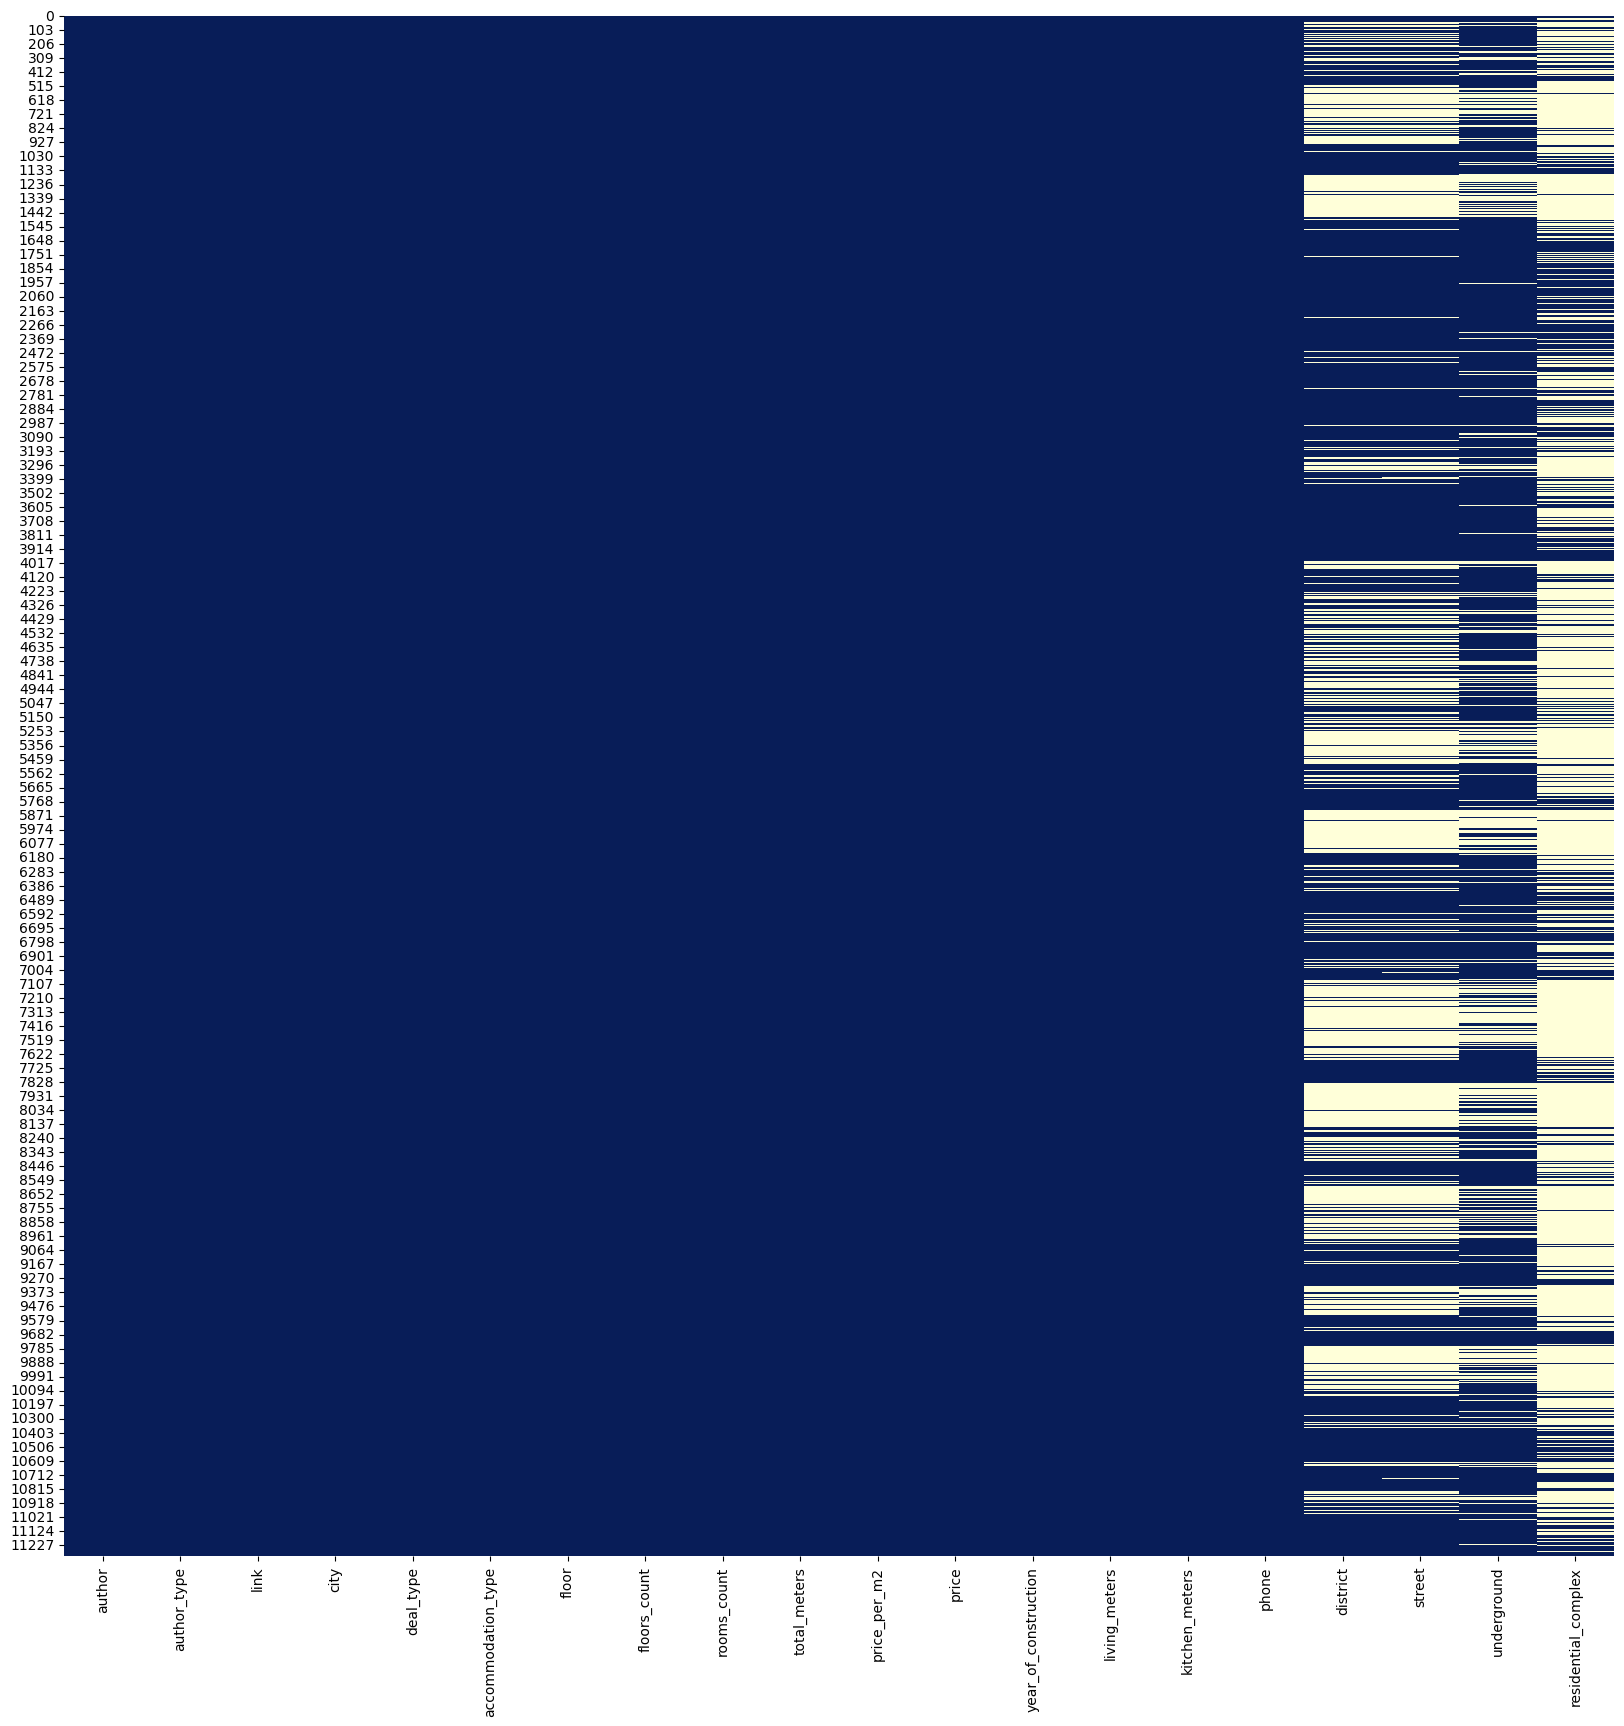

In [577]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df.isnull(),cmap="YlGnBu_r",cbar=False)

In [578]:
df.isna().sum()/df.shape[0]*100

author                   0.035367
author_type              0.035367
link                     0.000000
city                     0.000000
deal_type                0.000000
accommodation_type       0.000000
floor                    0.000000
floors_count             0.000000
rooms_count              0.000000
total_meters             0.000000
price_per_m2             0.000000
price                    0.000000
year_of_construction     0.000000
living_meters            0.000000
kitchen_meters           0.000000
phone                    0.000000
district                36.118479
street                  36.251105
underground             21.786030
residential_complex     67.559682
dtype: float64

In [579]:
df.head(100)

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,phone,district,street,underground,residential_complex
0,Константин Кудрявцев,realtor,https://www.cian.ru/sale/flat/283849683/,Москва_и_др.,sale,flat,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,79660408670,Текстильщики,Шкулева,Волжская,NaN
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/280986757/,Москва_и_др.,sale,flat,17,41,1,40.40,618811,25000000,2021,15.2,9.1,79646331510,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк
2,Времена года,real_estate_agent,https://www.cian.ru/sale/flat/286530258/,Москва_и_др.,sale,flat,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,79152007823,Хамовники,Усачева,Спортивная,Садовые кварталы
3,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/283638079/,Москва_и_др.,sale,flat,9,41,1,40.50,617283,25000000,2022,17.3,9.3,79646331510,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк
4,ID 44396977,realtor,https://www.cian.ru/sale/flat/287127196/,Москва_и_др.,sale,flat,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,79034356129,Нагатино-Садовники,Нагатинская набережная,Коломенская,NaN
5,Времена года,real_estate_agent,https://www.cian.ru/sale/flat/285378586/,Москва_и_др.,sale,flat,6,13,1,71.10,983122,69900000,2019,37.1,12.8,79152007823,Хамовники,Усачева,Спортивная,Садовые кварталы
6,ИТКОЛ,official_representative,https://www.cian.ru/sale/flat/287529888/,Москва_и_др.,sale,flat,7,9,1,18.00,382000,6876000,-1,-1.0,-1.0,79651098418,Аэропорт,Большой Коптевский проезд,Красный Балтиец,NaN
7,Century 21 Premium Property,real_estate_agent,https://www.cian.ru/sale/flat/287489122/,Москва_и_др.,sale,flat,33,36,1,75.00,626666,47000000,2020,35.0,20.0,79175213146,Хорошево-Мневники,Шелепихинская набережная,Шелепиха,Сердце Столицы
8,СТРОЙИНВЕСТ,real_estate_agent,https://balashikha.cian.ru/sale/flat/281454196/,Москва_и_др.,sale,flat,9,17,1,37.20,147072,5471080,2022,-1.0,-1.0,79647297235,NaN,NaN,Лухмановская,NaN
9,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/286402225/,Москва_и_др.,sale,flat,6,41,1,41.00,724390,29700000,2022,24.0,6.0,79165694109,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк


In [580]:
df['link'].head(100)

0             https://www.cian.ru/sale/flat/283849683/
1             https://www.cian.ru/sale/flat/280986757/
2             https://www.cian.ru/sale/flat/286530258/
3             https://www.cian.ru/sale/flat/283638079/
4             https://www.cian.ru/sale/flat/287127196/
5             https://www.cian.ru/sale/flat/285378586/
6             https://www.cian.ru/sale/flat/287529888/
7             https://www.cian.ru/sale/flat/287489122/
8      https://balashikha.cian.ru/sale/flat/281454196/
9             https://www.cian.ru/sale/flat/286402225/
10            https://www.cian.ru/sale/flat/283655536/
11            https://www.cian.ru/sale/flat/286844698/
12            https://www.cian.ru/sale/flat/279825134/
13            https://www.cian.ru/sale/flat/287613785/
14            https://www.cian.ru/sale/flat/287715516/
15            https://www.cian.ru/sale/flat/286193432/
16            https://www.cian.ru/sale/flat/273314840/
17            https://www.cian.ru/sale/flat/286309827/
18        

In [581]:
df['link'][8]

'https://balashikha.cian.ru/sale/flat/281454196/'

In [582]:
df['link'][8].find('/')+1

7

In [583]:
df['link'].apply(city).head(100).unique()

array(['www', 'balashikha', 'lyubertsy', 'khimki', 'krasnogorsk',
       'vidnoye', 'kotelniki', 'dolgoprudny'], dtype=object)

In [584]:
def city(link):
    if link[:10] == "https://www":
        return 'cian'
    else:
        return link[link.find('/')+2:link.find('.')]
df['city'] = df['link'].apply(city)

In [585]:
df.head(100)

,author,author_type,link,city,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,phone,district,street,underground,residential_complex
0,Константин Кудрявцев,realtor,https://www.cian.ru/sale/flat/283849683/,www,sale,flat,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,79660408670,Текстильщики,Шкулева,Волжская,NaN
1,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/280986757/,www,sale,flat,17,41,1,40.40,618811,25000000,2021,15.2,9.1,79646331510,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк
2,Времена года,real_estate_agent,https://www.cian.ru/sale/flat/286530258/,www,sale,flat,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,79152007823,Хамовники,Усачева,Спортивная,Садовые кварталы
3,White and Broughton,real_estate_agent,https://www.cian.ru/sale/flat/283638079/,www,sale,flat,9,41,1,40.50,617283,25000000,2022,17.3,9.3,79646331510,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк
4,ID 44396977,realtor,https://www.cian.ru/sale/flat/287127196/,www,sale,flat,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,79034356129,Нагатино-Садовники,Нагатинская набережная,Коломенская,NaN
5,Времена года,real_estate_agent,https://www.cian.ru/sale/flat/285378586/,www,sale,flat,6,13,1,71.10,983122,69900000,2019,37.1,12.8,79152007823,Хамовники,Усачева,Спортивная,Садовые кварталы
6,ИТКОЛ,official_representative,https://www.cian.ru/sale/flat/287529888/,www,sale,flat,7,9,1,18.00,382000,6876000,-1,-1.0,-1.0,79651098418,Аэропорт,Большой Коптевский проезд,Красный Балтиец,NaN
7,Century 21 Premium Property,real_estate_agent,https://www.cian.ru/sale/flat/287489122/,www,sale,flat,33,36,1,75.00,626666,47000000,2020,35.0,20.0,79175213146,Хорошево-Мневники,Шелепихинская набережная,Шелепиха,Сердце Столицы
8,СТРОЙИНВЕСТ,real_estate_agent,https://balashikha.cian.ru/sale/flat/281454196/,balashikha,sale,flat,9,17,1,37.20,147072,5471080,2022,-1.0,-1.0,79647297235,NaN,NaN,Лухмановская,NaN
9,Whitewill,real_estate_agent,https://www.cian.ru/sale/flat/286402225/,www,sale,flat,6,41,1,41.00,724390,29700000,2022,24.0,6.0,79165694109,Хорошевский,Ленинградский проспект,Аэропорт,Прайм Парк


In [586]:
df.shape

(11310, 20)

In [587]:
df = df.drop_duplicates()
df.shape

(8391, 20)

In [588]:
df_cop = df.copy()

# Вычисление ненужных данных

### City

### Ссылка на квартиры нам не понадобиться кроме (!!!!!) того как если бы мы показывали похожие квартиры и т.к. спарсили данные

In [589]:
df_cop.drop(columns = 'link',inplace = True)

### Deal_type

In [590]:
df_cop['deal_type'].unique()

array(['sale'], dtype=object)

In [591]:
df_cop.drop(columns = 'deal_type',inplace = True)

### Accommodation_type

In [592]:
df_cop['accommodation_type'].unique()

array(['flat'], dtype=object)

In [593]:
df_cop.drop(columns = 'accommodation_type',inplace = True)

### Телефон для нашей модели также не нужен т.к. это индивидуальная информация

In [594]:
df_cop.drop(columns = 'phone',inplace = True)

### Author и Author_type пользователь знать не сможет, т.к. мы просто будем оценивать квартиру

In [595]:
df_cop.drop(columns = ['author','author_type'],inplace = True)

In [596]:
df_cop.sample(20)

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,residential_complex
392,lyubertsy,2,3,1,37.00,148648,5500000,2016,18.0,10.0,NaN,NaN,NaN,NaN
776,krasnogorsk,6,8,1,34.07,220135,7500000,2021,14.3,9.7,NaN,NaN,NaN,NaN
4437,www,1,7,-1,16.70,200000,3340000,-1,12.8,-1.0,Коптево,Клары Цеткин,Красный Балтиец,NaN
3115,www,6,15,5,208.60,383509,80000000,1997,107.6,40.0,Пресненский,Зоологическая,Баррикадная,NaN
10767,www,6,10,4,170.00,488235,83000000,2005,-1.0,45.0,Пресненский,Климашкина,Улица 1905 года,Панорама
1388,shchyolkovo,12,17,1,43.00,143023,6149999,2017,19.0,12.0,NaN,NaN,Щёлковская,NaN
9577,www,5,25,3,65.00,338461,22000000,2022,20.3,33.9,Покровское-Стрешнево,Волоколамское шоссе,NaN,Апартаментный комплекс Level Стрешнево
8226,www,4,8,2,50.00,640000,32000000,-1,32.0,13.0,Гагаринский,Ленинский проспект,Площадь Гагарина,Lunar
9635,www,7,8,3,81.00,345679,28000000,1960,55.0,9.0,Дорогомилово,1812 года,Парк Победы,NaN
1816,www,7,12,3,150.00,532666,79900000,2019,115.0,20.0,Аэропорт,Ленинградский проспект,Динамо,ВТБ Арена парк


In [597]:
df_cop.sample(100)

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,residential_complex
9284,www,5,12,3,139.00,705035,98000000,2006,113.0,13.0,Раменки,Улофа Пальме,NaN,Lake House
8470,www,2,22,2,56.40,336879,19000000,2009,33.0,10.0,Обручевский,Новаторов,Новаторская,NaN
8327,vidnoye,3,17,2,56.50,159292,8999999,2017,29.2,12.1,NaN,NaN,NaN,NaN
3575,www,5,23,5,200.00,430000,86000000,2010,140.0,25.0,Останкинский,Академика Королева,Улица Академика Королёва,Седьмое Небо
1320,lobnya,2,5,1,31.70,176656,5600000,1961,19.0,-1.0,NaN,NaN,NaN,NaN
2401,www,2,16,4,90.00,248888,22399999,1997,54.8,11.0,Бескудниковский,Дубнинская,Верхние Лихоборы,NaN
7174,www,1,5,-1,10.00,340000,3400000,1958,-1.0,-1.0,Котловка,Ремизова,Нагорная,NaN
7429,vidnoye,9,17,1,25.00,168000,4200000,2017,15.0,4.0,NaN,NaN,NaN,NaN
6568,www,2,6,3,121.60,649588,78990000,1915,-1.0,-1.0,Арбат,Арбат,Арбатская,NaN
6537,www,1,9,3,81.00,419753,34000000,1952,53.0,12.0,Дорогомилово,Бережковская набережная,Киевская,NaN


И удаляем ненужные колонки из датасета

In [598]:
df_cop.drop(columns = ['street','residential_complex'],inplace = True)

In [599]:
df_cop.sample(100)

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
8283,www,10,15,2,60.6,346534,21000000,2021,-1.0,25.1,Останкинский,NaN
3577,www,2,4,5,149.0,583892,87000000,1890,119.0,-1.0,Басманный,Китай-город
8758,vidnoye,9,17,2,49.5,177777,8800000,2022,27.6,11.2,NaN,NaN
590,lyubertsy,9,17,1,32.4,177469,5749999,2020,10.0,12.0,NaN,NaN
9077,www,5,16,2,63.7,250392,15950000,2021,32.0,16.9,NaN,Прокшино
3117,www,2,6,5,111.0,720720,80000000,1900,85.0,12.0,Замоскворечье,Новокузнецкая
8325,shchyolkovo,8,16,2,67.0,129850,8700000,2015,40.0,13.0,NaN,Щёлковская
1519,lobnya,19,20,2,70.0,117857,8250000,2008,37.5,11.0,NaN,Лобня
2321,www,12,13,4,185.0,864864,160000000,2000,-1.0,-1.0,Арбат,Смоленская
11074,www,13,24,4,146.0,437671,63900000,2006,98.0,14.4,Хорошевский,ЦСКА


In [600]:
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,Текстильщики,Волжская
1,www,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский,Аэропорт
2,www,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,Хамовники,Спортивная
3,www,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский,Аэропорт
4,www,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,Нагатино-Садовники,Коломенская
...,...,...,...,...,...,...,...,...,...,...,...,...
11150,www,11,22,4,119.40,293132,35000000,2004,67.3,17.8,Обручевский,Тропарёво
11287,www,11,17,4,172.63,434455,74999999,2008,-1.0,-1.0,Хорошевский,ЦСКА
11303,www,37,78,2,73.00,602739,44000000,2020,-1.0,-1.0,Пресненский,Тестовская
11304,www,3,5,2,42.00,892142,37470000,2021,-1.0,-1.0,Замоскворечье,Новокузнецкая


<Axes: >

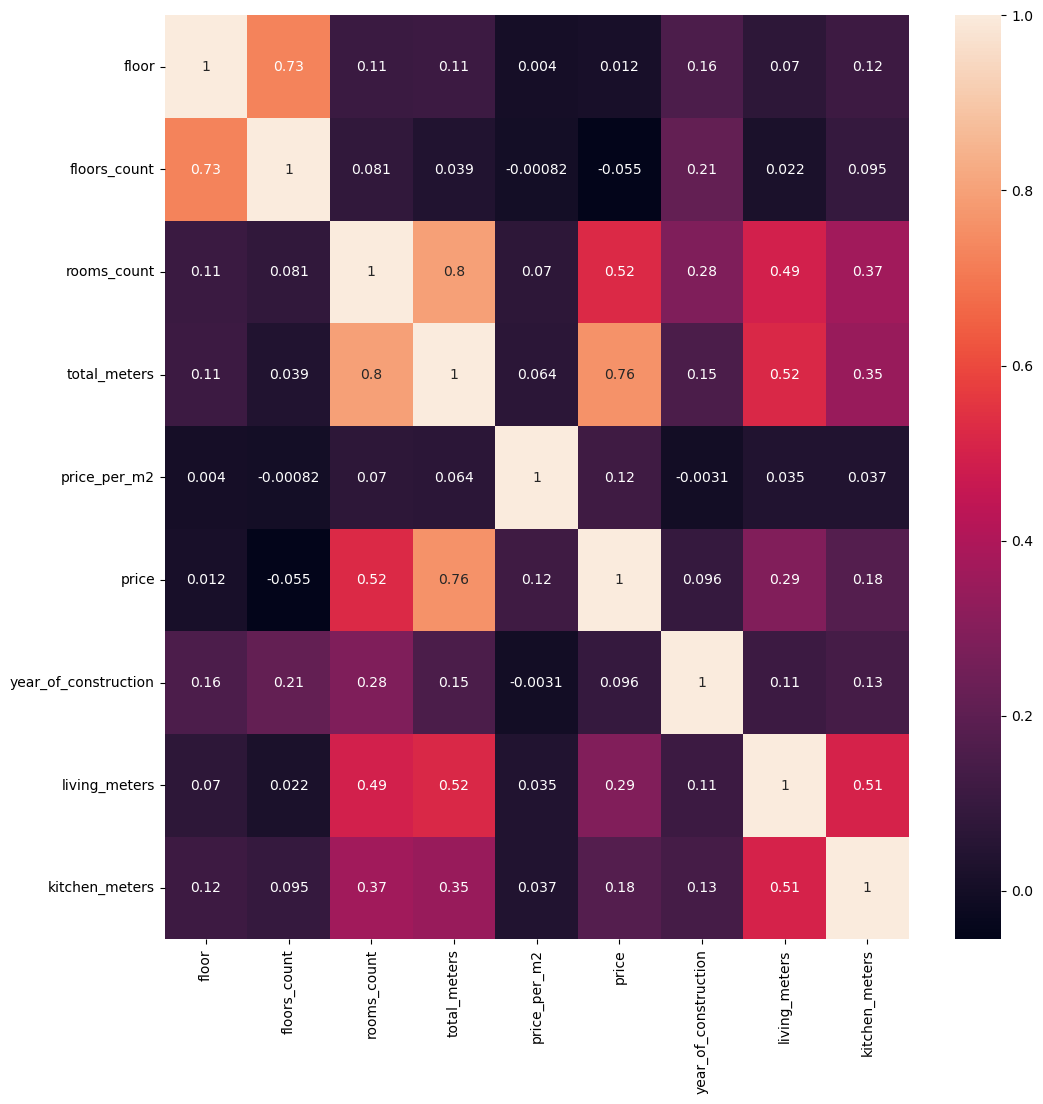

In [601]:
plt.figure(figsize = (12,12))
sns.heatmap(df_cop.drop(columns = ['district','underground']).corr(),annot = True)

Смотрим на nan значения

<Axes: >

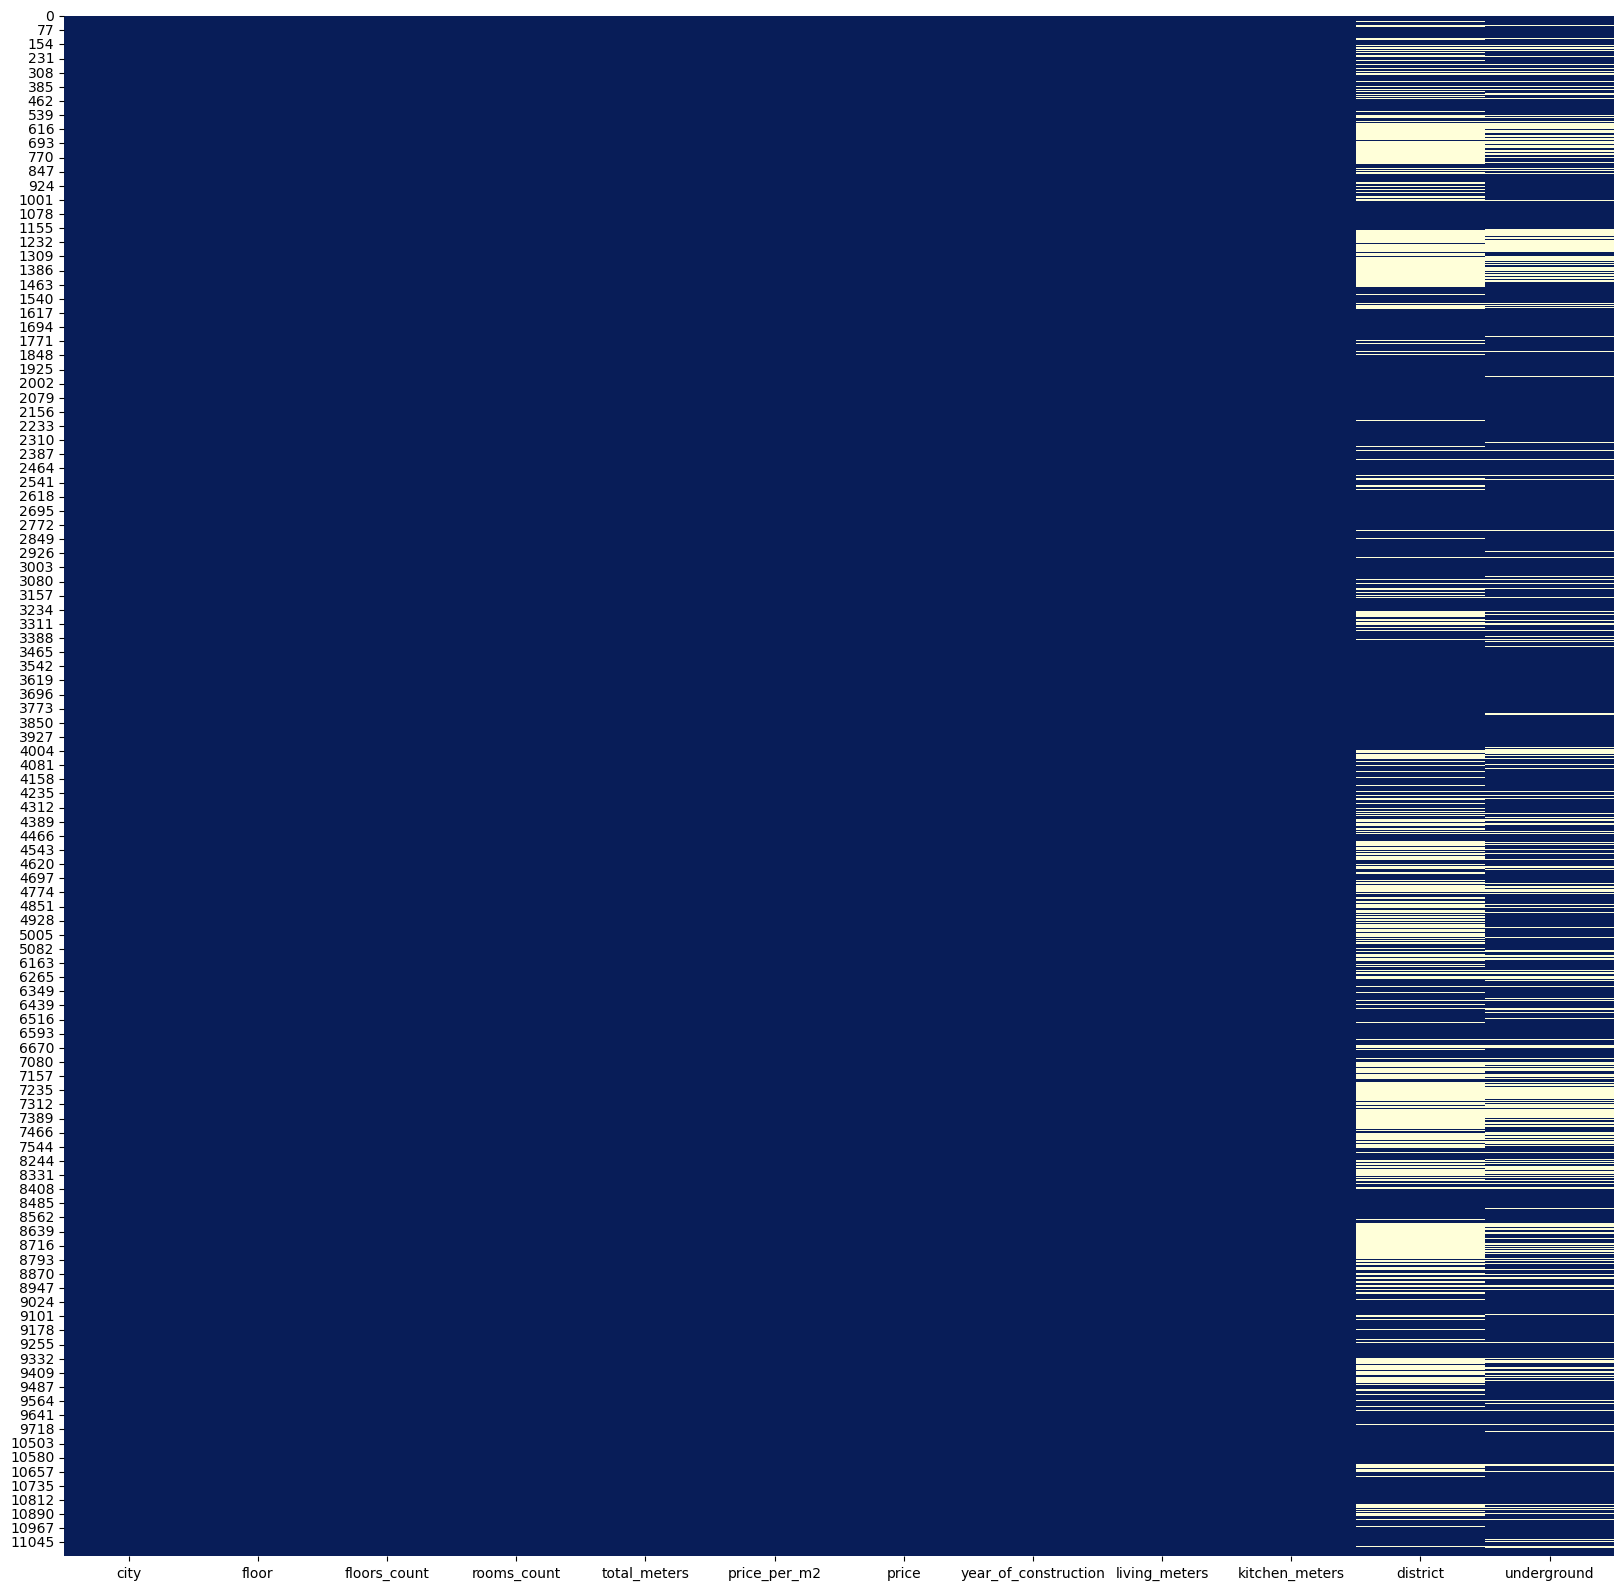

In [602]:
plt.figure(figsize = (20,20))
sns.heatmap(data = df_cop.isnull(),cmap="YlGnBu_r",cbar=False)

In [603]:
df_cop.isna().sum()/df.shape[0]*100

city                     0.000000
floor                    0.000000
floors_count             0.000000
rooms_count              0.000000
total_meters             0.000000
price_per_m2             0.000000
price                    0.000000
year_of_construction     0.000000
living_meters            0.000000
kitchen_meters           0.000000
district                32.785127
underground             19.628173
dtype: float64

In [604]:
df_cop.isna().sum()

city                       0
floor                      0
floors_count               0
rooms_count                0
total_meters               0
price_per_m2               0
price                      0
year_of_construction       0
living_meters              0
kitchen_meters             0
district                2751
underground             1647
dtype: int64

In [605]:
df_cop = df_cop.fillna('unk')
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,Текстильщики,Волжская
1,www,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский,Аэропорт
2,www,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,Хамовники,Спортивная
3,www,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский,Аэропорт
4,www,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,Нагатино-Садовники,Коломенская
...,...,...,...,...,...,...,...,...,...,...,...,...
11150,www,11,22,4,119.40,293132,35000000,2004,67.3,17.8,Обручевский,Тропарёво
11287,www,11,17,4,172.63,434455,74999999,2008,-1.0,-1.0,Хорошевский,ЦСКА
11303,www,37,78,2,73.00,602739,44000000,2020,-1.0,-1.0,Пресненский,Тестовская
11304,www,3,5,2,42.00,892142,37470000,2021,-1.0,-1.0,Замоскворечье,Новокузнецкая


In [606]:
df_cop.dropna(inplace = True)
df_cop.reset_index(drop = True,inplace = True)
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,Текстильщики,Волжская
1,www,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский,Аэропорт
2,www,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,Хамовники,Спортивная
3,www,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский,Аэропорт
4,www,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,Нагатино-Садовники,Коломенская
...,...,...,...,...,...,...,...,...,...,...,...,...
8386,www,11,22,4,119.40,293132,35000000,2004,67.3,17.8,Обручевский,Тропарёво
8387,www,11,17,4,172.63,434455,74999999,2008,-1.0,-1.0,Хорошевский,ЦСКА
8388,www,37,78,2,73.00,602739,44000000,2020,-1.0,-1.0,Пресненский,Тестовская
8389,www,3,5,2,42.00,892142,37470000,2021,-1.0,-1.0,Замоскворечье,Новокузнецкая


In [607]:
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,1,5,1,12.00,291666,3500000,-1,-1.0,-1.0,Текстильщики,Волжская
1,www,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский,Аэропорт
2,www,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,Хамовники,Спортивная
3,www,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский,Аэропорт
4,www,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,Нагатино-Садовники,Коломенская
...,...,...,...,...,...,...,...,...,...,...,...,...
8386,www,11,22,4,119.40,293132,35000000,2004,67.3,17.8,Обручевский,Тропарёво
8387,www,11,17,4,172.63,434455,74999999,2008,-1.0,-1.0,Хорошевский,ЦСКА
8388,www,37,78,2,73.00,602739,44000000,2020,-1.0,-1.0,Пресненский,Тестовская
8389,www,3,5,2,42.00,892142,37470000,2021,-1.0,-1.0,Замоскворечье,Новокузнецкая


In [608]:
print('floor')
print(np.sort(df_cop['floor'].unique()))
print('floors_count')
print(np.sort(df_cop['floors_count'].unique()))
print('rooms_count')
print(np.sort(df_cop['rooms_count'].unique()))
print('total_meters')
print(np.sort(df_cop['total_meters'].unique()))
print('price_per_m2')
print(np.sort(df_cop['price_per_m2'].unique()))
print('year_of_construction')
print(np.sort(df_cop['year_of_construction'].unique()))
print('living_meters')
print(np.sort(df_cop['living_meters'].unique()))
print('kitchen_meters')
print(np.sort(df_cop['kitchen_meters'].unique()))

floor
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 61 62 63 66 67 75 78 79 92]
floors_count
[-1  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 63 64 65 67 69 73 75 76 77 78 79
 82 85 86 87 95]
rooms_count
[-1  1  2  3  4  5]
total_meters
[-1.0000e+00  1.0100e-01  1.2000e-01  7.5000e+00  8.7000e+00  1.0000e+01
  1.0300e+01  1.0400e+01  1.0500e+01  1.0600e+01  1.1000e+01  1.1100e+01
  1.1400e+01  1.1500e+01  1.1600e+01  1.1700e+01  1.1800e+01  1.1900e+01
  1.2000e+01  1.2100e+01  1.2300e+01  1.2400e+01  1.2500e+01  1.2600e+01
  1.2700e+01  1.2800e+01  1.3000e+01  1.3100e+01  1.3200e+01  1.3300e+01
  1.3400e+01  1.3500e+01  1.3600e+01  1.3700e+01  1.3800e+01  1.3900e+01
  1.4000e+01  1.4100e+01  1.4200e+01  1.4300e+01  1.44

# Выбросы

In [609]:
def quantiles(arr):
    work_val = arr.copy()
    Q1 = work_val.quantile(0.25)#np.percentile(work_val, 25, method= 'midpoint')
    Q3 = work_val.quantile(0.75)#np.percentile(work_val, 75, method= 'midpoint')
    IQR = Q3-Q1
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    return upper,lower

def anti_emmi(df):
    if df.select_dtypes(include = [np.number]).all().any():
        for col in df.select_dtypes(include = [np.number]).columns:
            
            up,low = quantiles(df[col])
            df = df[~(df[col] < low) | (df[col] > up)]

    return df.reset_index(drop=True)

In [610]:
df_cop = anti_emmi(df_cop)
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,17,41,1,40.40,618811,25000000,2021,15.2,9.1,Хорошевский,Аэропорт
1,www,5,14,1,61.97,919799,57000000,2022,-1.0,-1.0,Хамовники,Спортивная
2,www,9,41,1,40.50,617283,25000000,2022,17.3,9.3,Хорошевский,Аэропорт
3,www,12,17,1,47.60,324579,15450000,2019,-1.0,10.0,Нагатино-Садовники,Коломенская
4,www,6,13,1,71.10,983122,69900000,2019,37.1,12.8,Хамовники,Спортивная
...,...,...,...,...,...,...,...,...,...,...,...,...
7500,www,11,22,4,119.40,293132,35000000,2004,67.3,17.8,Обручевский,Тропарёво
7501,www,11,17,4,172.63,434455,74999999,2008,-1.0,-1.0,Хорошевский,ЦСКА
7502,www,37,78,2,73.00,602739,44000000,2020,-1.0,-1.0,Пресненский,Тестовская
7503,www,3,5,2,42.00,892142,37470000,2021,-1.0,-1.0,Замоскворечье,Новокузнецкая


In [611]:
df_cop.columns

Index(['city', 'floor', 'floors_count', 'rooms_count', 'total_meters',
       'price_per_m2', 'price', 'year_of_construction', 'living_meters',
       'kitchen_meters', 'district', 'underground'],
      dtype='object')

In [612]:
for col in df_cop.drop(columns = ['district','underground','city']).columns:
    print(col)
    print(df_cop[df_cop[col]<0][col].unique())

floor
[-1]
floors_count
[-1]
rooms_count
[-1]
total_meters
[]
price_per_m2
[]
price
[]
year_of_construction
[]
living_meters
[-1.]
kitchen_meters
[-1.]


Если значение = -1 (тоесть отсутствует) оно заменяется на среднее по колонке

In [613]:
df_cop.columns[:-1]

Index(['city', 'floor', 'floors_count', 'rooms_count', 'total_meters',
       'price_per_m2', 'price', 'year_of_construction', 'living_meters',
       'kitchen_meters', 'district'],
      dtype='object')

In [614]:
for col in df_cop.drop(columns = ['district','underground','city']).columns:
    df_cop = df_cop.drop(df_cop[df_cop[col] < 0].index)

In [616]:
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,17,41,1,40.4,618811,25000000,2021,15.2,9.1,Хорошевский,Аэропорт
2,www,9,41,1,40.5,617283,25000000,2022,17.3,9.3,Хорошевский,Аэропорт
4,www,6,13,1,71.1,983122,69900000,2019,37.1,12.8,Хамовники,Спортивная
5,www,33,36,1,75.0,626666,47000000,2020,35.0,20.0,Хорошево-Мневники,Шелепиха
7,www,6,41,1,41.0,724390,29700000,2022,24.0,6.0,Хорошевский,Аэропорт
...,...,...,...,...,...,...,...,...,...,...,...,...
7491,www,23,30,4,230.0,382608,88000000,2001,140.0,24.0,Проспект Вернадского,Новаторская
7493,www,9,79,2,62.1,668276,41500000,2020,46.8,10.0,Пресненский,Деловой центр
7496,www,38,47,3,144.5,380622,55000000,2006,96.3,11.7,Раменки,Минская
7498,www,7,14,4,144.9,441683,64000000,2000,85.0,16.0,Замоскворечье,Павелецкая


## Заменяем значения с -1 средним по годам

def meen_yer(year):
    return round(df_cop[(df_cop['year_of_construction'] == year) & (df_cop[col] > -1)][col].mean(),2)
for col in df_cop.columns[:-1]:
    df_cop.loc[df_cop[col] < 0,col] = df_cop.loc[df_cop[col] < 0,'year_of_construction'].apply(meen_yer)

In [617]:
# def meen_room(num):
#     return round(df_cop[(df_cop['rooms_count'] == num)][col].mean(),2)
# col = 'kitchen_meters'
# kit_met = df_cop['rooms_count'].apply(meen_room)
# kit_met

In [618]:
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,17,41,1,40.4,618811,25000000,2021,15.2,9.1,Хорошевский,Аэропорт
2,www,9,41,1,40.5,617283,25000000,2022,17.3,9.3,Хорошевский,Аэропорт
4,www,6,13,1,71.1,983122,69900000,2019,37.1,12.8,Хамовники,Спортивная
5,www,33,36,1,75.0,626666,47000000,2020,35.0,20.0,Хорошево-Мневники,Шелепиха
7,www,6,41,1,41.0,724390,29700000,2022,24.0,6.0,Хорошевский,Аэропорт
...,...,...,...,...,...,...,...,...,...,...,...,...
7491,www,23,30,4,230.0,382608,88000000,2001,140.0,24.0,Проспект Вернадского,Новаторская
7493,www,9,79,2,62.1,668276,41500000,2020,46.8,10.0,Пресненский,Деловой центр
7496,www,38,47,3,144.5,380622,55000000,2006,96.3,11.7,Раменки,Минская
7498,www,7,14,4,144.9,441683,64000000,2000,85.0,16.0,Замоскворечье,Павелецкая


In [619]:
df_cop.describe()

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters
count,4989.000000,4989.000000,4989.000000,4989.000000,4.989000e+03,4.989000e+03,4989.000000,4989.000000,4989.000000
mean,8.714372,16.433754,2.612548,88.144145,4.124840e+05,4.472482e+07,2001.467428,52.364121,13.100742
std,7.684668,10.664823,1.467781,69.796120,2.536938e+06,8.038218e+07,26.056743,44.614680,8.325094
min,1.000000,1.000000,1.000000,0.101000,3.958600e+04,1.550000e+06,1910.000000,3.000000,1.000000
25%,3.000000,9.000000,1.000000,38.500000,1.854460e+05,8.100000e+06,1993.000000,19.000000,8.000000
50%,6.000000,15.000000,2.000000,63.300000,2.858850e+05,1.650000e+07,2013.000000,36.000000,10.800000
75%,12.000000,22.000000,4.000000,118.000000,4.416830e+05,4.700000e+07,2020.000000,72.000000,16.000000
max,75.000000,95.000000,5.000000,885.000000,1.782178e+08,1.650000e+09,2025.000000,680.000000,99.000000


In [620]:
df_cop = df_cop.drop(df_cop[df_cop['total_meters']<13].index)
df_cop = df_cop.drop(df_cop[(df_cop['living_meters'] + df_cop['kitchen_meters'])>df_cop['total_meters']].index)
df_cop.describe()

,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters
count,4976.000000,4976.000000,4976.000000,4976.000000,4.976000e+03,4.976000e+03,4976.000000,4976.000000,4976.000000
mean,8.723674,16.444936,2.615756,88.343497,3.767041e+05,4.482361e+07,2001.447548,52.465756,13.118911
std,7.690248,10.671080,1.467869,69.777710,3.110868e+05,8.046341e+07,26.059971,44.619825,8.322060
min,1.000000,1.000000,1.000000,13.800000,3.958600e+04,1.550000e+06,1910.000000,5.000000,2.000000
25%,3.000000,9.000000,1.000000,38.700000,1.851438e+05,8.100000e+06,1993.000000,19.000000,8.000000
50%,6.000000,15.000000,2.000000,63.550000,2.856170e+05,1.657500e+07,2013.000000,36.050000,10.800000
75%,12.000000,22.000000,4.000000,118.000000,4.416830e+05,4.700000e+07,2020.000000,72.000000,16.000000
max,75.000000,95.000000,5.000000,885.000000,4.583333e+06,1.650000e+09,2025.000000,680.000000,99.000000


<Axes: >

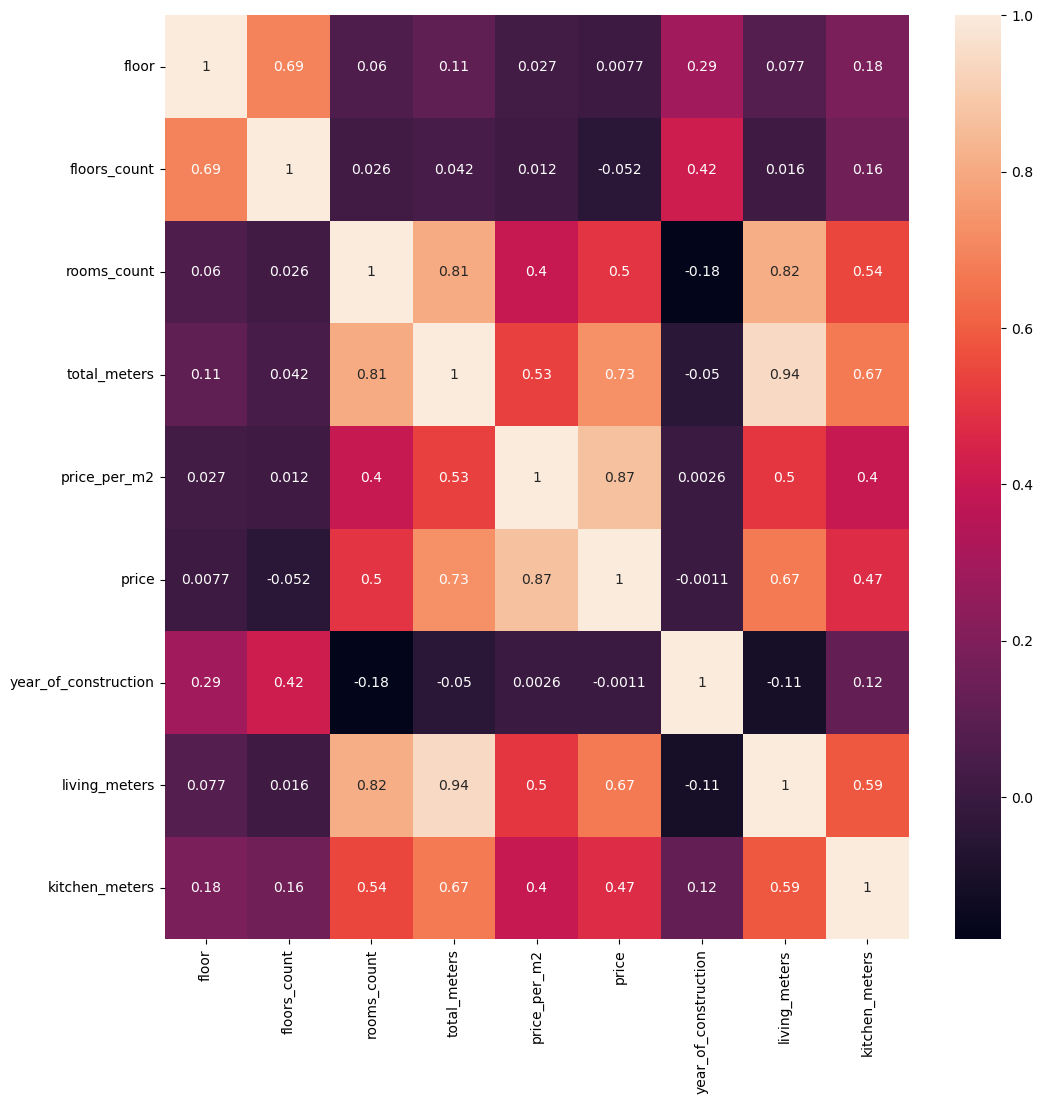

In [621]:
plt.figure(figsize = (12,12))
sns.heatmap(df_cop.drop(columns = ['district','underground','city']).corr(),annot = True)

In [622]:
df_cop.shape

(4976, 12)

In [623]:
for col in df_cop.drop(columns = ['district','underground','city']).columns:
    print(col)
    print(df_cop[df_cop[col]<0][col].unique())

floor
[]
floors_count
[]
rooms_count
[]
total_meters
[]
price_per_m2
[]
price
[]
year_of_construction
[]
living_meters
[]
kitchen_meters
[]


In [624]:
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4976 entries, 0 to 7500
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  4976 non-null   object 
 1   floor                 4976 non-null   int64  
 2   floors_count          4976 non-null   int64  
 3   rooms_count           4976 non-null   int64  
 4   total_meters          4976 non-null   float64
 5   price_per_m2          4976 non-null   int64  
 6   price                 4976 non-null   int64  
 7   year_of_construction  4976 non-null   int64  
 8   living_meters         4976 non-null   float64
 9   kitchen_meters        4976 non-null   float64
 10  district              4976 non-null   object 
 11  underground           4976 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 505.4+ KB


In [625]:
df_cop.dropna(inplace = True)
df_cop.reset_index(drop = True,inplace = True)
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,17,41,1,40.4,618811,25000000,2021,15.2,9.1,Хорошевский,Аэропорт
1,www,9,41,1,40.5,617283,25000000,2022,17.3,9.3,Хорошевский,Аэропорт
2,www,6,13,1,71.1,983122,69900000,2019,37.1,12.8,Хамовники,Спортивная
3,www,33,36,1,75.0,626666,47000000,2020,35.0,20.0,Хорошево-Мневники,Шелепиха
4,www,6,41,1,41.0,724390,29700000,2022,24.0,6.0,Хорошевский,Аэропорт
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,www,23,30,4,230.0,382608,88000000,2001,140.0,24.0,Проспект Вернадского,Новаторская
4972,www,9,79,2,62.1,668276,41500000,2020,46.8,10.0,Пресненский,Деловой центр
4973,www,38,47,3,144.5,380622,55000000,2006,96.3,11.7,Раменки,Минская
4974,www,7,14,4,144.9,441683,64000000,2000,85.0,16.0,Замоскворечье,Павелецкая


In [626]:
patterns = "[0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
stopwords_ru = stopwords.words("russian")
morph = MorphAnalyzer()
def lemmatize(doc):
    doc = re.sub(patterns, ' ', doc)
    tokens = []
    for token in doc.split():
        if token and token not in stopwords_ru:
            token = token.strip()
            token = morph.normal_forms(token)[0]
            
            tokens.append(token)
    #if len(tokens) > 2:
    return tokens
    #return None
    
df_cop['district'] = df_cop['district'].apply(lemmatize)
df_cop['underground'] = df_cop['underground'].apply(lemmatize)

In [627]:
def concat(text):
    text= ' '.join(text)
    return text

df_cop['district'] = df_cop['district'].apply(concat)
df_cop['underground'] = df_cop['underground'].apply(concat)

In [628]:
df_cop

,city,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters,district,underground
0,www,17,41,1,40.4,618811,25000000,2021,15.2,9.1,хорошевский,аэропорт
1,www,9,41,1,40.5,617283,25000000,2022,17.3,9.3,хорошевский,аэропорт
2,www,6,13,1,71.1,983122,69900000,2019,37.1,12.8,хамовник,спортивный
3,www,33,36,1,75.0,626666,47000000,2020,35.0,20.0,хорошево мнёвники,шелепиха
4,www,6,41,1,41.0,724390,29700000,2022,24.0,6.0,хорошевский,аэропорт
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,www,23,30,4,230.0,382608,88000000,2001,140.0,24.0,проспект вернадский,новаторский
4972,www,9,79,2,62.1,668276,41500000,2020,46.8,10.0,пресненский,деловой центр
4973,www,38,47,3,144.5,380622,55000000,2006,96.3,11.7,раменки,минский
4974,www,7,14,4,144.9,441683,64000000,2000,85.0,16.0,замоскворечье,павелецкий


In [684]:
len(df_cop['city'].unique())

52

In [629]:
len(df_cop['district'].unique())

135

In [630]:
len(df_cop['underground'].unique())

288

In [631]:
df_cop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4976 entries, 0 to 4975
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  4976 non-null   object 
 1   floor                 4976 non-null   int64  
 2   floors_count          4976 non-null   int64  
 3   rooms_count           4976 non-null   int64  
 4   total_meters          4976 non-null   float64
 5   price_per_m2          4976 non-null   int64  
 6   price                 4976 non-null   int64  
 7   year_of_construction  4976 non-null   int64  
 8   living_meters         4976 non-null   float64
 9   kitchen_meters        4976 non-null   float64
 10  district              4976 non-null   object 
 11  underground           4976 non-null   object 
dtypes: float64(3), int64(6), object(3)
memory usage: 466.6+ KB


In [632]:
df_cop[['city','district','underground']]

,city,district,underground
0,www,хорошевский,аэропорт
1,www,хорошевский,аэропорт
2,www,хамовник,спортивный
3,www,хорошево мнёвники,шелепиха
4,www,хорошевский,аэропорт
...,...,...,...
4971,www,проспект вернадский,новаторский
4972,www,пресненский,деловой центр
4973,www,раменки,минский
4974,www,замоскворечье,павелецкий


In [633]:
pd.concat([df_cop[['city','district','underground']],df_cop.drop(columns = ['city','district','underground'])],axis = 1)

,city,district,underground,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters
0,www,хорошевский,аэропорт,17,41,1,40.4,618811,25000000,2021,15.2,9.1
1,www,хорошевский,аэропорт,9,41,1,40.5,617283,25000000,2022,17.3,9.3
2,www,хамовник,спортивный,6,13,1,71.1,983122,69900000,2019,37.1,12.8
3,www,хорошево мнёвники,шелепиха,33,36,1,75.0,626666,47000000,2020,35.0,20.0
4,www,хорошевский,аэропорт,6,41,1,41.0,724390,29700000,2022,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,www,проспект вернадский,новаторский,23,30,4,230.0,382608,88000000,2001,140.0,24.0
4972,www,пресненский,деловой центр,9,79,2,62.1,668276,41500000,2020,46.8,10.0
4973,www,раменки,минский,38,47,3,144.5,380622,55000000,2006,96.3,11.7
4974,www,замоскворечье,павелецкий,7,14,4,144.9,441683,64000000,2000,85.0,16.0


In [634]:
df_cop = pd.concat([df_cop[['city','district','underground']],df_cop.drop(columns = ['city','district','underground'])],axis = 1)

In [635]:
df_cop

,city,district,underground,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters
0,www,хорошевский,аэропорт,17,41,1,40.4,618811,25000000,2021,15.2,9.1
1,www,хорошевский,аэропорт,9,41,1,40.5,617283,25000000,2022,17.3,9.3
2,www,хамовник,спортивный,6,13,1,71.1,983122,69900000,2019,37.1,12.8
3,www,хорошево мнёвники,шелепиха,33,36,1,75.0,626666,47000000,2020,35.0,20.0
4,www,хорошевский,аэропорт,6,41,1,41.0,724390,29700000,2022,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,www,проспект вернадский,новаторский,23,30,4,230.0,382608,88000000,2001,140.0,24.0
4972,www,пресненский,деловой центр,9,79,2,62.1,668276,41500000,2020,46.8,10.0
4973,www,раменки,минский,38,47,3,144.5,380622,55000000,2006,96.3,11.7
4974,www,замоскворечье,павелецкий,7,14,4,144.9,441683,64000000,2000,85.0,16.0


In [636]:
df_cop.iloc[:, [0,1,2]]

,city,district,underground
0,www,хорошевский,аэропорт
1,www,хорошевский,аэропорт
2,www,хамовник,спортивный
3,www,хорошево мнёвники,шелепиха
4,www,хорошевский,аэропорт
...,...,...,...
4971,www,проспект вернадский,новаторский
4972,www,пресненский,деловой центр
4973,www,раменки,минский
4974,www,замоскворечье,павелецкий


In [637]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_cop.iloc[:, [0,1,2]] = df_cop.iloc[:, [0,1,2]].apply(le.fit_transform)

import joblib
joblib.dump(le, 'label_encoder.joblib')

['label_encoder.joblib']

In [638]:
df_cop

,city,district,underground,floor,floors_count,rooms_count,total_meters,price_per_m2,price,year_of_construction,living_meters,kitchen_meters
0,47,120,14,17,41,1,40.4,618811,25000000,2021,15.2,9.1
1,47,120,14,9,41,1,40.5,617283,25000000,2022,17.3,9.3
2,47,117,221,6,13,1,71.1,983122,69900000,2019,37.1,12.8
3,47,119,275,33,36,1,75.0,626666,47000000,2020,35.0,20.0
4,47,120,14,6,41,1,41.0,724390,29700000,2022,24.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4971,47,85,140,23,30,4,230.0,382608,88000000,2001,140.0,24.0
4972,47,84,55,9,79,2,62.1,668276,41500000,2020,46.8,10.0
4973,47,87,123,38,47,3,144.5,380622,55000000,2006,96.3,11.7
4974,47,33,163,7,14,4,144.9,441683,64000000,2000,85.0,16.0


# Модели!!!!!!!!!!!!!!!!!!!!!!!!!

<Axes: >

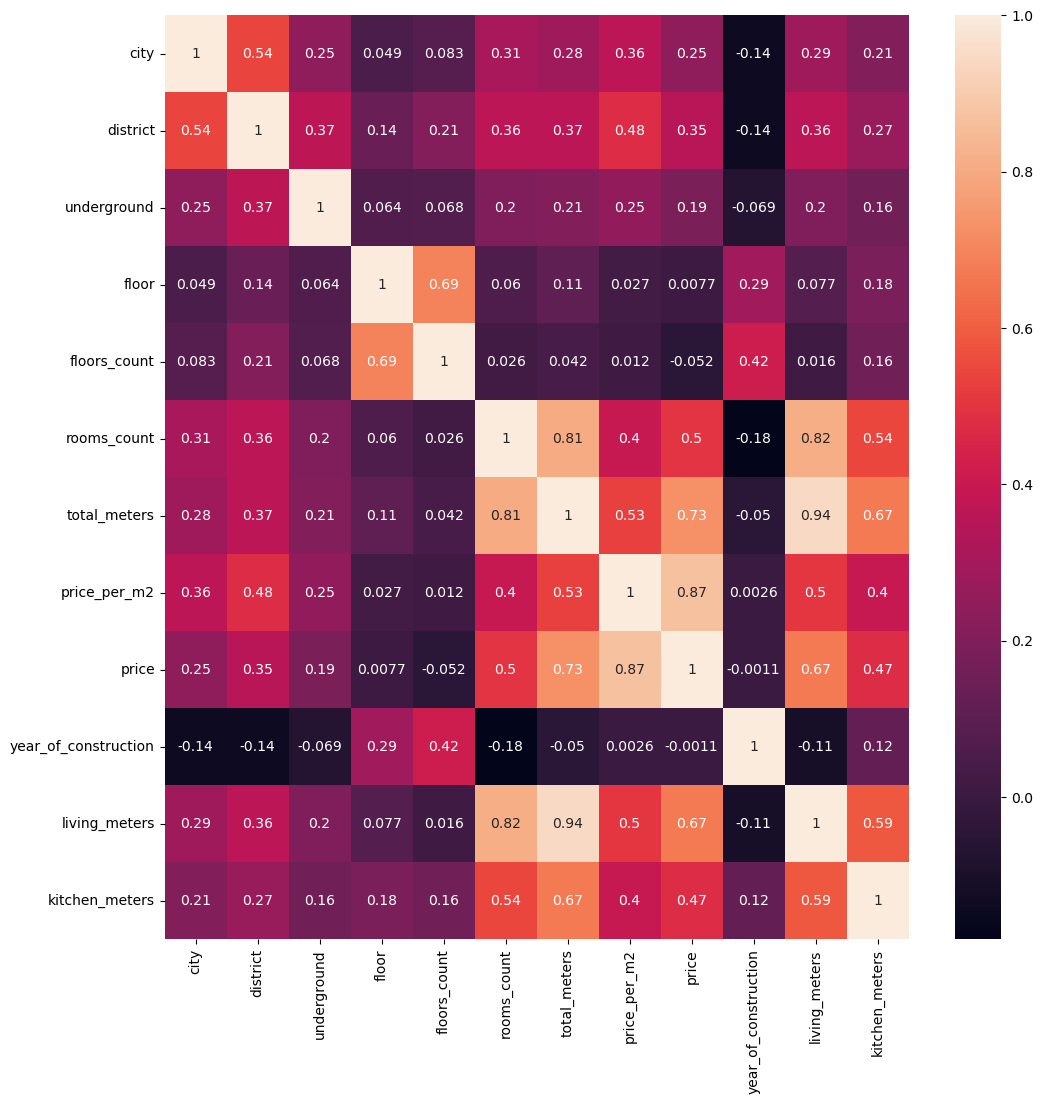

In [639]:
plt.figure(figsize = (12,12))
sns.heatmap(df_cop.corr(),annot = True)

In [640]:
df_cop.columns

Index(['city', 'district', 'underground', 'floor', 'floors_count',
       'rooms_count', 'total_meters', 'price_per_m2', 'price',
       'year_of_construction', 'living_meters', 'kitchen_meters'],
      dtype='object')

In [643]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','year_of_construction','living_meters','kitchen_meters'])
y = df_cop['year_of_construction']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [642]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
param_grid = {'learning_rate': [i/10.0 for i in range(1, 10,2)],
              'depth': [i for i in range(1, 10,2)],
              }

gs = GridSearchCV(CatBoostRegressor(loss_function='MAE'), param_grid, cv=2, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train,cat_features = [3])
gs.best_params_, gs.best_score_

Fitting 2 folds for each of 25 candidates, totalling 50 fits


KeyboardInterrupt: 

In [644]:
import numpy 
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train,cat_features = [3])

0:	learn: 16.9789669	total: 29.6ms	remaining: 29.6s
1:	learn: 16.4352375	total: 56.4ms	remaining: 28.1s
2:	learn: 16.0150437	total: 89.9ms	remaining: 29.9s
3:	learn: 15.7277548	total: 102ms	remaining: 25.4s
4:	learn: 15.3296496	total: 126ms	remaining: 25s
5:	learn: 15.0009873	total: 154ms	remaining: 25.4s
6:	learn: 14.7248982	total: 184ms	remaining: 26.1s
7:	learn: 14.4777167	total: 213ms	remaining: 26.4s
8:	learn: 14.2812911	total: 244ms	remaining: 26.8s
9:	learn: 14.1228055	total: 279ms	remaining: 27.6s
10:	learn: 13.9188315	total: 310ms	remaining: 27.9s
11:	learn: 13.7456366	total: 342ms	remaining: 28.2s
12:	learn: 13.6380859	total: 377ms	remaining: 28.6s
13:	learn: 13.5024201	total: 410ms	remaining: 28.8s
14:	learn: 13.3867735	total: 438ms	remaining: 28.8s
15:	learn: 13.1940915	total: 462ms	remaining: 28.4s
16:	learn: 13.0384182	total: 489ms	remaining: 28.3s
17:	learn: 12.9638712	total: 516ms	remaining: 28.1s
18:	learn: 12.9080610	total: 539ms	remaining: 27.8s
19:	learn: 12.7721872

165:	learn: 9.8134430	total: 4.43s	remaining: 22.3s
166:	learn: 9.7716231	total: 4.46s	remaining: 22.3s
167:	learn: 9.7677070	total: 4.5s	remaining: 22.3s
168:	learn: 9.7530388	total: 4.53s	remaining: 22.3s
169:	learn: 9.7473482	total: 4.57s	remaining: 22.3s
170:	learn: 9.7279037	total: 4.61s	remaining: 22.3s
171:	learn: 9.7261770	total: 4.63s	remaining: 22.3s
172:	learn: 9.7146647	total: 4.66s	remaining: 22.3s
173:	learn: 9.7126164	total: 4.69s	remaining: 22.2s
174:	learn: 9.7032867	total: 4.71s	remaining: 22.2s
175:	learn: 9.6894374	total: 4.74s	remaining: 22.2s
176:	learn: 9.6882431	total: 4.78s	remaining: 22.2s
177:	learn: 9.6541619	total: 4.8s	remaining: 22.2s
178:	learn: 9.6513575	total: 4.83s	remaining: 22.2s
179:	learn: 9.6421943	total: 4.86s	remaining: 22.1s
180:	learn: 9.6258020	total: 4.88s	remaining: 22.1s
181:	learn: 9.6230324	total: 4.9s	remaining: 22s
182:	learn: 9.6187214	total: 4.93s	remaining: 22s
183:	learn: 9.6137279	total: 4.95s	remaining: 21.9s
184:	learn: 9.59980

326:	learn: 8.5827400	total: 8.72s	remaining: 17.9s
327:	learn: 8.5635192	total: 8.74s	remaining: 17.9s
328:	learn: 8.5500011	total: 8.77s	remaining: 17.9s
329:	learn: 8.5458444	total: 8.79s	remaining: 17.9s
330:	learn: 8.5440460	total: 8.82s	remaining: 17.8s
331:	learn: 8.5418050	total: 8.85s	remaining: 17.8s
332:	learn: 8.5407857	total: 8.87s	remaining: 17.8s
333:	learn: 8.5320514	total: 8.89s	remaining: 17.7s
334:	learn: 8.5288347	total: 8.92s	remaining: 17.7s
335:	learn: 8.5188521	total: 8.95s	remaining: 17.7s
336:	learn: 8.5146227	total: 8.97s	remaining: 17.7s
337:	learn: 8.5144715	total: 9s	remaining: 17.6s
338:	learn: 8.5063861	total: 9.02s	remaining: 17.6s
339:	learn: 8.5058224	total: 9.04s	remaining: 17.6s
340:	learn: 8.5029120	total: 9.07s	remaining: 17.5s
341:	learn: 8.4977597	total: 9.11s	remaining: 17.5s
342:	learn: 8.4963043	total: 9.14s	remaining: 17.5s
343:	learn: 8.4907862	total: 9.17s	remaining: 17.5s
344:	learn: 8.4899116	total: 9.2s	remaining: 17.5s
345:	learn: 8.48

491:	learn: 8.0195118	total: 13s	remaining: 13.4s
492:	learn: 8.0178150	total: 13s	remaining: 13.4s
493:	learn: 8.0176990	total: 13s	remaining: 13.3s
494:	learn: 8.0081089	total: 13s	remaining: 13.3s
495:	learn: 8.0070593	total: 13.1s	remaining: 13.3s
496:	learn: 8.0052356	total: 13.1s	remaining: 13.2s
497:	learn: 8.0035487	total: 13.1s	remaining: 13.2s
498:	learn: 8.0015291	total: 13.1s	remaining: 13.2s
499:	learn: 7.9996783	total: 13.2s	remaining: 13.2s
500:	learn: 7.9984094	total: 13.2s	remaining: 13.1s
501:	learn: 7.9913103	total: 13.2s	remaining: 13.1s
502:	learn: 7.9899242	total: 13.2s	remaining: 13.1s
503:	learn: 7.9840363	total: 13.3s	remaining: 13s
504:	learn: 7.9826664	total: 13.3s	remaining: 13s
505:	learn: 7.9776382	total: 13.3s	remaining: 13s
506:	learn: 7.9691039	total: 13.3s	remaining: 13s
507:	learn: 7.9685153	total: 13.4s	remaining: 12.9s
508:	learn: 7.9673458	total: 13.4s	remaining: 12.9s
509:	learn: 7.9670818	total: 13.4s	remaining: 12.9s
510:	learn: 7.9596381	total:

652:	learn: 7.5446746	total: 18.1s	remaining: 9.62s
653:	learn: 7.5440366	total: 18.1s	remaining: 9.59s
654:	learn: 7.5406995	total: 18.1s	remaining: 9.56s
655:	learn: 7.5366998	total: 18.2s	remaining: 9.53s
656:	learn: 7.5282822	total: 18.2s	remaining: 9.5s
657:	learn: 7.5278963	total: 18.2s	remaining: 9.47s
658:	learn: 7.5267409	total: 18.2s	remaining: 9.44s
659:	learn: 7.5249314	total: 18.3s	remaining: 9.41s
660:	learn: 7.5232498	total: 18.3s	remaining: 9.38s
661:	learn: 7.5204656	total: 18.3s	remaining: 9.35s
662:	learn: 7.5127936	total: 18.3s	remaining: 9.32s
663:	learn: 7.5116614	total: 18.4s	remaining: 9.29s
664:	learn: 7.5084585	total: 18.4s	remaining: 9.27s
665:	learn: 7.5074332	total: 18.4s	remaining: 9.23s
666:	learn: 7.5070147	total: 18.4s	remaining: 9.21s
667:	learn: 7.5005121	total: 18.5s	remaining: 9.18s
668:	learn: 7.5000018	total: 18.5s	remaining: 9.15s
669:	learn: 7.4953824	total: 18.5s	remaining: 9.12s
670:	learn: 7.4951965	total: 18.5s	remaining: 9.09s
671:	learn: 7

811:	learn: 7.2004178	total: 21.8s	remaining: 5.06s
812:	learn: 7.1996385	total: 21.9s	remaining: 5.03s
813:	learn: 7.1992845	total: 21.9s	remaining: 5s
814:	learn: 7.1985709	total: 21.9s	remaining: 4.97s
815:	learn: 7.1957142	total: 21.9s	remaining: 4.95s
816:	learn: 7.1910436	total: 22s	remaining: 4.92s
817:	learn: 7.1900455	total: 22s	remaining: 4.89s
818:	learn: 7.1852772	total: 22s	remaining: 4.86s
819:	learn: 7.1850415	total: 22s	remaining: 4.83s
820:	learn: 7.1844324	total: 22.1s	remaining: 4.81s
821:	learn: 7.1837483	total: 22.1s	remaining: 4.78s
822:	learn: 7.1832564	total: 22.1s	remaining: 4.75s
823:	learn: 7.1829228	total: 22.1s	remaining: 4.72s
824:	learn: 7.1798295	total: 22.1s	remaining: 4.7s
825:	learn: 7.1787181	total: 22.2s	remaining: 4.67s
826:	learn: 7.1781186	total: 22.2s	remaining: 4.64s
827:	learn: 7.1779360	total: 22.2s	remaining: 4.62s
828:	learn: 7.1775586	total: 22.2s	remaining: 4.59s
829:	learn: 7.1744233	total: 22.3s	remaining: 4.56s
830:	learn: 7.1741624	to

974:	learn: 6.9255509	total: 26.1s	remaining: 669ms
975:	learn: 6.9240747	total: 26.1s	remaining: 642ms
976:	learn: 6.9230553	total: 26.1s	remaining: 615ms
977:	learn: 6.9128944	total: 26.2s	remaining: 588ms
978:	learn: 6.9122224	total: 26.2s	remaining: 562ms
979:	learn: 6.9111443	total: 26.2s	remaining: 535ms
980:	learn: 6.9072259	total: 26.2s	remaining: 508ms
981:	learn: 6.9063173	total: 26.3s	remaining: 481ms
982:	learn: 6.9047325	total: 26.3s	remaining: 454ms
983:	learn: 6.9046709	total: 26.3s	remaining: 428ms
984:	learn: 6.9040019	total: 26.3s	remaining: 401ms



KeyboardInterrupt



In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price_m2.predict(X_test))

In [130]:
from sklearn.metrics import r2_score
r2_score(y_test, fit_model_price_m2.predict(X_test))

0.5414643080730395

import joblib 
joblib.dump(fit_model_price_m2, "years(str3).joblib")

In [147]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','living_meters','kitchen_meters'])
y = df_cop['living_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
param_grid = {'learning_rate': [i/10.0 for i in range(1, 10,2)],
              'depth': [i for i in range(1, 10,2)],
              }

gs = GridSearchCV(CatBoostRegressor(loss_function='MAE'), param_grid, cv=2, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train,cat_features = [4])
gs.best_params_, gs.best_score_

In [645]:
import numpy 
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.1, depth=5,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train,cat_features = [4])

0:	learn: 17.0147005	total: 17.5ms	remaining: 17.5s
1:	learn: 16.5177938	total: 37.1ms	remaining: 18.5s
2:	learn: 16.0024751	total: 65.5ms	remaining: 21.8s
3:	learn: 15.5742147	total: 85.2ms	remaining: 21.2s
4:	learn: 15.2654969	total: 102ms	remaining: 20.3s
5:	learn: 14.9916587	total: 121ms	remaining: 20s
6:	learn: 14.7374368	total: 137ms	remaining: 19.5s
7:	learn: 14.4853855	total: 153ms	remaining: 19s
8:	learn: 14.3409143	total: 170ms	remaining: 18.7s
9:	learn: 14.2136129	total: 189ms	remaining: 18.7s
10:	learn: 14.1038011	total: 208ms	remaining: 18.7s
11:	learn: 13.9300796	total: 226ms	remaining: 18.6s
12:	learn: 13.7800828	total: 246ms	remaining: 18.7s
13:	learn: 13.6018382	total: 267ms	remaining: 18.8s
14:	learn: 13.4687973	total: 284ms	remaining: 18.7s
15:	learn: 13.3354948	total: 301ms	remaining: 18.5s
16:	learn: 13.2228633	total: 318ms	remaining: 18.4s
17:	learn: 13.1105447	total: 335ms	remaining: 18.3s
18:	learn: 12.9999867	total: 351ms	remaining: 18.1s
19:	learn: 12.9058937	

159:	learn: 10.9675139	total: 3.31s	remaining: 17.4s
160:	learn: 10.9638707	total: 3.33s	remaining: 17.4s
161:	learn: 10.9630666	total: 3.35s	remaining: 17.3s
162:	learn: 10.9530941	total: 3.36s	remaining: 17.3s
163:	learn: 10.9514668	total: 3.38s	remaining: 17.2s
164:	learn: 10.9488032	total: 3.4s	remaining: 17.2s
165:	learn: 10.9377790	total: 3.41s	remaining: 17.1s
166:	learn: 10.9319655	total: 3.43s	remaining: 17.1s
167:	learn: 10.9255053	total: 3.44s	remaining: 17.1s
168:	learn: 10.9196490	total: 3.46s	remaining: 17s
169:	learn: 10.9165797	total: 3.48s	remaining: 17s
170:	learn: 10.9152966	total: 3.49s	remaining: 16.9s
171:	learn: 10.9094999	total: 3.51s	remaining: 16.9s
172:	learn: 10.9074916	total: 3.53s	remaining: 16.9s
173:	learn: 10.9026673	total: 3.54s	remaining: 16.8s
174:	learn: 10.9003584	total: 3.56s	remaining: 16.8s
175:	learn: 10.8955682	total: 3.58s	remaining: 16.7s
176:	learn: 10.8884615	total: 3.59s	remaining: 16.7s
177:	learn: 10.8635733	total: 3.61s	remaining: 16.7

316:	learn: 10.1950321	total: 5.92s	remaining: 12.7s
317:	learn: 10.1932056	total: 5.93s	remaining: 12.7s
318:	learn: 10.1881577	total: 5.95s	remaining: 12.7s
319:	learn: 10.1830431	total: 5.97s	remaining: 12.7s
320:	learn: 10.1779905	total: 5.98s	remaining: 12.7s
321:	learn: 10.1756435	total: 6s	remaining: 12.6s
322:	learn: 10.1738745	total: 6.01s	remaining: 12.6s
323:	learn: 10.1735787	total: 6.03s	remaining: 12.6s
324:	learn: 10.1701382	total: 6.04s	remaining: 12.6s
325:	learn: 10.1628739	total: 6.06s	remaining: 12.5s
326:	learn: 10.1495873	total: 6.08s	remaining: 12.5s
327:	learn: 10.1480374	total: 6.09s	remaining: 12.5s
328:	learn: 10.1428951	total: 6.11s	remaining: 12.5s
329:	learn: 10.1413233	total: 6.13s	remaining: 12.4s
330:	learn: 10.1386593	total: 6.14s	remaining: 12.4s
331:	learn: 10.1331782	total: 6.16s	remaining: 12.4s
332:	learn: 10.1290592	total: 6.18s	remaining: 12.4s
333:	learn: 10.1283408	total: 6.2s	remaining: 12.4s
334:	learn: 10.1274654	total: 6.21s	remaining: 12.

482:	learn: 9.7168900	total: 8.73s	remaining: 9.34s
483:	learn: 9.7155010	total: 8.75s	remaining: 9.33s
484:	learn: 9.7137304	total: 8.76s	remaining: 9.3s
485:	learn: 9.7090771	total: 8.78s	remaining: 9.28s
486:	learn: 9.7089461	total: 8.79s	remaining: 9.26s
487:	learn: 9.7085442	total: 8.81s	remaining: 9.24s
488:	learn: 9.7070241	total: 8.83s	remaining: 9.22s
489:	learn: 9.7029447	total: 8.84s	remaining: 9.2s
490:	learn: 9.7017957	total: 8.86s	remaining: 9.19s
491:	learn: 9.6995130	total: 8.88s	remaining: 9.16s
492:	learn: 9.6975844	total: 8.89s	remaining: 9.14s
493:	learn: 9.6969807	total: 8.91s	remaining: 9.13s
494:	learn: 9.6966212	total: 8.92s	remaining: 9.1s
495:	learn: 9.6945147	total: 8.94s	remaining: 9.09s
496:	learn: 9.6918306	total: 8.96s	remaining: 9.07s
497:	learn: 9.6906785	total: 8.98s	remaining: 9.05s
498:	learn: 9.6885111	total: 9s	remaining: 9.03s
499:	learn: 9.6840226	total: 9.02s	remaining: 9.02s
500:	learn: 9.6837658	total: 9.03s	remaining: 9s
501:	learn: 9.6831109

650:	learn: 9.3998868	total: 11.8s	remaining: 6.31s
651:	learn: 9.3988988	total: 11.8s	remaining: 6.29s
652:	learn: 9.3983647	total: 11.8s	remaining: 6.28s
653:	learn: 9.3961034	total: 11.8s	remaining: 6.26s
654:	learn: 9.3957213	total: 11.9s	remaining: 6.24s
655:	learn: 9.3940390	total: 11.9s	remaining: 6.23s
656:	learn: 9.3926294	total: 11.9s	remaining: 6.21s
657:	learn: 9.3921883	total: 11.9s	remaining: 6.2s
658:	learn: 9.3920162	total: 11.9s	remaining: 6.18s
659:	learn: 9.3907701	total: 12s	remaining: 6.16s
660:	learn: 9.3900526	total: 12s	remaining: 6.14s
661:	learn: 9.3883403	total: 12s	remaining: 6.13s
662:	learn: 9.3879929	total: 12s	remaining: 6.11s
663:	learn: 9.3864406	total: 12s	remaining: 6.09s
664:	learn: 9.3859188	total: 12.1s	remaining: 6.08s
665:	learn: 9.3849824	total: 12.1s	remaining: 6.06s
666:	learn: 9.3848464	total: 12.1s	remaining: 6.04s
667:	learn: 9.3836922	total: 12.1s	remaining: 6.03s
668:	learn: 9.3787877	total: 12.2s	remaining: 6.01s
669:	learn: 9.3762063	t

821:	learn: 9.1786552	total: 14.8s	remaining: 3.2s
822:	learn: 9.1746808	total: 14.8s	remaining: 3.18s
823:	learn: 9.1745788	total: 14.8s	remaining: 3.17s
824:	learn: 9.1741546	total: 14.8s	remaining: 3.15s
825:	learn: 9.1720938	total: 14.8s	remaining: 3.13s
826:	learn: 9.1713196	total: 14.9s	remaining: 3.11s
827:	learn: 9.1697237	total: 14.9s	remaining: 3.09s
828:	learn: 9.1668691	total: 14.9s	remaining: 3.07s
829:	learn: 9.1651293	total: 14.9s	remaining: 3.06s
830:	learn: 9.1641046	total: 14.9s	remaining: 3.04s
831:	learn: 9.1612341	total: 14.9s	remaining: 3.02s
832:	learn: 9.1602296	total: 15s	remaining: 3s
833:	learn: 9.1595303	total: 15s	remaining: 2.98s
834:	learn: 9.1592663	total: 15s	remaining: 2.96s
835:	learn: 9.1587907	total: 15s	remaining: 2.94s
836:	learn: 9.1585357	total: 15s	remaining: 2.93s
837:	learn: 9.1572454	total: 15s	remaining: 2.91s
838:	learn: 9.1563908	total: 15.1s	remaining: 2.89s
839:	learn: 9.1558522	total: 15.1s	remaining: 2.87s
840:	learn: 9.1550679	total:

989:	learn: 8.9817077	total: 18.1s	remaining: 183ms
990:	learn: 8.9791652	total: 18.1s	remaining: 164ms
991:	learn: 8.9783049	total: 18.1s	remaining: 146ms
992:	learn: 8.9779219	total: 18.1s	remaining: 128ms
993:	learn: 8.9772975	total: 18.2s	remaining: 110ms
994:	learn: 8.9770612	total: 18.2s	remaining: 91.3ms
995:	learn: 8.9755605	total: 18.2s	remaining: 73ms
996:	learn: 8.9752362	total: 18.2s	remaining: 54.8ms
997:	learn: 8.9737677	total: 18.2s	remaining: 36.5ms
998:	learn: 8.9718182	total: 18.2s	remaining: 18.3ms
999:	learn: 8.9679655	total: 18.3s	remaining: 0us


In [646]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price_m2.predict(X_test))


11.646114247170894

In [647]:
from sklearn.metrics import r2_score
r2_score(y_test, fit_model_price_m2.predict(X_test))

0.3965296909198833

In [152]:
import joblib 
joblib.dump(fit_model_price_m2, "liv_metr(str4).joblib")

['liv_metr(str4).joblib']

In [153]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','kitchen_meters'])
y = df_cop['kitchen_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [154]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
param_grid = {'learning_rate': [i/10.0 for i in range(1, 10,2)],
              'depth': [i for i in range(1, 10,2)],
              }

gs = GridSearchCV(CatBoostRegressor(loss_function='MAE'), param_grid, cv=2, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train,cat_features = [5])
gs.best_params_, gs.best_score_

Fitting 2 folds for each of 25 candidates, totalling 50 fits
0:	learn: 5.4605090	total: 7.28ms	remaining: 7.27s
1:	learn: 5.2352612	total: 16.8ms	remaining: 8.38s
2:	learn: 5.0414441	total: 23.7ms	remaining: 7.89s
3:	learn: 4.9096732	total: 32.7ms	remaining: 8.15s
4:	learn: 4.7606268	total: 41.7ms	remaining: 8.3s
5:	learn: 4.6575756	total: 50.9ms	remaining: 8.43s
6:	learn: 4.5506463	total: 59.7ms	remaining: 8.47s
7:	learn: 4.4798543	total: 68.2ms	remaining: 8.45s
8:	learn: 4.3936216	total: 76.7ms	remaining: 8.44s
9:	learn: 4.3403029	total: 85.3ms	remaining: 8.45s
10:	learn: 4.2887567	total: 94ms	remaining: 8.45s
11:	learn: 4.2412157	total: 104ms	remaining: 8.6s
12:	learn: 4.2002583	total: 113ms	remaining: 8.59s
13:	learn: 4.1647813	total: 122ms	remaining: 8.56s
14:	learn: 4.1268933	total: 130ms	remaining: 8.57s
15:	learn: 4.0930295	total: 139ms	remaining: 8.57s
16:	learn: 4.0561264	total: 148ms	remaining: 8.58s
17:	learn: 4.0293234	total: 157ms	remaining: 8.58s
18:	learn: 3.9988905	tot

171:	learn: 3.6061425	total: 1.67s	remaining: 8.06s
172:	learn: 3.6041053	total: 1.69s	remaining: 8.1s
173:	learn: 3.6036186	total: 1.72s	remaining: 8.14s
174:	learn: 3.6028628	total: 1.73s	remaining: 8.13s
175:	learn: 3.6016946	total: 1.74s	remaining: 8.12s
176:	learn: 3.6007529	total: 1.75s	remaining: 8.14s
177:	learn: 3.6006694	total: 1.76s	remaining: 8.13s
178:	learn: 3.5991785	total: 1.77s	remaining: 8.12s
179:	learn: 3.5981035	total: 1.78s	remaining: 8.11s
180:	learn: 3.5977148	total: 1.79s	remaining: 8.09s
181:	learn: 3.5970393	total: 1.8s	remaining: 8.07s
182:	learn: 3.5968558	total: 1.8s	remaining: 8.06s
183:	learn: 3.5957219	total: 1.81s	remaining: 8.04s
184:	learn: 3.5950253	total: 1.82s	remaining: 8.03s
185:	learn: 3.5942880	total: 1.83s	remaining: 8.01s
186:	learn: 3.5938297	total: 1.84s	remaining: 8s
187:	learn: 3.5929379	total: 1.85s	remaining: 7.99s
188:	learn: 3.5920879	total: 1.86s	remaining: 7.98s
189:	learn: 3.5905442	total: 1.87s	remaining: 7.97s
190:	learn: 3.5898

334:	learn: 3.5142536	total: 3.15s	remaining: 6.25s
335:	learn: 3.5141657	total: 3.16s	remaining: 6.25s
336:	learn: 3.5136281	total: 3.17s	remaining: 6.24s
337:	learn: 3.5135826	total: 3.18s	remaining: 6.22s
338:	learn: 3.5130577	total: 3.19s	remaining: 6.21s
339:	learn: 3.5129203	total: 3.2s	remaining: 6.2s
340:	learn: 3.5128379	total: 3.2s	remaining: 6.19s
341:	learn: 3.5123885	total: 3.21s	remaining: 6.18s
342:	learn: 3.5114520	total: 3.22s	remaining: 6.17s
343:	learn: 3.5101900	total: 3.23s	remaining: 6.16s
344:	learn: 3.5095743	total: 3.24s	remaining: 6.15s
345:	learn: 3.5082906	total: 3.25s	remaining: 6.14s
346:	learn: 3.5078311	total: 3.26s	remaining: 6.13s
347:	learn: 3.5076912	total: 3.27s	remaining: 6.12s
348:	learn: 3.5067024	total: 3.28s	remaining: 6.11s
349:	learn: 3.5065748	total: 3.28s	remaining: 6.1s
350:	learn: 3.5064822	total: 3.29s	remaining: 6.09s
351:	learn: 3.5053907	total: 3.3s	remaining: 6.08s
352:	learn: 3.5047616	total: 3.31s	remaining: 6.07s
353:	learn: 3.504

501:	learn: 3.4558238	total: 4.61s	remaining: 4.58s
502:	learn: 3.4557383	total: 4.62s	remaining: 4.57s
503:	learn: 3.4555569	total: 4.63s	remaining: 4.56s
504:	learn: 3.4548270	total: 4.64s	remaining: 4.55s
505:	learn: 3.4544469	total: 4.65s	remaining: 4.54s
506:	learn: 3.4540552	total: 4.66s	remaining: 4.53s
507:	learn: 3.4533435	total: 4.67s	remaining: 4.52s
508:	learn: 3.4530980	total: 4.68s	remaining: 4.51s
509:	learn: 3.4529529	total: 4.69s	remaining: 4.5s
510:	learn: 3.4525776	total: 4.69s	remaining: 4.49s
511:	learn: 3.4522777	total: 4.7s	remaining: 4.48s
512:	learn: 3.4519823	total: 4.71s	remaining: 4.47s
513:	learn: 3.4519270	total: 4.72s	remaining: 4.46s
514:	learn: 3.4518692	total: 4.73s	remaining: 4.45s
515:	learn: 3.4513311	total: 4.74s	remaining: 4.44s
516:	learn: 3.4511922	total: 4.74s	remaining: 4.43s
517:	learn: 3.4510471	total: 4.75s	remaining: 4.42s
518:	learn: 3.4509681	total: 4.76s	remaining: 4.41s
519:	learn: 3.4502649	total: 4.77s	remaining: 4.4s
520:	learn: 3.4

666:	learn: 3.4089952	total: 6.07s	remaining: 3.03s
667:	learn: 3.4087513	total: 6.08s	remaining: 3.02s
668:	learn: 3.4085013	total: 6.09s	remaining: 3.01s
669:	learn: 3.4078655	total: 6.1s	remaining: 3s
670:	learn: 3.4077922	total: 6.11s	remaining: 2.99s
671:	learn: 3.4070198	total: 6.11s	remaining: 2.98s
672:	learn: 3.4070142	total: 6.12s	remaining: 2.97s
673:	learn: 3.4063881	total: 6.13s	remaining: 2.96s
674:	learn: 3.4057621	total: 6.14s	remaining: 2.96s
675:	learn: 3.4051821	total: 6.15s	remaining: 2.95s
676:	learn: 3.4050624	total: 6.16s	remaining: 2.94s
677:	learn: 3.4050218	total: 6.17s	remaining: 2.93s
678:	learn: 3.4043659	total: 6.17s	remaining: 2.92s
679:	learn: 3.4039587	total: 6.18s	remaining: 2.91s
680:	learn: 3.4035894	total: 6.19s	remaining: 2.9s
681:	learn: 3.4034494	total: 6.2s	remaining: 2.89s
682:	learn: 3.4031107	total: 6.21s	remaining: 2.88s
683:	learn: 3.4029582	total: 6.22s	remaining: 2.87s
684:	learn: 3.4029090	total: 6.23s	remaining: 2.86s
685:	learn: 3.4028

845:	learn: 3.3680448	total: 7.78s	remaining: 1.42s
846:	learn: 3.3678355	total: 7.79s	remaining: 1.41s
847:	learn: 3.3678236	total: 7.8s	remaining: 1.4s
848:	learn: 3.3677937	total: 7.81s	remaining: 1.39s
849:	learn: 3.3675390	total: 7.82s	remaining: 1.38s
850:	learn: 3.3672955	total: 7.83s	remaining: 1.37s
851:	learn: 3.3672852	total: 7.84s	remaining: 1.36s
852:	learn: 3.3672609	total: 7.85s	remaining: 1.35s
853:	learn: 3.3671683	total: 7.86s	remaining: 1.34s
854:	learn: 3.3670227	total: 7.87s	remaining: 1.33s
855:	learn: 3.3669392	total: 7.88s	remaining: 1.32s
856:	learn: 3.3667234	total: 7.89s	remaining: 1.31s
857:	learn: 3.3664458	total: 7.89s	remaining: 1.31s
858:	learn: 3.3661979	total: 7.9s	remaining: 1.3s
859:	learn: 3.3659078	total: 7.91s	remaining: 1.29s
860:	learn: 3.3658514	total: 7.92s	remaining: 1.28s
861:	learn: 3.3656566	total: 7.93s	remaining: 1.27s
862:	learn: 3.3653873	total: 7.94s	remaining: 1.26s
863:	learn: 3.3652686	total: 7.95s	remaining: 1.25s
864:	learn: 3.36

({'depth': 3, 'learning_rate': 0.1}, 0.354176167119457)

In [155]:
import numpy 
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.1, depth=3,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train,cat_features = [5])

0:	learn: 5.4605090	total: 14.3ms	remaining: 14.3s
1:	learn: 5.2352612	total: 29.9ms	remaining: 14.9s
2:	learn: 5.0414441	total: 39.7ms	remaining: 13.2s
3:	learn: 4.9096732	total: 49.3ms	remaining: 12.3s
4:	learn: 4.7606268	total: 61.1ms	remaining: 12.2s
5:	learn: 4.6575756	total: 71.3ms	remaining: 11.8s
6:	learn: 4.5506463	total: 82.4ms	remaining: 11.7s
7:	learn: 4.4798543	total: 89.9ms	remaining: 11.2s
8:	learn: 4.3936216	total: 99.8ms	remaining: 11s
9:	learn: 4.3403029	total: 110ms	remaining: 10.8s
10:	learn: 4.2887567	total: 119ms	remaining: 10.7s
11:	learn: 4.2412157	total: 129ms	remaining: 10.6s
12:	learn: 4.2002583	total: 139ms	remaining: 10.6s
13:	learn: 4.1647813	total: 152ms	remaining: 10.7s
14:	learn: 4.1268933	total: 162ms	remaining: 10.6s
15:	learn: 4.0930295	total: 172ms	remaining: 10.6s
16:	learn: 4.0561264	total: 181ms	remaining: 10.5s
17:	learn: 4.0293234	total: 193ms	remaining: 10.5s
18:	learn: 3.9988905	total: 203ms	remaining: 10.5s
19:	learn: 3.9814106	total: 213ms	

162:	learn: 3.6127908	total: 1.69s	remaining: 8.7s
163:	learn: 3.6119679	total: 1.7s	remaining: 8.69s
164:	learn: 3.6115570	total: 1.72s	remaining: 8.68s
165:	learn: 3.6105954	total: 1.73s	remaining: 8.68s
166:	learn: 3.6103569	total: 1.74s	remaining: 8.67s
167:	learn: 3.6099877	total: 1.75s	remaining: 8.66s
168:	learn: 3.6095324	total: 1.76s	remaining: 8.66s
169:	learn: 3.6082088	total: 1.77s	remaining: 8.66s
170:	learn: 3.6077463	total: 1.78s	remaining: 8.65s
171:	learn: 3.6061425	total: 1.79s	remaining: 8.64s
172:	learn: 3.6041053	total: 1.81s	remaining: 8.64s
173:	learn: 3.6036186	total: 1.82s	remaining: 8.65s
174:	learn: 3.6028628	total: 1.83s	remaining: 8.65s
175:	learn: 3.6016946	total: 1.85s	remaining: 8.64s
176:	learn: 3.6007529	total: 1.86s	remaining: 8.64s
177:	learn: 3.6006694	total: 1.87s	remaining: 8.63s
178:	learn: 3.5991785	total: 1.88s	remaining: 8.62s
179:	learn: 3.5981035	total: 1.89s	remaining: 8.62s
180:	learn: 3.5977148	total: 1.9s	remaining: 8.61s
181:	learn: 3.5

324:	learn: 3.5184199	total: 3.38s	remaining: 7.02s
325:	learn: 3.5179395	total: 3.39s	remaining: 7.01s
326:	learn: 3.5177535	total: 3.4s	remaining: 7s
327:	learn: 3.5173700	total: 3.41s	remaining: 6.99s
328:	learn: 3.5169546	total: 3.42s	remaining: 6.97s
329:	learn: 3.5165830	total: 3.43s	remaining: 6.96s
330:	learn: 3.5160345	total: 3.44s	remaining: 6.94s
331:	learn: 3.5155477	total: 3.44s	remaining: 6.93s
332:	learn: 3.5151927	total: 3.45s	remaining: 6.92s
333:	learn: 3.5146805	total: 3.46s	remaining: 6.9s
334:	learn: 3.5142536	total: 3.47s	remaining: 6.89s
335:	learn: 3.5141657	total: 3.48s	remaining: 6.87s
336:	learn: 3.5136281	total: 3.48s	remaining: 6.86s
337:	learn: 3.5135826	total: 3.49s	remaining: 6.84s
338:	learn: 3.5130577	total: 3.5s	remaining: 6.83s
339:	learn: 3.5129203	total: 3.51s	remaining: 6.82s
340:	learn: 3.5128379	total: 3.52s	remaining: 6.8s
341:	learn: 3.5123885	total: 3.53s	remaining: 6.79s
342:	learn: 3.5114520	total: 3.54s	remaining: 6.78s
343:	learn: 3.51019

496:	learn: 3.4573215	total: 4.86s	remaining: 4.91s
497:	learn: 3.4566472	total: 4.87s	remaining: 4.91s
498:	learn: 3.4565845	total: 4.87s	remaining: 4.89s
499:	learn: 3.4560808	total: 4.88s	remaining: 4.88s
500:	learn: 3.4559167	total: 4.89s	remaining: 4.87s
501:	learn: 3.4558238	total: 4.9s	remaining: 4.86s
502:	learn: 3.4557383	total: 4.91s	remaining: 4.85s
503:	learn: 3.4555569	total: 4.92s	remaining: 4.84s
504:	learn: 3.4548270	total: 4.92s	remaining: 4.83s
505:	learn: 3.4544469	total: 4.93s	remaining: 4.82s
506:	learn: 3.4540552	total: 4.94s	remaining: 4.81s
507:	learn: 3.4533435	total: 4.95s	remaining: 4.79s
508:	learn: 3.4530980	total: 4.96s	remaining: 4.78s
509:	learn: 3.4529529	total: 4.97s	remaining: 4.77s
510:	learn: 3.4525776	total: 4.98s	remaining: 4.76s
511:	learn: 3.4522777	total: 4.99s	remaining: 4.75s
512:	learn: 3.4519823	total: 4.99s	remaining: 4.74s
513:	learn: 3.4519270	total: 5s	remaining: 4.73s
514:	learn: 3.4518692	total: 5.01s	remaining: 4.72s
515:	learn: 3.45

666:	learn: 3.4089952	total: 6.33s	remaining: 3.16s
667:	learn: 3.4087513	total: 6.35s	remaining: 3.15s
668:	learn: 3.4085013	total: 6.36s	remaining: 3.14s
669:	learn: 3.4078655	total: 6.36s	remaining: 3.13s
670:	learn: 3.4077922	total: 6.37s	remaining: 3.12s
671:	learn: 3.4070198	total: 6.38s	remaining: 3.11s
672:	learn: 3.4070142	total: 6.39s	remaining: 3.1s
673:	learn: 3.4063881	total: 6.4s	remaining: 3.09s
674:	learn: 3.4057621	total: 6.41s	remaining: 3.08s
675:	learn: 3.4051821	total: 6.42s	remaining: 3.08s
676:	learn: 3.4050624	total: 6.42s	remaining: 3.06s
677:	learn: 3.4050218	total: 6.43s	remaining: 3.06s
678:	learn: 3.4043659	total: 6.44s	remaining: 3.04s
679:	learn: 3.4039587	total: 6.45s	remaining: 3.04s
680:	learn: 3.4035894	total: 6.46s	remaining: 3.02s
681:	learn: 3.4034494	total: 6.47s	remaining: 3.02s
682:	learn: 3.4031107	total: 6.47s	remaining: 3s
683:	learn: 3.4029582	total: 6.48s	remaining: 3s
684:	learn: 3.4029090	total: 6.49s	remaining: 2.98s
685:	learn: 3.402802

836:	learn: 3.3698282	total: 7.79s	remaining: 1.52s
837:	learn: 3.3695518	total: 7.8s	remaining: 1.51s
838:	learn: 3.3694966	total: 7.81s	remaining: 1.5s
839:	learn: 3.3693934	total: 7.82s	remaining: 1.49s
840:	learn: 3.3690721	total: 7.83s	remaining: 1.48s
841:	learn: 3.3688139	total: 7.83s	remaining: 1.47s
842:	learn: 3.3684120	total: 7.84s	remaining: 1.46s
843:	learn: 3.3682853	total: 7.85s	remaining: 1.45s
844:	learn: 3.3681417	total: 7.86s	remaining: 1.44s
845:	learn: 3.3680448	total: 7.87s	remaining: 1.43s
846:	learn: 3.3678355	total: 7.88s	remaining: 1.42s
847:	learn: 3.3678236	total: 7.88s	remaining: 1.41s
848:	learn: 3.3677937	total: 7.89s	remaining: 1.4s
849:	learn: 3.3675390	total: 7.9s	remaining: 1.39s
850:	learn: 3.3672955	total: 7.91s	remaining: 1.38s
851:	learn: 3.3672852	total: 7.92s	remaining: 1.38s
852:	learn: 3.3672609	total: 7.92s	remaining: 1.36s
853:	learn: 3.3671683	total: 7.93s	remaining: 1.36s
854:	learn: 3.3670227	total: 7.94s	remaining: 1.35s
855:	learn: 3.36

In [156]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price_m2.predict(X_test))

3.531205849792863

In [157]:
from sklearn.metrics import r2_score
r2_score(y_test, fit_model_price_m2.predict(X_test))

0.3498853460056346

In [158]:
import joblib 
joblib.dump(fit_model_price_m2, "kitch_metr(str5).joblib")

['kitch_metr(str5).joblib']

## Берём модель т.к. резы с просто среднего по кол-во комнат удручают

In [169]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df_cop['kitchen_meters'], kit_met)

4.7079146615335254

In [170]:
from sklearn.metrics import r2_score
r2_score(df_cop['kitchen_meters'], kit_met)

0.2457376921964448

In [120]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2'])
y = df_cop['total_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [110]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X.drop(columns = 'address'))

In [115]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
param_grid = {'learning_rate': [i/10.0 for i in range(1, 10,2)],
              'depth': [i for i in range(1, 10,2)],
              }

gs = GridSearchCV(CatBoostRegressor(loss_function='MAE'), param_grid, cv=2, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train,cat_features = [6])
gs.best_params_, gs.best_score_

Fitting 2 folds for each of 25 candidates, totalling 50 fits



KeyboardInterrupt



In [117]:
import numpy 
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train,cat_features = [6])


0:	learn: 55.6399693	total: 30.6ms	remaining: 30.6s
1:	learn: 51.0412095	total: 51.4ms	remaining: 25.6s
2:	learn: 47.0809749	total: 71.2ms	remaining: 23.7s
3:	learn: 43.5956473	total: 89.2ms	remaining: 22.2s
4:	learn: 40.6764682	total: 109ms	remaining: 21.7s
5:	learn: 38.0704531	total: 129ms	remaining: 21.4s
6:	learn: 35.8554292	total: 149ms	remaining: 21.1s
7:	learn: 33.8105256	total: 168ms	remaining: 20.9s
8:	learn: 32.0853762	total: 188ms	remaining: 20.7s
9:	learn: 30.5242531	total: 208ms	remaining: 20.5s
10:	learn: 29.2878946	total: 227ms	remaining: 20.4s
11:	learn: 28.1836762	total: 249ms	remaining: 20.5s
12:	learn: 27.1726966	total: 273ms	remaining: 20.7s
13:	learn: 26.2275822	total: 293ms	remaining: 20.6s
14:	learn: 25.3283480	total: 313ms	remaining: 20.5s
15:	learn: 24.5438212	total: 332ms	remaining: 20.4s
16:	learn: 23.8148850	total: 352ms	remaining: 20.4s
17:	learn: 23.2329858	total: 373ms	remaining: 20.4s
18:	learn: 22.7691460	total: 393ms	remaining: 20.3s
19:	learn: 22.3966

165:	learn: 14.6437914	total: 3.35s	remaining: 16.8s
166:	learn: 14.6394851	total: 3.37s	remaining: 16.8s
167:	learn: 14.6015863	total: 3.39s	remaining: 16.8s
168:	learn: 14.5951670	total: 3.41s	remaining: 16.8s
169:	learn: 14.5924850	total: 3.43s	remaining: 16.7s
170:	learn: 14.5831957	total: 3.45s	remaining: 16.7s
171:	learn: 14.5419118	total: 3.47s	remaining: 16.7s
172:	learn: 14.5316790	total: 3.49s	remaining: 16.7s
173:	learn: 14.5201789	total: 3.51s	remaining: 16.7s
174:	learn: 14.4815346	total: 3.53s	remaining: 16.6s
175:	learn: 14.4750052	total: 3.55s	remaining: 16.6s
176:	learn: 14.4421160	total: 3.57s	remaining: 16.6s
177:	learn: 14.4361601	total: 3.59s	remaining: 16.6s
178:	learn: 14.4161282	total: 3.61s	remaining: 16.6s
179:	learn: 14.4013008	total: 3.63s	remaining: 16.5s
180:	learn: 14.3805521	total: 3.65s	remaining: 16.5s
181:	learn: 14.3541164	total: 3.67s	remaining: 16.5s
182:	learn: 14.3086344	total: 3.69s	remaining: 16.5s
183:	learn: 14.2982591	total: 3.71s	remaining:

326:	learn: 12.5591579	total: 6.65s	remaining: 13.7s
327:	learn: 12.5512260	total: 6.67s	remaining: 13.7s
328:	learn: 12.5417005	total: 6.69s	remaining: 13.7s
329:	learn: 12.5399748	total: 6.72s	remaining: 13.6s
330:	learn: 12.5278510	total: 6.74s	remaining: 13.6s
331:	learn: 12.5210850	total: 6.76s	remaining: 13.6s
332:	learn: 12.5177455	total: 6.79s	remaining: 13.6s
333:	learn: 12.5126957	total: 6.81s	remaining: 13.6s
334:	learn: 12.5097236	total: 6.83s	remaining: 13.6s
335:	learn: 12.4881708	total: 6.86s	remaining: 13.6s
336:	learn: 12.4782884	total: 6.88s	remaining: 13.5s
337:	learn: 12.4739538	total: 6.9s	remaining: 13.5s
338:	learn: 12.4596447	total: 6.92s	remaining: 13.5s
339:	learn: 12.4534993	total: 6.95s	remaining: 13.5s
340:	learn: 12.4417060	total: 6.97s	remaining: 13.5s
341:	learn: 12.4407736	total: 6.99s	remaining: 13.5s
342:	learn: 12.4344100	total: 7.01s	remaining: 13.4s
343:	learn: 12.4313397	total: 7.04s	remaining: 13.4s
344:	learn: 12.4189964	total: 7.06s	remaining: 

488:	learn: 11.5517012	total: 10.2s	remaining: 10.6s
489:	learn: 11.5509599	total: 10.2s	remaining: 10.6s
490:	learn: 11.5501181	total: 10.2s	remaining: 10.6s
491:	learn: 11.5479070	total: 10.2s	remaining: 10.6s
492:	learn: 11.5460677	total: 10.3s	remaining: 10.6s
493:	learn: 11.5406115	total: 10.3s	remaining: 10.5s
494:	learn: 11.5395016	total: 10.3s	remaining: 10.5s
495:	learn: 11.5365030	total: 10.3s	remaining: 10.5s
496:	learn: 11.5352378	total: 10.3s	remaining: 10.5s
497:	learn: 11.5321978	total: 10.4s	remaining: 10.4s
498:	learn: 11.5256682	total: 10.4s	remaining: 10.4s
499:	learn: 11.5243211	total: 10.4s	remaining: 10.4s
500:	learn: 11.5190915	total: 10.4s	remaining: 10.4s
501:	learn: 11.5100324	total: 10.4s	remaining: 10.4s
502:	learn: 11.4988642	total: 10.5s	remaining: 10.3s
503:	learn: 11.4876525	total: 10.5s	remaining: 10.3s
504:	learn: 11.4861769	total: 10.5s	remaining: 10.3s
505:	learn: 11.4833792	total: 10.5s	remaining: 10.3s
506:	learn: 11.4809743	total: 10.5s	remaining:

653:	learn: 10.8212462	total: 13.4s	remaining: 7.1s
654:	learn: 10.8209434	total: 13.5s	remaining: 7.08s
655:	learn: 10.8150524	total: 13.5s	remaining: 7.06s
656:	learn: 10.8136507	total: 13.5s	remaining: 7.04s
657:	learn: 10.8085143	total: 13.5s	remaining: 7.02s
658:	learn: 10.8021246	total: 13.5s	remaining: 7s
659:	learn: 10.8004407	total: 13.5s	remaining: 6.98s
660:	learn: 10.7989980	total: 13.6s	remaining: 6.96s
661:	learn: 10.7979206	total: 13.6s	remaining: 6.94s
662:	learn: 10.7978228	total: 13.6s	remaining: 6.92s
663:	learn: 10.7964283	total: 13.6s	remaining: 6.89s
664:	learn: 10.7953850	total: 13.6s	remaining: 6.87s
665:	learn: 10.7889959	total: 13.7s	remaining: 6.85s
666:	learn: 10.7873298	total: 13.7s	remaining: 6.83s
667:	learn: 10.7861742	total: 13.7s	remaining: 6.81s
668:	learn: 10.7840694	total: 13.7s	remaining: 6.79s
669:	learn: 10.7801987	total: 13.7s	remaining: 6.77s
670:	learn: 10.7784158	total: 13.8s	remaining: 6.75s
671:	learn: 10.7724443	total: 13.8s	remaining: 6.7

817:	learn: 10.3012919	total: 16.7s	remaining: 3.71s
818:	learn: 10.2960437	total: 16.7s	remaining: 3.69s
819:	learn: 10.2911214	total: 16.7s	remaining: 3.67s
820:	learn: 10.2889655	total: 16.7s	remaining: 3.65s
821:	learn: 10.2857229	total: 16.7s	remaining: 3.62s
822:	learn: 10.2850993	total: 16.8s	remaining: 3.6s
823:	learn: 10.2753423	total: 16.8s	remaining: 3.58s
824:	learn: 10.2749632	total: 16.8s	remaining: 3.56s
825:	learn: 10.2741733	total: 16.8s	remaining: 3.54s
826:	learn: 10.2698096	total: 16.8s	remaining: 3.52s
827:	learn: 10.2638522	total: 16.9s	remaining: 3.5s
828:	learn: 10.2610913	total: 16.9s	remaining: 3.48s
829:	learn: 10.2596045	total: 16.9s	remaining: 3.46s
830:	learn: 10.2584971	total: 16.9s	remaining: 3.44s
831:	learn: 10.2569529	total: 16.9s	remaining: 3.42s
832:	learn: 10.2553056	total: 17s	remaining: 3.4s
833:	learn: 10.2536644	total: 17s	remaining: 3.38s
834:	learn: 10.2528223	total: 17s	remaining: 3.36s
835:	learn: 10.2526148	total: 17s	remaining: 3.34s
836:

980:	learn: 9.8720841	total: 19.9s	remaining: 386ms
981:	learn: 9.8659380	total: 19.9s	remaining: 366ms
982:	learn: 9.8605594	total: 20s	remaining: 345ms
983:	learn: 9.8563482	total: 20s	remaining: 325ms
984:	learn: 9.8557312	total: 20s	remaining: 305ms
985:	learn: 9.8510600	total: 20s	remaining: 284ms
986:	learn: 9.8500866	total: 20s	remaining: 264ms
987:	learn: 9.8498621	total: 20.1s	remaining: 244ms
988:	learn: 9.8497244	total: 20.1s	remaining: 223ms
989:	learn: 9.8495416	total: 20.1s	remaining: 203ms
990:	learn: 9.8488268	total: 20.1s	remaining: 183ms
991:	learn: 9.8452483	total: 20.1s	remaining: 162ms
992:	learn: 9.8418839	total: 20.2s	remaining: 142ms
993:	learn: 9.8412503	total: 20.2s	remaining: 122ms
994:	learn: 9.8405130	total: 20.2s	remaining: 102ms
995:	learn: 9.8385744	total: 20.2s	remaining: 81.2ms
996:	learn: 9.8377696	total: 20.2s	remaining: 60.9ms
997:	learn: 9.8372234	total: 20.3s	remaining: 40.6ms
998:	learn: 9.8338689	total: 20.3s	remaining: 20.3ms
999:	learn: 9.8324

import joblib
joblib.dump(fit_model_price_m2, "tot_metr.joblib")

In [118]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price_m2.predict(X_test))

15.980408559583458

In [119]:
from sklearn.metrics import r2_score
r2_score(y_test, fit_model_price_m2.predict(X_test))

0.8512455082669705

In [187]:
metr = fit_model_price_m2.predict(X)

In [84]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2'])
X['total_meters'] = metr
y = df_cop['price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [85]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
param_grid = {'learning_rate': [i/10.0 for i in range(1, 10,2)],
              'depth': [i for i in range(1, 10,2)],
              }

gs = GridSearchCV(CatBoostRegressor(loss_function='MAE'), param_grid, cv=2, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train,cat_features = [6])
gs.best_params_, gs.best_score_

Fitting 2 folds for each of 25 candidates, totalling 50 fits
0:	learn: 53806882.4332842	total: 29.4ms	remaining: 29.3s
1:	learn: 50323379.9735225	total: 59.5ms	remaining: 29.7s
2:	learn: 47351683.8771881	total: 88.5ms	remaining: 29.4s
3:	learn: 45197295.7485470	total: 120ms	remaining: 29.8s
4:	learn: 43107454.4260624	total: 151ms	remaining: 30.1s
5:	learn: 41602294.9489257	total: 182ms	remaining: 30.1s
6:	learn: 39848802.5063096	total: 213ms	remaining: 30.2s
7:	learn: 38507850.6048403	total: 246ms	remaining: 30.4s
8:	learn: 37224875.1522664	total: 295ms	remaining: 32.4s
9:	learn: 36087134.6571094	total: 326ms	remaining: 32.3s
10:	learn: 35040887.7776681	total: 358ms	remaining: 32.2s
11:	learn: 34198434.0992919	total: 406ms	remaining: 33.4s
12:	learn: 33423283.1098887	total: 459ms	remaining: 34.8s
13:	learn: 32672839.0658659	total: 511ms	remaining: 36s
14:	learn: 32161492.8688039	total: 551ms	remaining: 36.2s
15:	learn: 31674404.6175649	total: 587ms	remaining: 36.1s
16:	learn: 31004101.

141:	learn: 19151102.2967584	total: 4.97s	remaining: 30s
142:	learn: 19131490.1010377	total: 5s	remaining: 30s
143:	learn: 19124569.9406547	total: 5.04s	remaining: 29.9s
144:	learn: 19110129.3459552	total: 5.07s	remaining: 29.9s
145:	learn: 19021473.2716993	total: 5.1s	remaining: 29.8s
146:	learn: 18976421.4400817	total: 5.13s	remaining: 29.8s
147:	learn: 18961430.1741778	total: 5.16s	remaining: 29.7s
148:	learn: 18947526.0363215	total: 5.19s	remaining: 29.7s
149:	learn: 18942891.8744049	total: 5.22s	remaining: 29.6s
150:	learn: 18936231.5454915	total: 5.26s	remaining: 29.6s
151:	learn: 18908983.6869329	total: 5.29s	remaining: 29.5s
152:	learn: 18815752.1318084	total: 5.32s	remaining: 29.4s
153:	learn: 18788815.8077311	total: 5.35s	remaining: 29.4s
154:	learn: 18758217.7127010	total: 5.38s	remaining: 29.3s
155:	learn: 18746912.1168737	total: 5.42s	remaining: 29.3s
156:	learn: 18726376.4111233	total: 5.46s	remaining: 29.3s
157:	learn: 18612833.5433609	total: 5.49s	remaining: 29.3s
158:	

287:	learn: 14562836.2293495	total: 9.61s	remaining: 23.8s
288:	learn: 14557151.6310769	total: 9.64s	remaining: 23.7s
289:	learn: 14532033.5653620	total: 9.67s	remaining: 23.7s
290:	learn: 14480192.5168903	total: 9.71s	remaining: 23.6s
291:	learn: 14469356.7162194	total: 9.74s	remaining: 23.6s
292:	learn: 14452005.9909357	total: 9.77s	remaining: 23.6s
293:	learn: 14434896.7559325	total: 9.8s	remaining: 23.5s
294:	learn: 14430087.7177498	total: 9.83s	remaining: 23.5s
295:	learn: 14425704.3936318	total: 9.86s	remaining: 23.5s
296:	learn: 14391828.8675870	total: 9.9s	remaining: 23.4s
297:	learn: 14380745.3164151	total: 9.93s	remaining: 23.4s
298:	learn: 14373692.2819786	total: 9.96s	remaining: 23.4s
299:	learn: 14362357.2503242	total: 9.99s	remaining: 23.3s
300:	learn: 14337761.6225268	total: 10s	remaining: 23.3s
301:	learn: 14335193.6946589	total: 10.1s	remaining: 23.2s
302:	learn: 14332535.0890400	total: 10.1s	remaining: 23.2s
303:	learn: 14326412.7730522	total: 10.1s	remaining: 23.2s
3

431:	learn: 12243930.5324103	total: 14.1s	remaining: 18.5s
432:	learn: 12230231.2249520	total: 14.1s	remaining: 18.5s
433:	learn: 12206130.6395059	total: 14.2s	remaining: 18.5s
434:	learn: 12205206.6503029	total: 14.2s	remaining: 18.4s
435:	learn: 12200977.6847817	total: 14.2s	remaining: 18.4s
436:	learn: 12192490.5377974	total: 14.2s	remaining: 18.3s
437:	learn: 12188686.4839695	total: 14.3s	remaining: 18.3s
438:	learn: 12183262.9780664	total: 14.3s	remaining: 18.3s
439:	learn: 12174486.4001629	total: 14.3s	remaining: 18.2s
440:	learn: 12163535.6087900	total: 14.4s	remaining: 18.2s
441:	learn: 12138525.4436231	total: 14.4s	remaining: 18.2s
442:	learn: 12136427.0125589	total: 14.4s	remaining: 18.2s
443:	learn: 12131411.6198049	total: 14.5s	remaining: 18.1s
444:	learn: 12115358.8185129	total: 14.5s	remaining: 18.1s
445:	learn: 12112849.3607078	total: 14.5s	remaining: 18.1s
446:	learn: 12101986.0526336	total: 14.6s	remaining: 18s
447:	learn: 12094026.7971551	total: 14.6s	remaining: 18s
4

573:	learn: 10930148.7195707	total: 18.8s	remaining: 14s
574:	learn: 10928540.5312507	total: 18.8s	remaining: 13.9s
575:	learn: 10923806.7833914	total: 18.9s	remaining: 13.9s
576:	learn: 10920276.6953840	total: 18.9s	remaining: 13.8s
577:	learn: 10917773.1129948	total: 18.9s	remaining: 13.8s
578:	learn: 10914666.6623186	total: 19s	remaining: 13.8s
579:	learn: 10907694.2801479	total: 19s	remaining: 13.7s
580:	learn: 10905482.1328454	total: 19s	remaining: 13.7s
581:	learn: 10902351.5981521	total: 19s	remaining: 13.7s
582:	learn: 10893812.2467450	total: 19.1s	remaining: 13.6s
583:	learn: 10892591.6453647	total: 19.1s	remaining: 13.6s
584:	learn: 10887201.1512012	total: 19.1s	remaining: 13.6s
585:	learn: 10880129.4330595	total: 19.2s	remaining: 13.5s
586:	learn: 10876371.2767423	total: 19.2s	remaining: 13.5s
587:	learn: 10875239.8731451	total: 19.2s	remaining: 13.5s
588:	learn: 10873512.5199141	total: 19.3s	remaining: 13.4s
589:	learn: 10868429.8949772	total: 19.3s	remaining: 13.4s
590:	le

713:	learn: 10043580.2540914	total: 23.9s	remaining: 9.56s
714:	learn: 10038098.6055347	total: 23.9s	remaining: 9.53s
715:	learn: 10035472.4366409	total: 24s	remaining: 9.5s
716:	learn: 10033671.9020075	total: 24s	remaining: 9.47s
717:	learn: 10026917.8327610	total: 24s	remaining: 9.44s
718:	learn: 10024771.6108721	total: 24.1s	remaining: 9.4s
719:	learn: 10006273.1244077	total: 24.1s	remaining: 9.38s
720:	learn: 9998954.5862130	total: 24.1s	remaining: 9.35s
721:	learn: 9997808.1638039	total: 24.2s	remaining: 9.31s
722:	learn: 9993462.3534658	total: 24.2s	remaining: 9.28s
723:	learn: 9992316.9604060	total: 24.3s	remaining: 9.25s
724:	learn: 9984072.6031474	total: 24.3s	remaining: 9.21s
725:	learn: 9980918.4977052	total: 24.3s	remaining: 9.18s
726:	learn: 9980776.4019196	total: 24.4s	remaining: 9.15s
727:	learn: 9974935.7804306	total: 24.4s	remaining: 9.12s
728:	learn: 9972146.3758821	total: 24.5s	remaining: 9.09s
729:	learn: 9971306.2809658	total: 24.5s	remaining: 9.06s
730:	learn: 996

860:	learn: 9503954.3854692	total: 29.2s	remaining: 4.71s
861:	learn: 9502407.1370948	total: 29.2s	remaining: 4.68s
862:	learn: 9501366.7091263	total: 29.2s	remaining: 4.64s
863:	learn: 9499337.3208698	total: 29.3s	remaining: 4.61s
864:	learn: 9494464.3661982	total: 29.3s	remaining: 4.57s
865:	learn: 9493937.1642586	total: 29.3s	remaining: 4.54s
866:	learn: 9488487.6923861	total: 29.4s	remaining: 4.51s
867:	learn: 9480011.0107319	total: 29.4s	remaining: 4.47s
868:	learn: 9479096.2017814	total: 29.4s	remaining: 4.44s
869:	learn: 9459890.0739911	total: 29.5s	remaining: 4.4s
870:	learn: 9448253.0206476	total: 29.5s	remaining: 4.37s
871:	learn: 9443814.1783544	total: 29.5s	remaining: 4.33s
872:	learn: 9442689.6848725	total: 29.6s	remaining: 4.3s
873:	learn: 9442192.6617142	total: 29.6s	remaining: 4.27s
874:	learn: 9436931.7682249	total: 29.6s	remaining: 4.23s
875:	learn: 9430892.6781320	total: 29.7s	remaining: 4.2s
876:	learn: 9427681.9503108	total: 29.7s	remaining: 4.16s
877:	learn: 94037

({'depth': 9, 'learning_rate': 0.1}, 0.6151032842536429)

In [86]:
import numpy 
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.1, depth=9,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train,cat_features = [6])

0:	learn: 53806882.4332842	total: 46ms	remaining: 45.9s
1:	learn: 50323379.9735225	total: 84.7ms	remaining: 42.3s
2:	learn: 47351683.8771881	total: 123ms	remaining: 41s
3:	learn: 45197295.7485470	total: 164ms	remaining: 40.9s
4:	learn: 43107454.4260624	total: 213ms	remaining: 42.5s
5:	learn: 41602294.9489257	total: 246ms	remaining: 40.7s
6:	learn: 39848802.5063096	total: 281ms	remaining: 39.9s
7:	learn: 38507850.6048403	total: 326ms	remaining: 40.5s
8:	learn: 37224875.1522664	total: 356ms	remaining: 39.2s
9:	learn: 36087134.6571094	total: 390ms	remaining: 38.6s
10:	learn: 35040887.7776681	total: 420ms	remaining: 37.7s
11:	learn: 34198434.0992919	total: 450ms	remaining: 37.1s
12:	learn: 33423283.1098887	total: 483ms	remaining: 36.7s
13:	learn: 32672839.0658659	total: 519ms	remaining: 36.5s
14:	learn: 32161492.8688039	total: 550ms	remaining: 36.1s
15:	learn: 31674404.6175649	total: 580ms	remaining: 35.7s
16:	learn: 31004101.0549417	total: 611ms	remaining: 35.3s
17:	learn: 30491855.877365

146:	learn: 18976421.4400817	total: 5.22s	remaining: 30.3s
147:	learn: 18961430.1741778	total: 5.25s	remaining: 30.2s
148:	learn: 18947526.0363215	total: 5.28s	remaining: 30.2s
149:	learn: 18942891.8744049	total: 5.31s	remaining: 30.1s
150:	learn: 18936231.5454915	total: 5.34s	remaining: 30s
151:	learn: 18908983.6869329	total: 5.37s	remaining: 30s
152:	learn: 18815752.1318084	total: 5.4s	remaining: 29.9s
153:	learn: 18788815.8077311	total: 5.43s	remaining: 29.8s
154:	learn: 18758217.7127010	total: 5.46s	remaining: 29.8s
155:	learn: 18746912.1168737	total: 5.5s	remaining: 29.7s
156:	learn: 18726376.4111233	total: 5.53s	remaining: 29.7s
157:	learn: 18612833.5433609	total: 5.56s	remaining: 29.6s
158:	learn: 18565927.4585346	total: 5.59s	remaining: 29.6s
159:	learn: 18503437.5091932	total: 5.62s	remaining: 29.5s
160:	learn: 18469027.9760036	total: 5.65s	remaining: 29.5s
161:	learn: 18413282.4734303	total: 5.68s	remaining: 29.4s
162:	learn: 18394862.9627444	total: 5.71s	remaining: 29.3s
163

287:	learn: 14562836.2293495	total: 10.1s	remaining: 24.9s
288:	learn: 14557151.6310769	total: 10.1s	remaining: 24.9s
289:	learn: 14532033.5653620	total: 10.1s	remaining: 24.8s
290:	learn: 14480192.5168903	total: 10.2s	remaining: 24.8s
291:	learn: 14469356.7162194	total: 10.2s	remaining: 24.7s
292:	learn: 14452005.9909357	total: 10.2s	remaining: 24.7s
293:	learn: 14434896.7559325	total: 10.3s	remaining: 24.7s
294:	learn: 14430087.7177498	total: 10.3s	remaining: 24.6s
295:	learn: 14425704.3936318	total: 10.3s	remaining: 24.6s
296:	learn: 14391828.8675870	total: 10.4s	remaining: 24.5s
297:	learn: 14380745.3164151	total: 10.4s	remaining: 24.5s
298:	learn: 14373692.2819786	total: 10.4s	remaining: 24.4s
299:	learn: 14362357.2503242	total: 10.4s	remaining: 24.4s
300:	learn: 14337761.6225268	total: 10.5s	remaining: 24.3s
301:	learn: 14335193.6946589	total: 10.5s	remaining: 24.3s
302:	learn: 14332535.0890400	total: 10.5s	remaining: 24.3s
303:	learn: 14326412.7730522	total: 10.6s	remaining: 24.

433:	learn: 12206130.6395059	total: 14.9s	remaining: 19.4s
434:	learn: 12205206.6503029	total: 14.9s	remaining: 19.4s
435:	learn: 12200977.6847817	total: 14.9s	remaining: 19.3s
436:	learn: 12192490.5377974	total: 15s	remaining: 19.3s
437:	learn: 12188686.4839695	total: 15s	remaining: 19.2s
438:	learn: 12183262.9780664	total: 15s	remaining: 19.2s
439:	learn: 12174486.4001629	total: 15.1s	remaining: 19.2s
440:	learn: 12163535.6087900	total: 15.1s	remaining: 19.1s
441:	learn: 12138525.4436231	total: 15.1s	remaining: 19.1s
442:	learn: 12136427.0125589	total: 15.2s	remaining: 19.1s
443:	learn: 12131411.6198049	total: 15.2s	remaining: 19s
444:	learn: 12115358.8185129	total: 15.2s	remaining: 19s
445:	learn: 12112849.3607078	total: 15.3s	remaining: 19s
446:	learn: 12101986.0526336	total: 15.3s	remaining: 18.9s
447:	learn: 12094026.7971551	total: 15.3s	remaining: 18.9s
448:	learn: 12093102.2506770	total: 15.3s	remaining: 18.8s
449:	learn: 12086205.3344514	total: 15.4s	remaining: 18.8s
450:	lear

576:	learn: 10920276.6953840	total: 19.4s	remaining: 14.2s
577:	learn: 10917773.1129948	total: 19.4s	remaining: 14.2s
578:	learn: 10914666.6623186	total: 19.4s	remaining: 14.1s
579:	learn: 10907694.2801479	total: 19.5s	remaining: 14.1s
580:	learn: 10905482.1328454	total: 19.5s	remaining: 14.1s
581:	learn: 10902351.5981521	total: 19.5s	remaining: 14s
582:	learn: 10893812.2467450	total: 19.6s	remaining: 14s
583:	learn: 10892591.6453647	total: 19.6s	remaining: 14s
584:	learn: 10887201.1512012	total: 19.6s	remaining: 13.9s
585:	learn: 10880129.4330595	total: 19.7s	remaining: 13.9s
586:	learn: 10876371.2767423	total: 19.7s	remaining: 13.9s
587:	learn: 10875239.8731451	total: 19.7s	remaining: 13.8s
588:	learn: 10873512.5199141	total: 19.8s	remaining: 13.8s
589:	learn: 10868429.8949772	total: 19.8s	remaining: 13.7s
590:	learn: 10858267.2655355	total: 19.8s	remaining: 13.7s
591:	learn: 10855256.9424486	total: 19.8s	remaining: 13.7s
592:	learn: 10831536.9642326	total: 19.9s	remaining: 13.6s
593

718:	learn: 10024771.6108721	total: 23.7s	remaining: 9.28s
719:	learn: 10006273.1244077	total: 23.8s	remaining: 9.24s
720:	learn: 9998954.5862130	total: 23.8s	remaining: 9.21s
721:	learn: 9997808.1638039	total: 23.8s	remaining: 9.18s
722:	learn: 9993462.3534658	total: 23.9s	remaining: 9.14s
723:	learn: 9992316.9604060	total: 23.9s	remaining: 9.11s
724:	learn: 9984072.6031474	total: 23.9s	remaining: 9.07s
725:	learn: 9980918.4977052	total: 24s	remaining: 9.04s
726:	learn: 9980776.4019196	total: 24s	remaining: 9.01s
727:	learn: 9974935.7804306	total: 24s	remaining: 8.97s
728:	learn: 9972146.3758821	total: 24.1s	remaining: 8.94s
729:	learn: 9971306.2809658	total: 24.1s	remaining: 8.91s
730:	learn: 9967885.7059619	total: 24.1s	remaining: 8.88s
731:	learn: 9966448.7565908	total: 24.2s	remaining: 8.85s
732:	learn: 9964962.8257860	total: 24.2s	remaining: 8.81s
733:	learn: 9962879.5600785	total: 24.2s	remaining: 8.78s
734:	learn: 9961339.9689475	total: 24.3s	remaining: 8.75s
735:	learn: 995226

861:	learn: 9502407.1370948	total: 28.6s	remaining: 4.58s
862:	learn: 9501366.7091263	total: 28.7s	remaining: 4.55s
863:	learn: 9499337.3208698	total: 28.7s	remaining: 4.52s
864:	learn: 9494464.3661982	total: 28.7s	remaining: 4.49s
865:	learn: 9493937.1642586	total: 28.8s	remaining: 4.45s
866:	learn: 9488487.6923861	total: 28.8s	remaining: 4.42s
867:	learn: 9480011.0107319	total: 28.9s	remaining: 4.39s
868:	learn: 9479096.2017814	total: 28.9s	remaining: 4.36s
869:	learn: 9459890.0739911	total: 29s	remaining: 4.33s
870:	learn: 9448253.0206476	total: 29s	remaining: 4.3s
871:	learn: 9443814.1783544	total: 29.1s	remaining: 4.27s
872:	learn: 9442689.6848725	total: 29.1s	remaining: 4.24s
873:	learn: 9442192.6617142	total: 29.2s	remaining: 4.21s
874:	learn: 9436931.7682249	total: 29.2s	remaining: 4.17s
875:	learn: 9430892.6781320	total: 29.3s	remaining: 4.14s
876:	learn: 9427681.9503108	total: 29.3s	remaining: 4.11s
877:	learn: 9403725.3672481	total: 29.3s	remaining: 4.08s
878:	learn: 9400974

import joblib
joblib.dump(fit_model_price_m2, "tot_price.joblib")

In [87]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price_m2.predict(X_test))

24170767.537616163

In [88]:
from sklearn.metrics import r2_score
r2_score(y_test, fit_model_price_m2.predict(X_test))

0.6700797528420734

In [190]:
price = fit_model_price_m2.predict(X)

In [90]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2'])
X['total_meters'] = metr
X['price'] = price
y = df_cop['price_per_m2']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [92]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
param_grid = {'learning_rate': [i/10.0 for i in range(1, 10,2)],
              'depth': [i for i in range(1, 10,2)],
              }

gs = GridSearchCV(CatBoostRegressor(loss_function='MAE'), param_grid, cv=2, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train,cat_features = [6])
gs.best_params_, gs.best_score_

Fitting 2 folds for each of 25 candidates, totalling 50 fits
0:	learn: 275287.1191845	total: 13.1ms	remaining: 13.1s
1:	learn: 265022.3069991	total: 26.7ms	remaining: 13.3s
2:	learn: 255072.6627354	total: 40.2ms	remaining: 13.4s
3:	learn: 244683.3603736	total: 55.4ms	remaining: 13.8s
4:	learn: 234523.5364157	total: 70.6ms	remaining: 14s
5:	learn: 227282.0537924	total: 85.4ms	remaining: 14.2s
6:	learn: 219256.8143776	total: 101ms	remaining: 14.3s
7:	learn: 213639.7108144	total: 115ms	remaining: 14.3s
8:	learn: 206746.7520846	total: 130ms	remaining: 14.3s
9:	learn: 201958.7895529	total: 144ms	remaining: 14.3s
10:	learn: 196918.4367395	total: 159ms	remaining: 14.3s
11:	learn: 193156.3129199	total: 174ms	remaining: 14.3s
12:	learn: 189910.0379416	total: 188ms	remaining: 14.2s
13:	learn: 186773.8801415	total: 201ms	remaining: 14.2s
14:	learn: 184296.7688134	total: 215ms	remaining: 14.1s
15:	learn: 181103.2893034	total: 234ms	remaining: 14.4s
16:	learn: 179191.1790478	total: 252ms	remaining:

157:	learn: 125268.5130523	total: 2.35s	remaining: 12.5s
158:	learn: 125218.8845735	total: 2.37s	remaining: 12.5s
159:	learn: 125187.0696403	total: 2.38s	remaining: 12.5s
160:	learn: 124992.8954873	total: 2.39s	remaining: 12.5s
161:	learn: 124831.9365332	total: 2.41s	remaining: 12.5s
162:	learn: 124789.4056794	total: 2.42s	remaining: 12.4s
163:	learn: 124759.2488372	total: 2.44s	remaining: 12.4s
164:	learn: 124682.9585962	total: 2.45s	remaining: 12.4s
165:	learn: 124555.1778236	total: 2.46s	remaining: 12.4s
166:	learn: 124509.0940286	total: 2.48s	remaining: 12.4s
167:	learn: 124398.6273767	total: 2.49s	remaining: 12.3s
168:	learn: 124357.1264597	total: 2.5s	remaining: 12.3s
169:	learn: 124305.1380364	total: 2.52s	remaining: 12.3s
170:	learn: 124235.4435359	total: 2.54s	remaining: 12.3s
171:	learn: 124171.0002880	total: 2.55s	remaining: 12.3s
172:	learn: 124008.8989361	total: 2.57s	remaining: 12.3s
173:	learn: 123952.9577718	total: 2.59s	remaining: 12.3s
174:	learn: 123912.7443470	total

310:	learn: 116978.0825709	total: 4.75s	remaining: 10.5s
311:	learn: 116932.8349354	total: 4.77s	remaining: 10.5s
312:	learn: 116889.4986953	total: 4.79s	remaining: 10.5s
313:	learn: 116863.1296703	total: 4.8s	remaining: 10.5s
314:	learn: 116840.3075790	total: 4.81s	remaining: 10.5s
315:	learn: 116820.6029810	total: 4.83s	remaining: 10.5s
316:	learn: 116792.8324351	total: 4.84s	remaining: 10.4s
317:	learn: 116724.7170952	total: 4.86s	remaining: 10.4s
318:	learn: 116712.6844204	total: 4.87s	remaining: 10.4s
319:	learn: 116695.9938898	total: 4.88s	remaining: 10.4s
320:	learn: 116677.7867243	total: 4.9s	remaining: 10.4s
321:	learn: 116674.1416078	total: 4.91s	remaining: 10.3s
322:	learn: 116663.9895926	total: 4.93s	remaining: 10.3s
323:	learn: 116646.4524949	total: 4.94s	remaining: 10.3s
324:	learn: 116619.0019916	total: 4.96s	remaining: 10.3s
325:	learn: 116608.3431662	total: 4.97s	remaining: 10.3s
326:	learn: 116579.9116472	total: 4.99s	remaining: 10.3s
327:	learn: 116569.9009497	total:

456:	learn: 113800.2136993	total: 6.92s	remaining: 8.22s
457:	learn: 113797.2049673	total: 6.93s	remaining: 8.21s
458:	learn: 113675.1101953	total: 6.95s	remaining: 8.19s
459:	learn: 113663.9474216	total: 6.96s	remaining: 8.18s
460:	learn: 113646.6004491	total: 6.98s	remaining: 8.16s
461:	learn: 113633.4993533	total: 6.99s	remaining: 8.14s
462:	learn: 113596.2246840	total: 7s	remaining: 8.13s
463:	learn: 113565.3421044	total: 7.02s	remaining: 8.11s
464:	learn: 113548.8566784	total: 7.03s	remaining: 8.09s
465:	learn: 113546.6031325	total: 7.05s	remaining: 8.07s
466:	learn: 113498.3259593	total: 7.06s	remaining: 8.06s
467:	learn: 113488.7977571	total: 7.07s	remaining: 8.04s
468:	learn: 113459.0693823	total: 7.09s	remaining: 8.02s
469:	learn: 113451.2210392	total: 7.1s	remaining: 8.01s
470:	learn: 113448.0181230	total: 7.11s	remaining: 7.99s
471:	learn: 113438.7927495	total: 7.13s	remaining: 7.98s
472:	learn: 113434.0905211	total: 7.14s	remaining: 7.96s
473:	learn: 113412.1682464	total: 7

611:	learn: 110998.4531665	total: 9.26s	remaining: 5.87s
612:	learn: 110997.3222792	total: 9.28s	remaining: 5.86s
613:	learn: 110973.1889903	total: 9.3s	remaining: 5.85s
614:	learn: 110959.4167264	total: 9.32s	remaining: 5.83s
615:	learn: 110913.9947053	total: 9.33s	remaining: 5.82s
616:	learn: 110909.3288481	total: 9.35s	remaining: 5.8s
617:	learn: 110906.3476731	total: 9.37s	remaining: 5.79s
618:	learn: 110902.7571508	total: 9.38s	remaining: 5.78s
619:	learn: 110900.8570536	total: 9.4s	remaining: 5.76s
620:	learn: 110882.6768623	total: 9.42s	remaining: 5.75s
621:	learn: 110851.3593844	total: 9.43s	remaining: 5.73s
622:	learn: 110849.5697122	total: 9.45s	remaining: 5.72s
623:	learn: 110845.8927060	total: 9.47s	remaining: 5.71s
624:	learn: 110842.7648887	total: 9.49s	remaining: 5.7s
625:	learn: 110840.0185541	total: 9.51s	remaining: 5.68s
626:	learn: 110806.9608353	total: 9.53s	remaining: 5.67s
627:	learn: 110803.7718444	total: 9.54s	remaining: 5.65s
628:	learn: 110790.0294328	total: 9

766:	learn: 109076.6004473	total: 11.7s	remaining: 3.54s
767:	learn: 109066.4237144	total: 11.7s	remaining: 3.52s
768:	learn: 109058.6022645	total: 11.7s	remaining: 3.51s
769:	learn: 109042.1213798	total: 11.7s	remaining: 3.49s
770:	learn: 109041.0539590	total: 11.7s	remaining: 3.48s
771:	learn: 109033.2050961	total: 11.7s	remaining: 3.46s
772:	learn: 109025.7620567	total: 11.7s	remaining: 3.45s
773:	learn: 108994.4208678	total: 11.8s	remaining: 3.43s
774:	learn: 108967.2625619	total: 11.8s	remaining: 3.42s
775:	learn: 108966.0089757	total: 11.8s	remaining: 3.4s
776:	learn: 108948.3670373	total: 11.8s	remaining: 3.39s
777:	learn: 108946.8351825	total: 11.8s	remaining: 3.37s
778:	learn: 108938.3143177	total: 11.8s	remaining: 3.36s
779:	learn: 108931.1286105	total: 11.8s	remaining: 3.34s
780:	learn: 108928.6171527	total: 11.9s	remaining: 3.33s
781:	learn: 108926.8020902	total: 11.9s	remaining: 3.31s
782:	learn: 108914.2776460	total: 11.9s	remaining: 3.29s
783:	learn: 108888.5439654	total

926:	learn: 107535.3320795	total: 14s	remaining: 1.1s
927:	learn: 107529.3713719	total: 14s	remaining: 1.09s
928:	learn: 107522.9704048	total: 14s	remaining: 1.07s
929:	learn: 107517.7208897	total: 14s	remaining: 1.06s
930:	learn: 107491.4647457	total: 14.1s	remaining: 1.04s
931:	learn: 107490.5281763	total: 14.1s	remaining: 1.03s
932:	learn: 107490.0001784	total: 14.1s	remaining: 1.01s
933:	learn: 107489.8479464	total: 14.1s	remaining: 997ms
934:	learn: 107484.6339551	total: 14.1s	remaining: 982ms
935:	learn: 107462.5250198	total: 14.1s	remaining: 966ms
936:	learn: 107459.8413577	total: 14.1s	remaining: 951ms
937:	learn: 107458.1692675	total: 14.2s	remaining: 936ms
938:	learn: 107442.0736614	total: 14.2s	remaining: 921ms
939:	learn: 107404.7124102	total: 14.2s	remaining: 906ms
940:	learn: 107399.0105677	total: 14.2s	remaining: 891ms
941:	learn: 107390.0284443	total: 14.2s	remaining: 876ms
942:	learn: 107382.9567323	total: 14.2s	remaining: 861ms
943:	learn: 107373.4851203	total: 14.3s	

({'depth': 5, 'learning_rate': 0.1}, 0.4108729337924315)

In [201]:
import numpy 
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.1, depth=5,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train,cat_features = [6])

CatBoostError: Invalid type for cat_feature[non-default value idx=0,feature_idx=6]=9.0 : cat_features must be integer or string, real number values and NaN values should be converted to string.

import joblib
joblib.dump(fit_model_price_m2, "price_m2.joblib")

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price_m2.predict(X_test))

128183.92021671648

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test, fit_model_price_m2.predict(X_test))

0.6169949815025465

In [72]:
y_test

599     257250
5818    185593
5386    245805
401     144166
1268    988023
         ...  
3340    305263
3862    117565
4405    181776
1187    627906
274     540000
Name: price_per_m2, Length: 2058, dtype: int64

In [73]:
fit_model_price_m2.predict(X_test)

array([ 341860.94908913,  158385.28854725,  239903.60504098,
        177557.58186648, 1305676.08103887,  466693.66393445,
        509894.04359973,  388286.21311863,  609779.0207432 ,
        705797.78997142,  169635.43803677,  372786.78668717,
        734156.12524721,  512702.95105597,  270236.96271591,
        393174.10033085,  287148.33675078,  361637.84000688,
        355948.01722191,  233834.99978428,  158947.7414104 ,
        247854.46456564,  545251.46437415,  466208.17056371,
        330942.84520243,  543561.33271912,  211651.92749381,
        249964.97796144,  219039.60172319,  601531.23886954,
        382079.95286317,  341613.10331652,  207011.68633876,
        305387.75159606,  334410.39834125,  214740.78062388,
        340715.336367  ,  498471.04800833,  510044.81373447,
        278189.11278705,  500558.20820718,  439692.95887672,
        311328.39790926,  371717.63168517,  228367.28444612,
        224003.72277489,  346671.1033621 ,  705623.88326937,
        280365.56041009,

# Тесты (или смерть разума)

In [137]:
X = np.append(Xpca,df_cop.drop(columns = ['address','price_per_m2','price']), axis=1)
y = df_cop['price_per_m2']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [133]:
X = df_cop.drop(columns = ['price_per_m2','address','price'])
y = df_cop['price_per_m2']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [134]:
import numpy 
from catboost import CatBoostRegressor

model = CatBoostRegressor(learning_rate=0.1, depth=5,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

0:	learn: 281594.0546707	total: 1.91ms	remaining: 1.91s
1:	learn: 273581.8920832	total: 3.73ms	remaining: 1.86s
2:	learn: 266526.7754106	total: 5.35ms	remaining: 1.78s
3:	learn: 259946.0939180	total: 6.84ms	remaining: 1.7s
4:	learn: 254971.6472708	total: 8.36ms	remaining: 1.66s
5:	learn: 250732.5828394	total: 9.8ms	remaining: 1.62s
6:	learn: 246309.9607745	total: 11.3ms	remaining: 1.61s
7:	learn: 242278.5810484	total: 12.8ms	remaining: 1.59s
8:	learn: 239765.5592790	total: 14.4ms	remaining: 1.58s
9:	learn: 236891.2620491	total: 15.8ms	remaining: 1.56s
10:	learn: 234943.3830702	total: 17.3ms	remaining: 1.55s
11:	learn: 231792.3004780	total: 18.9ms	remaining: 1.55s
12:	learn: 228702.0754692	total: 20.3ms	remaining: 1.54s
13:	learn: 226992.7496996	total: 21.7ms	remaining: 1.53s
14:	learn: 225181.4563026	total: 23.4ms	remaining: 1.54s
15:	learn: 223890.2919864	total: 25.2ms	remaining: 1.55s
16:	learn: 222039.6271646	total: 27.2ms	remaining: 1.57s
17:	learn: 221418.5122203	total: 28.6ms	rem

159:	learn: 186370.8957831	total: 203ms	remaining: 1.06s
160:	learn: 186302.1046305	total: 204ms	remaining: 1.06s
161:	learn: 186092.2342045	total: 205ms	remaining: 1.06s
162:	learn: 186053.8421650	total: 207ms	remaining: 1.06s
163:	learn: 186023.8945331	total: 208ms	remaining: 1.06s
164:	learn: 185959.4575622	total: 209ms	remaining: 1.06s
165:	learn: 185807.9603744	total: 211ms	remaining: 1.06s
166:	learn: 185746.2361664	total: 212ms	remaining: 1.06s
167:	learn: 185671.1802581	total: 213ms	remaining: 1.06s
168:	learn: 185548.9649773	total: 215ms	remaining: 1.06s
169:	learn: 185504.4407120	total: 217ms	remaining: 1.06s
170:	learn: 185483.8370270	total: 218ms	remaining: 1.06s
171:	learn: 185367.3441856	total: 220ms	remaining: 1.06s
172:	learn: 185352.6386731	total: 221ms	remaining: 1.06s
173:	learn: 185316.9466337	total: 223ms	remaining: 1.06s
174:	learn: 185288.9431290	total: 224ms	remaining: 1.06s
175:	learn: 185200.6840002	total: 226ms	remaining: 1.06s
176:	learn: 185032.3330330	tota

305:	learn: 172590.6557922	total: 391ms	remaining: 887ms
306:	learn: 172503.8796928	total: 392ms	remaining: 886ms
307:	learn: 172364.6428959	total: 394ms	remaining: 885ms
308:	learn: 172182.8197996	total: 395ms	remaining: 884ms
309:	learn: 172046.8161523	total: 397ms	remaining: 883ms
310:	learn: 171940.0004527	total: 398ms	remaining: 882ms
311:	learn: 171915.1735151	total: 399ms	remaining: 880ms
312:	learn: 171824.9716910	total: 401ms	remaining: 879ms
313:	learn: 171768.2253091	total: 402ms	remaining: 878ms
314:	learn: 171617.2083783	total: 403ms	remaining: 877ms
315:	learn: 171589.3791785	total: 405ms	remaining: 876ms
316:	learn: 171548.8038013	total: 406ms	remaining: 875ms
317:	learn: 171477.3022442	total: 408ms	remaining: 874ms
318:	learn: 171348.5987402	total: 409ms	remaining: 873ms
319:	learn: 171297.3334787	total: 410ms	remaining: 872ms
320:	learn: 171239.3899618	total: 412ms	remaining: 872ms
321:	learn: 171152.2805599	total: 414ms	remaining: 871ms
322:	learn: 171116.0659263	tota

451:	learn: 165474.5099705	total: 581ms	remaining: 705ms
452:	learn: 165448.3962797	total: 583ms	remaining: 704ms
453:	learn: 165360.8073940	total: 584ms	remaining: 703ms
454:	learn: 165335.9925446	total: 586ms	remaining: 702ms
455:	learn: 165327.1029034	total: 587ms	remaining: 700ms
456:	learn: 165289.3069516	total: 589ms	remaining: 699ms
457:	learn: 165227.5814530	total: 590ms	remaining: 698ms
458:	learn: 165194.8199499	total: 591ms	remaining: 697ms
459:	learn: 165114.3054829	total: 593ms	remaining: 696ms
460:	learn: 165054.5995983	total: 595ms	remaining: 695ms
461:	learn: 164992.9236064	total: 597ms	remaining: 695ms
462:	learn: 164945.3481414	total: 599ms	remaining: 694ms
463:	learn: 164939.5189222	total: 600ms	remaining: 693ms
464:	learn: 164933.5451854	total: 601ms	remaining: 692ms
465:	learn: 164926.0082100	total: 603ms	remaining: 691ms
466:	learn: 164895.6473900	total: 604ms	remaining: 689ms
467:	learn: 164888.3814268	total: 605ms	remaining: 688ms
468:	learn: 164828.8138498	tota

716:	learn: 153083.0013661	total: 960ms	remaining: 379ms
717:	learn: 153066.4152398	total: 962ms	remaining: 378ms
718:	learn: 153048.6753095	total: 963ms	remaining: 377ms
719:	learn: 153047.0385861	total: 965ms	remaining: 375ms
720:	learn: 153044.0228385	total: 967ms	remaining: 374ms
721:	learn: 153042.2692680	total: 969ms	remaining: 373ms
722:	learn: 152999.8266887	total: 971ms	remaining: 372ms
723:	learn: 152974.6674698	total: 973ms	remaining: 371ms
724:	learn: 152963.7986941	total: 974ms	remaining: 369ms
725:	learn: 152939.1467537	total: 975ms	remaining: 368ms
726:	learn: 152927.6830426	total: 977ms	remaining: 367ms
727:	learn: 152921.4454279	total: 978ms	remaining: 365ms
728:	learn: 152910.3468208	total: 979ms	remaining: 364ms
729:	learn: 152906.6099028	total: 981ms	remaining: 363ms
730:	learn: 152898.5061305	total: 983ms	remaining: 362ms
731:	learn: 152888.3836190	total: 984ms	remaining: 360ms
732:	learn: 152884.9282003	total: 986ms	remaining: 359ms
733:	learn: 152873.1794569	tota

973:	learn: 148441.7562770	total: 1.33s	remaining: 35.7ms
974:	learn: 148404.1867272	total: 1.34s	remaining: 34.3ms
975:	learn: 148385.1872801	total: 1.34s	remaining: 32.9ms
976:	learn: 148357.7704655	total: 1.34s	remaining: 31.5ms
977:	learn: 148343.4203515	total: 1.34s	remaining: 30.2ms
978:	learn: 148326.4135925	total: 1.34s	remaining: 28.8ms
979:	learn: 148305.9831029	total: 1.34s	remaining: 27.4ms
980:	learn: 148295.6381018	total: 1.34s	remaining: 26.1ms
981:	learn: 148292.8281914	total: 1.35s	remaining: 24.7ms
982:	learn: 148255.4319370	total: 1.35s	remaining: 23.3ms
983:	learn: 148239.0504611	total: 1.35s	remaining: 22ms
984:	learn: 148229.9242554	total: 1.35s	remaining: 20.6ms
985:	learn: 148197.4134260	total: 1.35s	remaining: 19.2ms
986:	learn: 148160.5082841	total: 1.35s	remaining: 17.8ms
987:	learn: 148146.6089110	total: 1.36s	remaining: 16.5ms
988:	learn: 148143.4908538	total: 1.36s	remaining: 15.1ms
989:	learn: 148139.6636837	total: 1.36s	remaining: 13.7ms
990:	learn: 1481

In [135]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, fit_model_price_m2.predict(X_test))

156830.18176771942

In [136]:
from sklearn.metrics import r2_score
r2_score(y_test, fit_model_price_m2.predict(X_test))

-0.5331435153564867

In [128]:
y_test

599     257250
5818    185593
5386    245805
401     144166
1268    988023
         ...  
3340    305263
3862    117565
4405    181776
1187    627906
274     540000
Name: price_per_m2, Length: 2058, dtype: int64

In [127]:
fit_model_price_m2.predict(X_test)

array([  311763.96215816,   197392.29353063,   234161.08790727,
         212115.27593761,  1211494.12685495,   449447.49189472,
         464425.43662333,   382822.9279746 ,   844087.36470217,
         436649.60213095,   174783.80624018,   632835.14025209,
         593648.46171077,   546831.68519326,   246684.92853918,
         408586.16577928,   315628.33547391,   380758.69514535,
         190916.67300176,   240876.71957908,   196186.46793513,
         200617.60707214,   555494.31238082,   646108.08476902,
         288184.52126682,   524971.78485671,   262105.38195612,
         298850.7017557 ,   238944.53157425,   710383.55515068,
         418068.01939242,   303856.63160498,   206928.60180001,
         286556.5798594 ,   287065.16501113,   237616.9702889 ,
         308825.79705943,   481709.3402627 ,   427268.02196162,
         294953.60045024,   495437.33256582,   407282.06245274,
         285913.54842509,   402803.83333611,   355918.31992635,
         181938.65050244,   511268.38081

# import joblib
# joblib.dump(fit_model_price_m2, "price_m2_5.joblib")

In [85]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
mean_absolute_error(y_test,reg.predict(X_test))

155696.97036880482

# Начало....

# Years

In [648]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','year_of_construction','living_meters','kitchen_meters'])
y = df_cop['year_of_construction']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [649]:
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 17.1640554	total: 2.69ms	remaining: 2.69s
1:	learn: 16.6147274	total: 5.33ms	remaining: 2.66s
2:	learn: 16.1478502	total: 7.6ms	remaining: 2.53s
3:	learn: 15.7752844	total: 10ms	remaining: 2.49s
4:	learn: 15.4476518	total: 12.3ms	remaining: 2.44s
5:	learn: 15.1164170	total: 14.8ms	remaining: 2.45s
6:	learn: 14.8389241	total: 17.3ms	remaining: 2.45s
7:	learn: 14.5845749	total: 19.8ms	remaining: 2.45s
8:	learn: 14.3415639	total: 22.4ms	remaining: 2.46s
9:	learn: 14.0875949	total: 24.6ms	remaining: 2.44s
10:	learn: 13.9192409	total: 27.2ms	remaining: 2.45s
11:	learn: 13.7585206	total: 30.4ms	remaining: 2.5s
12:	learn: 13.6108467	total: 33.9ms	remaining: 2.57s
13:	learn: 13.4592972	total: 36.5ms	remaining: 2.57s
14:	learn: 13.3514021	total: 39ms	remaining: 2.56s
15:	learn: 13.2606951	total: 41.3ms	remaining: 2.54s
16:	learn: 13.1112618	total: 43.8ms	remaining: 2.53s
17:	learn: 13.0160829	total: 47.3ms	remaining: 2.58s
18:	learn: 12.9472671	total: 50.6ms	remaining: 2.61s
19:	learn

186:	learn: 9.5075605	total: 389ms	remaining: 1.69s
187:	learn: 9.5032773	total: 392ms	remaining: 1.69s
188:	learn: 9.4802201	total: 394ms	remaining: 1.69s
189:	learn: 9.4561474	total: 396ms	remaining: 1.69s
190:	learn: 9.4389666	total: 399ms	remaining: 1.69s
191:	learn: 9.4314146	total: 401ms	remaining: 1.69s
192:	learn: 9.4119489	total: 403ms	remaining: 1.69s
193:	learn: 9.3815798	total: 405ms	remaining: 1.68s
194:	learn: 9.3783153	total: 408ms	remaining: 1.69s
195:	learn: 9.3753864	total: 412ms	remaining: 1.69s
196:	learn: 9.3735859	total: 415ms	remaining: 1.69s
197:	learn: 9.3592013	total: 417ms	remaining: 1.69s
198:	learn: 9.3508748	total: 420ms	remaining: 1.69s
199:	learn: 9.3437905	total: 422ms	remaining: 1.69s
200:	learn: 9.3380690	total: 425ms	remaining: 1.69s
201:	learn: 9.3366196	total: 428ms	remaining: 1.69s
202:	learn: 9.3297821	total: 431ms	remaining: 1.69s
203:	learn: 9.3070491	total: 437ms	remaining: 1.71s
204:	learn: 9.3031201	total: 440ms	remaining: 1.71s
205:	learn: 

399:	learn: 8.0550534	total: 969ms	remaining: 1.45s
400:	learn: 8.0518348	total: 971ms	remaining: 1.45s
401:	learn: 8.0497431	total: 976ms	remaining: 1.45s
402:	learn: 8.0487189	total: 979ms	remaining: 1.45s
403:	learn: 8.0466682	total: 981ms	remaining: 1.45s
404:	learn: 8.0378389	total: 983ms	remaining: 1.44s
405:	learn: 8.0370136	total: 986ms	remaining: 1.44s
406:	learn: 8.0350947	total: 989ms	remaining: 1.44s
407:	learn: 8.0325021	total: 991ms	remaining: 1.44s
408:	learn: 8.0303588	total: 994ms	remaining: 1.44s
409:	learn: 8.0221266	total: 997ms	remaining: 1.43s
410:	learn: 8.0210508	total: 999ms	remaining: 1.43s
411:	learn: 8.0206881	total: 1s	remaining: 1.43s
412:	learn: 8.0137810	total: 1s	remaining: 1.43s
413:	learn: 8.0077902	total: 1s	remaining: 1.42s
414:	learn: 8.0046117	total: 1.01s	remaining: 1.42s
415:	learn: 7.9961969	total: 1.01s	remaining: 1.42s
416:	learn: 7.9856791	total: 1.01s	remaining: 1.41s
417:	learn: 7.9852041	total: 1.01s	remaining: 1.41s
418:	learn: 7.9845097

569:	learn: 7.4437506	total: 1.37s	remaining: 1.03s
570:	learn: 7.4434800	total: 1.37s	remaining: 1.03s
571:	learn: 7.4428272	total: 1.37s	remaining: 1.03s
572:	learn: 7.4423972	total: 1.37s	remaining: 1.02s
573:	learn: 7.4410606	total: 1.38s	remaining: 1.02s
574:	learn: 7.4390288	total: 1.38s	remaining: 1.02s
575:	learn: 7.4382247	total: 1.38s	remaining: 1.02s
576:	learn: 7.4364907	total: 1.38s	remaining: 1.01s
577:	learn: 7.4351521	total: 1.39s	remaining: 1.01s
578:	learn: 7.4348681	total: 1.39s	remaining: 1.01s
579:	learn: 7.4345253	total: 1.39s	remaining: 1.01s
580:	learn: 7.4341839	total: 1.39s	remaining: 1s
581:	learn: 7.4331919	total: 1.4s	remaining: 1s
582:	learn: 7.4323931	total: 1.4s	remaining: 1s
583:	learn: 7.4316487	total: 1.4s	remaining: 999ms
584:	learn: 7.4312110	total: 1.4s	remaining: 996ms
585:	learn: 7.4296920	total: 1.41s	remaining: 994ms
586:	learn: 7.4276667	total: 1.41s	remaining: 991ms
587:	learn: 7.4230623	total: 1.41s	remaining: 989ms
588:	learn: 7.4214311	tot

741:	learn: 7.0340569	total: 1.75s	remaining: 609ms
742:	learn: 7.0334835	total: 1.75s	remaining: 606ms
743:	learn: 7.0321101	total: 1.75s	remaining: 604ms
744:	learn: 7.0307401	total: 1.76s	remaining: 602ms
745:	learn: 7.0299413	total: 1.76s	remaining: 599ms
746:	learn: 7.0293733	total: 1.76s	remaining: 597ms
747:	learn: 7.0293121	total: 1.76s	remaining: 594ms
748:	learn: 7.0288704	total: 1.77s	remaining: 592ms
749:	learn: 7.0230545	total: 1.77s	remaining: 590ms
750:	learn: 7.0226539	total: 1.77s	remaining: 587ms
751:	learn: 7.0196993	total: 1.77s	remaining: 585ms
752:	learn: 7.0174084	total: 1.78s	remaining: 583ms
753:	learn: 7.0158708	total: 1.78s	remaining: 580ms
754:	learn: 7.0151285	total: 1.78s	remaining: 578ms
755:	learn: 7.0147125	total: 1.78s	remaining: 575ms
756:	learn: 7.0140337	total: 1.78s	remaining: 573ms
757:	learn: 7.0134567	total: 1.79s	remaining: 570ms
758:	learn: 7.0115713	total: 1.79s	remaining: 568ms
759:	learn: 6.9997907	total: 1.79s	remaining: 566ms
760:	learn: 

926:	learn: 6.7162887	total: 2.14s	remaining: 168ms
927:	learn: 6.7159584	total: 2.14s	remaining: 166ms
928:	learn: 6.7144169	total: 2.14s	remaining: 164ms
929:	learn: 6.7122851	total: 2.15s	remaining: 161ms
930:	learn: 6.7102263	total: 2.15s	remaining: 159ms
931:	learn: 6.7055693	total: 2.15s	remaining: 157ms
932:	learn: 6.7042142	total: 2.15s	remaining: 155ms
933:	learn: 6.7040637	total: 2.15s	remaining: 152ms
934:	learn: 6.7012203	total: 2.16s	remaining: 150ms
935:	learn: 6.6999511	total: 2.16s	remaining: 148ms
936:	learn: 6.6992515	total: 2.16s	remaining: 145ms
937:	learn: 6.6988654	total: 2.17s	remaining: 143ms
938:	learn: 6.6981239	total: 2.17s	remaining: 141ms
939:	learn: 6.6794442	total: 2.17s	remaining: 138ms
940:	learn: 6.6788693	total: 2.17s	remaining: 136ms
941:	learn: 6.6787446	total: 2.17s	remaining: 134ms
942:	learn: 6.6777289	total: 2.18s	remaining: 132ms
943:	learn: 6.6772434	total: 2.18s	remaining: 129ms
944:	learn: 6.6753229	total: 2.18s	remaining: 127ms
945:	learn: 

import joblib
joblib.dump(fit_model_price_m2, "years(tfidf).joblib")

# Living meters

In [653]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','living_meters','kitchen_meters'])
y = df_cop['living_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [654]:
model = CatBoostRegressor(learning_rate=0.1, depth=6,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 29.5323212	total: 1.84ms	remaining: 1.84s
1:	learn: 27.4662280	total: 2.97ms	remaining: 1.48s
2:	learn: 25.3733261	total: 4.64ms	remaining: 1.54s
3:	learn: 23.5069829	total: 6.63ms	remaining: 1.65s
4:	learn: 21.9073351	total: 8.3ms	remaining: 1.65s
5:	learn: 20.5700385	total: 9.94ms	remaining: 1.65s
6:	learn: 19.4041216	total: 11.7ms	remaining: 1.66s
7:	learn: 18.5900813	total: 13.4ms	remaining: 1.66s
8:	learn: 17.5361806	total: 15.1ms	remaining: 1.67s
9:	learn: 16.8603591	total: 16.1ms	remaining: 1.6s
10:	learn: 16.1426429	total: 17.8ms	remaining: 1.6s
11:	learn: 15.5225784	total: 19.5ms	remaining: 1.6s
12:	learn: 14.9786788	total: 21.2ms	remaining: 1.61s
13:	learn: 14.5725462	total: 23ms	remaining: 1.62s
14:	learn: 14.2520981	total: 24.8ms	remaining: 1.63s
15:	learn: 13.9017170	total: 26.8ms	remaining: 1.65s
16:	learn: 13.6957215	total: 29ms	remaining: 1.68s
17:	learn: 13.3450514	total: 32ms	remaining: 1.75s
18:	learn: 13.1427482	total: 33.9ms	remaining: 1.75s
19:	learn: 12

219:	learn: 9.0136135	total: 402ms	remaining: 1.43s
220:	learn: 9.0123472	total: 405ms	remaining: 1.43s
221:	learn: 9.0099444	total: 407ms	remaining: 1.43s
222:	learn: 9.0051608	total: 409ms	remaining: 1.42s
223:	learn: 8.9859927	total: 411ms	remaining: 1.42s
224:	learn: 8.9736934	total: 414ms	remaining: 1.43s
225:	learn: 8.9704394	total: 416ms	remaining: 1.43s
226:	learn: 8.9683550	total: 418ms	remaining: 1.42s
227:	learn: 8.9662615	total: 420ms	remaining: 1.42s
228:	learn: 8.9576637	total: 422ms	remaining: 1.42s
229:	learn: 8.9435773	total: 425ms	remaining: 1.42s
230:	learn: 8.9367430	total: 427ms	remaining: 1.42s
231:	learn: 8.9294499	total: 430ms	remaining: 1.42s
232:	learn: 8.9276542	total: 432ms	remaining: 1.42s
233:	learn: 8.9260577	total: 434ms	remaining: 1.42s
234:	learn: 8.9248423	total: 436ms	remaining: 1.42s
235:	learn: 8.9217878	total: 438ms	remaining: 1.42s
236:	learn: 8.9202043	total: 440ms	remaining: 1.42s
237:	learn: 8.9145878	total: 442ms	remaining: 1.42s
238:	learn: 

407:	learn: 8.1962099	total: 783ms	remaining: 1.14s
408:	learn: 8.1921829	total: 785ms	remaining: 1.13s
409:	learn: 8.1857248	total: 788ms	remaining: 1.13s
410:	learn: 8.1839244	total: 789ms	remaining: 1.13s
411:	learn: 8.1804805	total: 791ms	remaining: 1.13s
412:	learn: 8.1753082	total: 793ms	remaining: 1.13s
413:	learn: 8.1711128	total: 795ms	remaining: 1.13s
414:	learn: 8.1692637	total: 797ms	remaining: 1.12s
415:	learn: 8.1681859	total: 799ms	remaining: 1.12s
416:	learn: 8.1631923	total: 801ms	remaining: 1.12s
417:	learn: 8.1461122	total: 804ms	remaining: 1.12s
418:	learn: 8.1439957	total: 805ms	remaining: 1.12s
419:	learn: 8.1424902	total: 807ms	remaining: 1.11s
420:	learn: 8.1358029	total: 809ms	remaining: 1.11s
421:	learn: 8.1347953	total: 810ms	remaining: 1.11s
422:	learn: 8.1296895	total: 812ms	remaining: 1.11s
423:	learn: 8.1267763	total: 814ms	remaining: 1.11s
424:	learn: 8.1179747	total: 816ms	remaining: 1.1s
425:	learn: 8.1157379	total: 818ms	remaining: 1.1s
426:	learn: 8.

611:	learn: 7.6598807	total: 1.17s	remaining: 740ms
612:	learn: 7.6572047	total: 1.17s	remaining: 738ms
613:	learn: 7.6556849	total: 1.17s	remaining: 736ms
614:	learn: 7.6534122	total: 1.17s	remaining: 734ms
615:	learn: 7.6518569	total: 1.17s	remaining: 732ms
616:	learn: 7.6507338	total: 1.18s	remaining: 730ms
617:	learn: 7.6504642	total: 1.18s	remaining: 729ms
618:	learn: 7.6476563	total: 1.18s	remaining: 727ms
619:	learn: 7.6447975	total: 1.18s	remaining: 725ms
620:	learn: 7.6430225	total: 1.19s	remaining: 724ms
621:	learn: 7.6423583	total: 1.19s	remaining: 722ms
622:	learn: 7.6407679	total: 1.19s	remaining: 721ms
623:	learn: 7.6403481	total: 1.19s	remaining: 719ms
624:	learn: 7.6391768	total: 1.2s	remaining: 717ms
625:	learn: 7.6386852	total: 1.2s	remaining: 715ms
626:	learn: 7.6380092	total: 1.2s	remaining: 714ms
627:	learn: 7.6343269	total: 1.2s	remaining: 712ms
628:	learn: 7.6304490	total: 1.2s	remaining: 710ms
629:	learn: 7.6292837	total: 1.21s	remaining: 708ms
630:	learn: 7.628

783:	learn: 7.3189583	total: 1.55s	remaining: 427ms
784:	learn: 7.3170634	total: 1.55s	remaining: 426ms
785:	learn: 7.3148160	total: 1.56s	remaining: 424ms
786:	learn: 7.3130057	total: 1.56s	remaining: 422ms
787:	learn: 7.3105449	total: 1.56s	remaining: 420ms
788:	learn: 7.3093112	total: 1.56s	remaining: 418ms
789:	learn: 7.3089615	total: 1.56s	remaining: 416ms
790:	learn: 7.3082578	total: 1.57s	remaining: 414ms
791:	learn: 7.3063830	total: 1.57s	remaining: 412ms
792:	learn: 7.3060312	total: 1.57s	remaining: 410ms
793:	learn: 7.3058092	total: 1.57s	remaining: 408ms
794:	learn: 7.3029781	total: 1.57s	remaining: 406ms
795:	learn: 7.3028792	total: 1.58s	remaining: 404ms
796:	learn: 7.3010229	total: 1.58s	remaining: 402ms
797:	learn: 7.2997278	total: 1.58s	remaining: 400ms
798:	learn: 7.2985306	total: 1.58s	remaining: 398ms
799:	learn: 7.2977436	total: 1.59s	remaining: 397ms
800:	learn: 7.2973502	total: 1.59s	remaining: 395ms
801:	learn: 7.2950896	total: 1.59s	remaining: 393ms
802:	learn: 

982:	learn: 7.0233703	total: 1.94s	remaining: 33.6ms
983:	learn: 7.0198116	total: 1.94s	remaining: 31.6ms
984:	learn: 7.0174354	total: 1.95s	remaining: 29.6ms
985:	learn: 7.0161214	total: 1.95s	remaining: 27.7ms
986:	learn: 7.0143599	total: 1.95s	remaining: 25.7ms
987:	learn: 7.0133453	total: 1.95s	remaining: 23.7ms
988:	learn: 7.0119644	total: 1.95s	remaining: 21.7ms
989:	learn: 7.0115843	total: 1.96s	remaining: 19.8ms
990:	learn: 7.0103405	total: 1.96s	remaining: 17.8ms
991:	learn: 7.0090234	total: 1.96s	remaining: 15.8ms
992:	learn: 7.0088249	total: 1.96s	remaining: 13.8ms
993:	learn: 7.0077714	total: 1.96s	remaining: 11.9ms
994:	learn: 7.0069346	total: 1.97s	remaining: 9.88ms
995:	learn: 7.0065571	total: 1.97s	remaining: 7.9ms
996:	learn: 7.0056599	total: 1.97s	remaining: 5.93ms
997:	learn: 7.0054217	total: 1.97s	remaining: 3.95ms
998:	learn: 7.0050019	total: 1.97s	remaining: 1.98ms
999:	learn: 7.0048149	total: 1.98s	remaining: 0us
9.888951791287829
0.8113612778693652


import joblib
joblib.dump(fit_model_price_m2, "liv_metr(tfidf).joblib")

# Kitchen_meters

In [659]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2','kitchen_meters'])
y = df_cop['kitchen_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [661]:
param_grid = {'learning_rate': [i/10.0 for i in range(1, 10,1)],
              'depth': [i for i in range(1, 10,1)],
              }

gs = GridSearchCV(CatBoostRegressor(loss_function='MAE'), param_grid, cv=2, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 2 folds for each of 81 candidates, totalling 162 fits
0:	learn: 5.3951985	total: 1.72ms	remaining: 1.71s
1:	learn: 5.1786362	total: 3.32ms	remaining: 1.65s
2:	learn: 4.9782282	total: 4.88ms	remaining: 1.62s
3:	learn: 4.8061613	total: 6.25ms	remaining: 1.55s
4:	learn: 4.6591570	total: 7.72ms	remaining: 1.54s
5:	learn: 4.5512536	total: 9.21ms	remaining: 1.53s
6:	learn: 4.4561757	total: 10.6ms	remaining: 1.51s
7:	learn: 4.3832064	total: 12ms	remaining: 1.49s
8:	learn: 4.3168014	total: 13.5ms	remaining: 1.49s
9:	learn: 4.2712979	total: 15ms	remaining: 1.48s
10:	learn: 4.2166388	total: 16.4ms	remaining: 1.47s
11:	learn: 4.1760088	total: 17.9ms	remaining: 1.47s
12:	learn: 4.1356884	total: 19.3ms	remaining: 1.46s
13:	learn: 4.0998058	total: 20.6ms	remaining: 1.45s
14:	learn: 4.0649133	total: 22.2ms	remaining: 1.46s
15:	learn: 4.0207731	total: 23.5ms	remaining: 1.45s
16:	learn: 3.9887622	total: 24.8ms	remaining: 1.43s
17:	learn: 3.9596146	total: 25.9ms	remaining: 1.41s
18:	learn: 3.941

276:	learn: 3.1706327	total: 379ms	remaining: 988ms
277:	learn: 3.1701731	total: 380ms	remaining: 988ms
278:	learn: 3.1672185	total: 382ms	remaining: 987ms
279:	learn: 3.1636089	total: 383ms	remaining: 985ms
280:	learn: 3.1607785	total: 384ms	remaining: 984ms
281:	learn: 3.1602718	total: 386ms	remaining: 982ms
282:	learn: 3.1594498	total: 387ms	remaining: 981ms
283:	learn: 3.1583943	total: 388ms	remaining: 979ms
284:	learn: 3.1572449	total: 390ms	remaining: 977ms
285:	learn: 3.1557187	total: 391ms	remaining: 976ms
286:	learn: 3.1538460	total: 392ms	remaining: 974ms
287:	learn: 3.1522629	total: 394ms	remaining: 973ms
288:	learn: 3.1492942	total: 395ms	remaining: 972ms
289:	learn: 3.1482910	total: 396ms	remaining: 970ms
290:	learn: 3.1451414	total: 398ms	remaining: 969ms
291:	learn: 3.1439127	total: 400ms	remaining: 969ms
292:	learn: 3.1416407	total: 401ms	remaining: 968ms
293:	learn: 3.1406390	total: 404ms	remaining: 969ms
294:	learn: 3.1387427	total: 405ms	remaining: 967ms
295:	learn: 

556:	learn: 2.8689513	total: 757ms	remaining: 602ms
557:	learn: 2.8685446	total: 759ms	remaining: 601ms
558:	learn: 2.8675525	total: 761ms	remaining: 600ms
559:	learn: 2.8659762	total: 762ms	remaining: 599ms
560:	learn: 2.8641634	total: 763ms	remaining: 597ms
561:	learn: 2.8623909	total: 765ms	remaining: 596ms
562:	learn: 2.8613366	total: 766ms	remaining: 595ms
563:	learn: 2.8611080	total: 767ms	remaining: 593ms
564:	learn: 2.8603286	total: 769ms	remaining: 592ms
565:	learn: 2.8593413	total: 770ms	remaining: 591ms
566:	learn: 2.8587274	total: 772ms	remaining: 589ms
567:	learn: 2.8584871	total: 773ms	remaining: 588ms
568:	learn: 2.8579371	total: 775ms	remaining: 587ms
569:	learn: 2.8563546	total: 776ms	remaining: 585ms
570:	learn: 2.8551503	total: 777ms	remaining: 584ms
571:	learn: 2.8544681	total: 779ms	remaining: 583ms
572:	learn: 2.8531013	total: 781ms	remaining: 582ms
573:	learn: 2.8521480	total: 782ms	remaining: 580ms
574:	learn: 2.8511463	total: 783ms	remaining: 579ms
575:	learn: 

833:	learn: 2.7033816	total: 1.14s	remaining: 226ms
834:	learn: 2.7021501	total: 1.14s	remaining: 225ms
835:	learn: 2.7017819	total: 1.14s	remaining: 224ms
836:	learn: 2.7003128	total: 1.14s	remaining: 222ms
837:	learn: 2.6991167	total: 1.14s	remaining: 221ms
838:	learn: 2.6982360	total: 1.14s	remaining: 220ms
839:	learn: 2.6980724	total: 1.15s	remaining: 218ms
840:	learn: 2.6970437	total: 1.15s	remaining: 217ms
841:	learn: 2.6957915	total: 1.15s	remaining: 216ms
842:	learn: 2.6956430	total: 1.15s	remaining: 214ms
843:	learn: 2.6954494	total: 1.15s	remaining: 213ms
844:	learn: 2.6953244	total: 1.15s	remaining: 212ms
845:	learn: 2.6948514	total: 1.16s	remaining: 210ms
846:	learn: 2.6946880	total: 1.16s	remaining: 209ms
847:	learn: 2.6946588	total: 1.16s	remaining: 208ms
848:	learn: 2.6943059	total: 1.16s	remaining: 206ms
849:	learn: 2.6928041	total: 1.16s	remaining: 205ms
850:	learn: 2.6916511	total: 1.16s	remaining: 204ms
851:	learn: 2.6912782	total: 1.17s	remaining: 203ms
852:	learn: 

({'depth': 5, 'learning_rate': 0.1}, 0.4142368405852155)

In [662]:
model = CatBoostRegressor(learning_rate=0.1, depth=5,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 5.3951985	total: 1.62ms	remaining: 1.62s
1:	learn: 5.1786362	total: 3.32ms	remaining: 1.66s
2:	learn: 4.9782282	total: 4.84ms	remaining: 1.61s
3:	learn: 4.8061613	total: 6.22ms	remaining: 1.55s
4:	learn: 4.6591570	total: 7.7ms	remaining: 1.53s
5:	learn: 4.5512536	total: 9.06ms	remaining: 1.5s
6:	learn: 4.4561757	total: 10.4ms	remaining: 1.48s
7:	learn: 4.3832064	total: 11.7ms	remaining: 1.45s
8:	learn: 4.3168014	total: 13.3ms	remaining: 1.46s
9:	learn: 4.2712979	total: 14.7ms	remaining: 1.45s
10:	learn: 4.2166388	total: 16ms	remaining: 1.44s
11:	learn: 4.1760088	total: 17.4ms	remaining: 1.43s
12:	learn: 4.1356884	total: 18.6ms	remaining: 1.41s
13:	learn: 4.0998058	total: 20.1ms	remaining: 1.41s
14:	learn: 4.0649133	total: 21.5ms	remaining: 1.41s
15:	learn: 4.0207731	total: 22.9ms	remaining: 1.41s
16:	learn: 3.9887622	total: 24.5ms	remaining: 1.42s
17:	learn: 3.9596146	total: 26.1ms	remaining: 1.42s
18:	learn: 3.9412734	total: 28.1ms	remaining: 1.45s
19:	learn: 3.9319589	total

300:	learn: 3.1290295	total: 374ms	remaining: 869ms
301:	learn: 3.1276354	total: 376ms	remaining: 869ms
302:	learn: 3.1266638	total: 377ms	remaining: 868ms
303:	learn: 3.1263690	total: 379ms	remaining: 867ms
304:	learn: 3.1250215	total: 380ms	remaining: 866ms
305:	learn: 3.1228169	total: 381ms	remaining: 865ms
306:	learn: 3.1209537	total: 383ms	remaining: 864ms
307:	learn: 3.1202403	total: 384ms	remaining: 863ms
308:	learn: 3.1184060	total: 386ms	remaining: 863ms
309:	learn: 3.1175398	total: 388ms	remaining: 863ms
310:	learn: 3.1155211	total: 389ms	remaining: 863ms
311:	learn: 3.1131091	total: 391ms	remaining: 862ms
312:	learn: 3.1114414	total: 392ms	remaining: 861ms
313:	learn: 3.1111641	total: 394ms	remaining: 860ms
314:	learn: 3.1096489	total: 395ms	remaining: 859ms
315:	learn: 3.1085666	total: 396ms	remaining: 858ms
316:	learn: 3.1075216	total: 398ms	remaining: 858ms
317:	learn: 3.1066594	total: 400ms	remaining: 857ms
318:	learn: 3.1053438	total: 402ms	remaining: 857ms
319:	learn: 

533:	learn: 2.8849943	total: 752ms	remaining: 656ms
534:	learn: 2.8837840	total: 754ms	remaining: 655ms
535:	learn: 2.8835824	total: 755ms	remaining: 654ms
536:	learn: 2.8832877	total: 757ms	remaining: 653ms
537:	learn: 2.8822116	total: 759ms	remaining: 651ms
538:	learn: 2.8815081	total: 760ms	remaining: 650ms
539:	learn: 2.8805914	total: 762ms	remaining: 649ms
540:	learn: 2.8803275	total: 764ms	remaining: 648ms
541:	learn: 2.8793009	total: 766ms	remaining: 647ms
542:	learn: 2.8782903	total: 767ms	remaining: 646ms
543:	learn: 2.8781439	total: 769ms	remaining: 645ms
544:	learn: 2.8771787	total: 771ms	remaining: 643ms
545:	learn: 2.8765662	total: 773ms	remaining: 642ms
546:	learn: 2.8752155	total: 775ms	remaining: 641ms
547:	learn: 2.8743531	total: 776ms	remaining: 640ms
548:	learn: 2.8742691	total: 778ms	remaining: 639ms
549:	learn: 2.8739243	total: 781ms	remaining: 639ms
550:	learn: 2.8727198	total: 783ms	remaining: 638ms
551:	learn: 2.8721127	total: 785ms	remaining: 637ms
552:	learn: 

754:	learn: 2.7404250	total: 1.13s	remaining: 367ms
755:	learn: 2.7401861	total: 1.13s	remaining: 365ms
756:	learn: 2.7400787	total: 1.13s	remaining: 364ms
757:	learn: 2.7399320	total: 1.14s	remaining: 362ms
758:	learn: 2.7389063	total: 1.14s	remaining: 361ms
759:	learn: 2.7387629	total: 1.14s	remaining: 360ms
760:	learn: 2.7385782	total: 1.14s	remaining: 358ms
761:	learn: 2.7383091	total: 1.14s	remaining: 357ms
762:	learn: 2.7369674	total: 1.14s	remaining: 355ms
763:	learn: 2.7365369	total: 1.15s	remaining: 354ms
764:	learn: 2.7351067	total: 1.15s	remaining: 352ms
765:	learn: 2.7347193	total: 1.15s	remaining: 351ms
766:	learn: 2.7343560	total: 1.15s	remaining: 349ms
767:	learn: 2.7342783	total: 1.15s	remaining: 348ms
768:	learn: 2.7332580	total: 1.15s	remaining: 346ms
769:	learn: 2.7323463	total: 1.15s	remaining: 345ms
770:	learn: 2.7315643	total: 1.16s	remaining: 344ms
771:	learn: 2.7314300	total: 1.16s	remaining: 342ms
772:	learn: 2.7311499	total: 1.16s	remaining: 341ms
773:	learn: 

3.799072886640213
0.43743293788619264


import joblib
joblib.dump(fit_model_price_m2, "kitch_metr(tfidf).joblib")

# Total meters

In [666]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2'])
y = df_cop['total_meters']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [667]:
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 45.1932034	total: 2.83ms	remaining: 2.83s
1:	learn: 41.2678760	total: 5.72ms	remaining: 2.86s
2:	learn: 38.2433476	total: 8.42ms	remaining: 2.8s
3:	learn: 35.1257727	total: 11ms	remaining: 2.73s
4:	learn: 32.4040353	total: 13.4ms	remaining: 2.66s
5:	learn: 30.2430160	total: 16.1ms	remaining: 2.66s
6:	learn: 27.8807901	total: 18.6ms	remaining: 2.64s
7:	learn: 26.4740113	total: 21.6ms	remaining: 2.68s
8:	learn: 24.8189868	total: 24.1ms	remaining: 2.65s
9:	learn: 23.0004390	total: 26.4ms	remaining: 2.62s
10:	learn: 21.6498813	total: 29.2ms	remaining: 2.63s
11:	learn: 20.6079446	total: 32.1ms	remaining: 2.64s
12:	learn: 19.3729862	total: 34.9ms	remaining: 2.65s
13:	learn: 18.2819802	total: 37.4ms	remaining: 2.64s
14:	learn: 17.3493414	total: 40.1ms	remaining: 2.63s
15:	learn: 16.6461842	total: 43.4ms	remaining: 2.67s
16:	learn: 15.8349765	total: 48.1ms	remaining: 2.78s
17:	learn: 15.1724618	total: 50.8ms	remaining: 2.77s
18:	learn: 14.7329746	total: 53.8ms	remaining: 2.78s
19:	le

203:	learn: 6.5646233	total: 593ms	remaining: 2.31s
204:	learn: 6.5464650	total: 597ms	remaining: 2.31s
205:	learn: 6.5430664	total: 602ms	remaining: 2.32s
206:	learn: 6.5353255	total: 606ms	remaining: 2.32s
207:	learn: 6.5029261	total: 621ms	remaining: 2.36s
208:	learn: 6.4968844	total: 624ms	remaining: 2.36s
209:	learn: 6.4832194	total: 628ms	remaining: 2.36s
210:	learn: 6.4812178	total: 632ms	remaining: 2.36s
211:	learn: 6.4735258	total: 637ms	remaining: 2.37s
212:	learn: 6.4644542	total: 641ms	remaining: 2.37s
213:	learn: 6.4605608	total: 644ms	remaining: 2.37s
214:	learn: 6.4565967	total: 647ms	remaining: 2.36s
215:	learn: 6.4491735	total: 651ms	remaining: 2.36s
216:	learn: 6.4420000	total: 654ms	remaining: 2.36s
217:	learn: 6.4290519	total: 657ms	remaining: 2.36s
218:	learn: 6.4102173	total: 660ms	remaining: 2.35s
219:	learn: 6.4079175	total: 663ms	remaining: 2.35s
220:	learn: 6.4036210	total: 667ms	remaining: 2.35s
221:	learn: 6.3758303	total: 671ms	remaining: 2.35s
222:	learn: 

373:	learn: 5.4521094	total: 1.21s	remaining: 2.02s
374:	learn: 5.4431687	total: 1.21s	remaining: 2.02s
375:	learn: 5.4265643	total: 1.21s	remaining: 2.02s
376:	learn: 5.4247144	total: 1.22s	remaining: 2.01s
377:	learn: 5.4152856	total: 1.22s	remaining: 2.01s
378:	learn: 5.4087664	total: 1.23s	remaining: 2.01s
379:	learn: 5.4060722	total: 1.23s	remaining: 2s
380:	learn: 5.4016431	total: 1.23s	remaining: 2s
381:	learn: 5.3986375	total: 1.23s	remaining: 2s
382:	learn: 5.3952931	total: 1.24s	remaining: 2s
383:	learn: 5.3929829	total: 1.24s	remaining: 1.99s
384:	learn: 5.3895876	total: 1.24s	remaining: 1.99s
385:	learn: 5.3751533	total: 1.25s	remaining: 1.98s
386:	learn: 5.3732551	total: 1.25s	remaining: 1.98s
387:	learn: 5.3702844	total: 1.25s	remaining: 1.97s
388:	learn: 5.3664298	total: 1.25s	remaining: 1.97s
389:	learn: 5.3622151	total: 1.26s	remaining: 1.97s
390:	learn: 5.3581016	total: 1.26s	remaining: 1.96s
391:	learn: 5.3396865	total: 1.26s	remaining: 1.96s
392:	learn: 5.3367534	to

583:	learn: 4.6113985	total: 1.79s	remaining: 1.27s
584:	learn: 4.6077223	total: 1.79s	remaining: 1.27s
585:	learn: 4.6061577	total: 1.79s	remaining: 1.27s
586:	learn: 4.6052510	total: 1.8s	remaining: 1.26s
587:	learn: 4.6043040	total: 1.8s	remaining: 1.26s
588:	learn: 4.6033919	total: 1.8s	remaining: 1.26s
589:	learn: 4.6016818	total: 1.8s	remaining: 1.25s
590:	learn: 4.5928849	total: 1.81s	remaining: 1.25s
591:	learn: 4.5900440	total: 1.81s	remaining: 1.25s
592:	learn: 4.5876402	total: 1.82s	remaining: 1.25s
593:	learn: 4.5871805	total: 1.82s	remaining: 1.24s
594:	learn: 4.5845938	total: 1.82s	remaining: 1.24s
595:	learn: 4.5695632	total: 1.83s	remaining: 1.24s
596:	learn: 4.5693444	total: 1.83s	remaining: 1.24s
597:	learn: 4.5553007	total: 1.83s	remaining: 1.23s
598:	learn: 4.5505782	total: 1.84s	remaining: 1.23s
599:	learn: 4.5498561	total: 1.84s	remaining: 1.23s
600:	learn: 4.5472301	total: 1.84s	remaining: 1.22s
601:	learn: 4.5414211	total: 1.84s	remaining: 1.22s
602:	learn: 4.53

780:	learn: 4.1623262	total: 2.38s	remaining: 667ms
781:	learn: 4.1616479	total: 2.38s	remaining: 664ms
782:	learn: 4.1595405	total: 2.38s	remaining: 661ms
783:	learn: 4.1579568	total: 2.39s	remaining: 658ms
784:	learn: 4.1573120	total: 2.39s	remaining: 655ms
785:	learn: 4.1560863	total: 2.39s	remaining: 652ms
786:	learn: 4.1552808	total: 2.4s	remaining: 649ms
787:	learn: 4.1533377	total: 2.4s	remaining: 646ms
788:	learn: 4.1530979	total: 2.4s	remaining: 643ms
789:	learn: 4.1522236	total: 2.41s	remaining: 640ms
790:	learn: 4.1515122	total: 2.41s	remaining: 637ms
791:	learn: 4.1497374	total: 2.41s	remaining: 634ms
792:	learn: 4.1473422	total: 2.42s	remaining: 630ms
793:	learn: 4.1401534	total: 2.42s	remaining: 627ms
794:	learn: 4.1384696	total: 2.42s	remaining: 624ms
795:	learn: 4.1379705	total: 2.42s	remaining: 622ms
796:	learn: 4.1365828	total: 2.43s	remaining: 619ms
797:	learn: 4.1357421	total: 2.43s	remaining: 615ms
798:	learn: 4.1339166	total: 2.43s	remaining: 612ms
799:	learn: 4.1

991:	learn: 3.8865767	total: 2.96s	remaining: 23.9ms
992:	learn: 3.8854811	total: 2.96s	remaining: 20.9ms
993:	learn: 3.8836602	total: 2.96s	remaining: 17.9ms
994:	learn: 3.8831429	total: 2.97s	remaining: 14.9ms
995:	learn: 3.8830882	total: 2.97s	remaining: 11.9ms
996:	learn: 3.8807584	total: 2.98s	remaining: 8.96ms
997:	learn: 3.8792433	total: 2.98s	remaining: 5.98ms
998:	learn: 3.8757795	total: 2.99s	remaining: 2.99ms
999:	learn: 3.8750386	total: 2.99s	remaining: 0us
8.65849667242889
0.9100874004289832


In [669]:
metr = fit_model_price_m2.predict(X)

import joblib
joblib.dump(fit_model_price_m2, "tot_metr(tfidf).joblib")

# Price

In [673]:
X = df_cop.drop(columns = ['price','price_per_m2','total_meters'])
X = np.append(X,metr.reshape(-1,1),axis = 1)
y = df_cop['price']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [677]:
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 34277769.2855740	total: 3.3ms	remaining: 3.3s
1:	learn: 32340335.5685362	total: 6.75ms	remaining: 3.37s
2:	learn: 30576185.9043695	total: 9.64ms	remaining: 3.2s
3:	learn: 29087813.5884267	total: 12.7ms	remaining: 3.15s
4:	learn: 27261547.4558668	total: 15.8ms	remaining: 3.15s
5:	learn: 25830241.5937153	total: 18.9ms	remaining: 3.13s
6:	learn: 24475075.9450726	total: 22.2ms	remaining: 3.15s
7:	learn: 23356361.3650155	total: 25.3ms	remaining: 3.14s
8:	learn: 22504647.2941668	total: 28.4ms	remaining: 3.12s
9:	learn: 21929468.2910354	total: 31.7ms	remaining: 3.14s
10:	learn: 21360756.1371468	total: 35.1ms	remaining: 3.16s
11:	learn: 20641127.9727881	total: 38.6ms	remaining: 3.17s
12:	learn: 20326797.4224969	total: 43.1ms	remaining: 3.27s
13:	learn: 19796871.3046657	total: 47.4ms	remaining: 3.34s
14:	learn: 19281475.5620927	total: 52.7ms	remaining: 3.46s
15:	learn: 19093670.9555819	total: 55.7ms	remaining: 3.42s
16:	learn: 18921893.9717922	total: 58.4ms	remaining: 3.38s
17:	learn:

189:	learn: 10129537.8795904	total: 587ms	remaining: 2.5s
190:	learn: 10117118.2086029	total: 591ms	remaining: 2.5s
191:	learn: 10075591.2418173	total: 594ms	remaining: 2.5s
192:	learn: 10073437.5810625	total: 598ms	remaining: 2.5s
193:	learn: 10069016.3785994	total: 602ms	remaining: 2.5s
194:	learn: 10031853.1456294	total: 605ms	remaining: 2.5s
195:	learn: 10029523.6468539	total: 609ms	remaining: 2.5s
196:	learn: 10028393.7419734	total: 613ms	remaining: 2.5s
197:	learn: 10009467.8560094	total: 617ms	remaining: 2.5s
198:	learn: 10007120.5505468	total: 621ms	remaining: 2.5s
199:	learn: 9976122.4228283	total: 626ms	remaining: 2.5s
200:	learn: 9973007.2983993	total: 629ms	remaining: 2.5s
201:	learn: 9968805.6779384	total: 634ms	remaining: 2.51s
202:	learn: 9951665.5185469	total: 638ms	remaining: 2.5s
203:	learn: 9945131.7472913	total: 641ms	remaining: 2.5s
204:	learn: 9933745.8168306	total: 644ms	remaining: 2.5s
205:	learn: 9931625.1420575	total: 647ms	remaining: 2.5s
206:	learn: 9926589.

349:	learn: 8395969.5845668	total: 1.16s	remaining: 2.16s
350:	learn: 8352461.2808329	total: 1.17s	remaining: 2.16s
351:	learn: 8344608.7669917	total: 1.17s	remaining: 2.15s
352:	learn: 8333136.9986014	total: 1.17s	remaining: 2.15s
353:	learn: 8329101.6913851	total: 1.18s	remaining: 2.15s
354:	learn: 8322840.5697751	total: 1.18s	remaining: 2.15s
355:	learn: 8303811.3228674	total: 1.18s	remaining: 2.14s
356:	learn: 8294335.3293483	total: 1.19s	remaining: 2.14s
357:	learn: 8269301.5234250	total: 1.19s	remaining: 2.14s
358:	learn: 8268239.9446390	total: 1.19s	remaining: 2.13s
359:	learn: 8257976.1454354	total: 1.2s	remaining: 2.13s
360:	learn: 8256150.2824525	total: 1.2s	remaining: 2.13s
361:	learn: 8243186.5304616	total: 1.21s	remaining: 2.12s
362:	learn: 8229690.8677617	total: 1.21s	remaining: 2.12s
363:	learn: 8223827.1378780	total: 1.21s	remaining: 2.12s
364:	learn: 8221912.7639368	total: 1.21s	remaining: 2.11s
365:	learn: 8216500.8139988	total: 1.22s	remaining: 2.11s
366:	learn: 8208

529:	learn: 7259496.0991131	total: 1.75s	remaining: 1.55s
530:	learn: 7258627.8866037	total: 1.76s	remaining: 1.55s
531:	learn: 7255260.2390023	total: 1.76s	remaining: 1.55s
532:	learn: 7252998.4859027	total: 1.77s	remaining: 1.55s
533:	learn: 7249721.5599049	total: 1.77s	remaining: 1.54s
534:	learn: 7248054.1289709	total: 1.78s	remaining: 1.54s
535:	learn: 7246675.3417656	total: 1.78s	remaining: 1.54s
536:	learn: 7236287.0513056	total: 1.78s	remaining: 1.54s
537:	learn: 7235690.7077793	total: 1.78s	remaining: 1.53s
538:	learn: 7235020.0064265	total: 1.79s	remaining: 1.53s
539:	learn: 7232526.7961203	total: 1.79s	remaining: 1.53s
540:	learn: 7231159.2138832	total: 1.79s	remaining: 1.52s
541:	learn: 7227801.8950057	total: 1.8s	remaining: 1.52s
542:	learn: 7227393.7383425	total: 1.8s	remaining: 1.52s
543:	learn: 7224637.6290152	total: 1.81s	remaining: 1.51s
544:	learn: 7220397.5030245	total: 1.81s	remaining: 1.51s
545:	learn: 7219759.3038583	total: 1.81s	remaining: 1.51s
546:	learn: 7215

684:	learn: 6639297.7759710	total: 2.34s	remaining: 1.07s
685:	learn: 6635461.2085613	total: 2.34s	remaining: 1.07s
686:	learn: 6634184.1724732	total: 2.35s	remaining: 1.07s
687:	learn: 6630828.2646432	total: 2.35s	remaining: 1.07s
688:	learn: 6630204.0945913	total: 2.35s	remaining: 1.06s
689:	learn: 6628947.4739038	total: 2.36s	remaining: 1.06s
690:	learn: 6627455.2238333	total: 2.36s	remaining: 1.06s
691:	learn: 6624930.1808304	total: 2.37s	remaining: 1.05s
692:	learn: 6624710.6525955	total: 2.37s	remaining: 1.05s
693:	learn: 6621894.0326224	total: 2.38s	remaining: 1.05s
694:	learn: 6619128.8484249	total: 2.38s	remaining: 1.04s
695:	learn: 6616382.9078162	total: 2.39s	remaining: 1.04s
696:	learn: 6616121.7601781	total: 2.39s	remaining: 1.04s
697:	learn: 6612340.3210399	total: 2.39s	remaining: 1.03s
698:	learn: 6608090.5859560	total: 2.4s	remaining: 1.03s
699:	learn: 6604428.7526998	total: 2.4s	remaining: 1.03s
700:	learn: 6601824.4605741	total: 2.4s	remaining: 1.03s
701:	learn: 65936

848:	learn: 6006733.2412752	total: 2.95s	remaining: 524ms
849:	learn: 6005070.9294633	total: 2.95s	remaining: 521ms
850:	learn: 6003940.2033819	total: 2.95s	remaining: 517ms
851:	learn: 6003447.0912184	total: 2.96s	remaining: 514ms
852:	learn: 6003363.6498301	total: 2.96s	remaining: 510ms
853:	learn: 5996862.6713811	total: 2.96s	remaining: 507ms
854:	learn: 5996459.5593684	total: 2.97s	remaining: 503ms
855:	learn: 5996167.0338065	total: 2.97s	remaining: 500ms
856:	learn: 5991824.7601643	total: 2.97s	remaining: 496ms
857:	learn: 5990980.7683134	total: 2.98s	remaining: 493ms
858:	learn: 5990872.9821382	total: 2.98s	remaining: 490ms
859:	learn: 5990467.5845272	total: 2.99s	remaining: 486ms
860:	learn: 5990165.1893505	total: 2.99s	remaining: 483ms
861:	learn: 5988351.9003345	total: 2.99s	remaining: 479ms
862:	learn: 5986649.9177678	total: 3s	remaining: 476ms
863:	learn: 5985997.1420934	total: 3s	remaining: 472ms
864:	learn: 5969587.9916348	total: 3s	remaining: 469ms
865:	learn: 5967590.574

In [678]:
price = fit_model_price_m2.predict(X)

import joblib
joblib.dump(fit_model_price_m2, "price(tfidf).joblib")

# Price_M2

In [687]:
X = df_cop.drop(columns = ['price','total_meters','price_per_m2'])
X = np.append(X, metr.reshape(-1,1),axis = 1)
X = np.append(X, price.reshape(-1,1),axis = 1)
y = df_cop['price_per_m2']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [685]:
X = df_cop.drop(columns = ['price','price_per_m2'])
X = np.append(X, price.reshape(-1,1),axis = 1)
y = df_cop['price_per_m2']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [283]:
param_grid = {'learning_rate': [i/10.0 for i in range(1, 10,1)],
              'depth': [i for i in range(1, 10,1)],
              }

gs = GridSearchCV(CatBoostRegressor(loss_function='MAE'), param_grid, cv=2, n_jobs=-1, verbose=2)
gs.fit(X_train, y_train)
gs.best_params_, gs.best_score_

Fitting 2 folds for each of 81 candidates, totalling 162 fits



KeyboardInterrupt



In [688]:
model = CatBoostRegressor(learning_rate=0.1, depth=7,loss_function='MAE')
fit_model_price_m2 = model.fit(X_train, y_train)

print(mean_absolute_error(y_test, fit_model_price_m2.predict(X_test)))
print(r2_score(y_test, fit_model_price_m2.predict(X_test)))

0:	learn: 178052.4026539	total: 4ms	remaining: 4s
1:	learn: 169055.8123496	total: 7.13ms	remaining: 3.56s
2:	learn: 159863.0636046	total: 10.6ms	remaining: 3.51s
3:	learn: 150219.3162073	total: 13.8ms	remaining: 3.44s
4:	learn: 142737.0759984	total: 17.1ms	remaining: 3.4s
5:	learn: 137758.7560246	total: 20.2ms	remaining: 3.35s
6:	learn: 131084.4923653	total: 23.5ms	remaining: 3.33s
7:	learn: 125432.8229760	total: 26.9ms	remaining: 3.34s
8:	learn: 120005.0366761	total: 31ms	remaining: 3.41s
9:	learn: 115943.4424097	total: 36.9ms	remaining: 3.65s
10:	learn: 111879.9859764	total: 40.3ms	remaining: 3.62s
11:	learn: 107650.7600503	total: 43.3ms	remaining: 3.56s
12:	learn: 104445.7200422	total: 47ms	remaining: 3.57s
13:	learn: 100943.5004830	total: 51.2ms	remaining: 3.61s
14:	learn: 99519.4440173	total: 54.6ms	remaining: 3.59s
15:	learn: 96373.3911968	total: 59.1ms	remaining: 3.63s
16:	learn: 93895.8300149	total: 61.6ms	remaining: 3.56s
17:	learn: 91624.7418632	total: 65.7ms	remaining: 3.58s

175:	learn: 42549.8594847	total: 608ms	remaining: 2.85s
176:	learn: 42452.6769868	total: 611ms	remaining: 2.84s
177:	learn: 42436.9009830	total: 615ms	remaining: 2.84s
178:	learn: 42401.4130733	total: 618ms	remaining: 2.83s
179:	learn: 42384.5827812	total: 622ms	remaining: 2.83s
180:	learn: 42256.4745888	total: 625ms	remaining: 2.83s
181:	learn: 42177.6694327	total: 630ms	remaining: 2.83s
182:	learn: 42137.9397414	total: 634ms	remaining: 2.83s
183:	learn: 42051.4569608	total: 641ms	remaining: 2.84s
184:	learn: 41979.3150237	total: 646ms	remaining: 2.85s
185:	learn: 41941.6462346	total: 651ms	remaining: 2.85s
186:	learn: 41921.8387639	total: 657ms	remaining: 2.86s
187:	learn: 41846.2470033	total: 661ms	remaining: 2.85s
188:	learn: 41692.7928445	total: 664ms	remaining: 2.85s
189:	learn: 41669.0243878	total: 667ms	remaining: 2.84s
190:	learn: 41584.0885411	total: 671ms	remaining: 2.84s
191:	learn: 41531.3657481	total: 674ms	remaining: 2.84s
192:	learn: 41341.8483024	total: 677ms	remaining

378:	learn: 33563.3484642	total: 1.42s	remaining: 2.33s
379:	learn: 33541.8935402	total: 1.43s	remaining: 2.33s
380:	learn: 33511.1079187	total: 1.43s	remaining: 2.32s
381:	learn: 33496.4504063	total: 1.43s	remaining: 2.32s
382:	learn: 33487.5450600	total: 1.44s	remaining: 2.32s
383:	learn: 33467.9477111	total: 1.44s	remaining: 2.31s
384:	learn: 33451.8452518	total: 1.45s	remaining: 2.31s
385:	learn: 33437.0189031	total: 1.45s	remaining: 2.31s
386:	learn: 33419.1972375	total: 1.45s	remaining: 2.3s
387:	learn: 33411.7601399	total: 1.46s	remaining: 2.29s
388:	learn: 33403.8438554	total: 1.46s	remaining: 2.29s
389:	learn: 33390.7885895	total: 1.46s	remaining: 2.29s
390:	learn: 33358.3059596	total: 1.46s	remaining: 2.28s
391:	learn: 33334.8607692	total: 1.47s	remaining: 2.28s
392:	learn: 33276.1720172	total: 1.47s	remaining: 2.27s
393:	learn: 33268.8975796	total: 1.47s	remaining: 2.27s
394:	learn: 33239.6367205	total: 1.48s	remaining: 2.26s
395:	learn: 33214.5856546	total: 1.48s	remaining:

546:	learn: 30208.8852621	total: 2s	remaining: 1.66s
547:	learn: 30199.6203883	total: 2.01s	remaining: 1.66s
548:	learn: 30168.6168325	total: 2.01s	remaining: 1.65s
549:	learn: 30132.7301713	total: 2.01s	remaining: 1.65s
550:	learn: 30125.5145014	total: 2.02s	remaining: 1.64s
551:	learn: 30115.0588001	total: 2.02s	remaining: 1.64s
552:	learn: 30112.7376838	total: 2.02s	remaining: 1.64s
553:	learn: 30109.7752503	total: 2.03s	remaining: 1.63s
554:	learn: 30069.6212062	total: 2.03s	remaining: 1.63s
555:	learn: 30054.1343286	total: 2.04s	remaining: 1.63s
556:	learn: 30041.8180006	total: 2.04s	remaining: 1.62s
557:	learn: 30021.4204942	total: 2.04s	remaining: 1.62s
558:	learn: 30005.2503523	total: 2.05s	remaining: 1.61s
559:	learn: 29973.6099121	total: 2.05s	remaining: 1.61s
560:	learn: 29926.6154457	total: 2.05s	remaining: 1.6s
561:	learn: 29915.4460732	total: 2.06s	remaining: 1.6s
562:	learn: 29905.0170109	total: 2.06s	remaining: 1.6s
563:	learn: 29900.4566384	total: 2.06s	remaining: 1.59

719:	learn: 27662.4633862	total: 2.58s	remaining: 1s
720:	learn: 27659.4014836	total: 2.58s	remaining: 1s
721:	learn: 27654.8552617	total: 2.59s	remaining: 997ms
722:	learn: 27654.0646638	total: 2.59s	remaining: 993ms
723:	learn: 27651.1444044	total: 2.6s	remaining: 990ms
724:	learn: 27648.1513477	total: 2.6s	remaining: 986ms
725:	learn: 27639.4718281	total: 2.6s	remaining: 982ms
726:	learn: 27626.7953183	total: 2.61s	remaining: 979ms
727:	learn: 27622.9671724	total: 2.61s	remaining: 976ms
728:	learn: 27524.8331891	total: 2.62s	remaining: 972ms
729:	learn: 27519.0365116	total: 2.62s	remaining: 969ms
730:	learn: 27517.5143083	total: 2.62s	remaining: 965ms
731:	learn: 27503.3484546	total: 2.63s	remaining: 962ms
732:	learn: 27497.3965371	total: 2.63s	remaining: 958ms
733:	learn: 27493.6894688	total: 2.63s	remaining: 954ms
734:	learn: 27487.1245527	total: 2.63s	remaining: 950ms
735:	learn: 27484.5014491	total: 2.64s	remaining: 947ms
736:	learn: 27481.6015927	total: 2.64s	remaining: 943ms
7

904:	learn: 26065.5244174	total: 3.16s	remaining: 332ms
905:	learn: 26030.3507154	total: 3.17s	remaining: 329ms
906:	learn: 26025.6969599	total: 3.17s	remaining: 325ms
907:	learn: 26019.4365566	total: 3.17s	remaining: 322ms
908:	learn: 26013.2325485	total: 3.18s	remaining: 318ms
909:	learn: 26007.3439727	total: 3.18s	remaining: 315ms
910:	learn: 26002.2550537	total: 3.19s	remaining: 311ms
911:	learn: 25998.1592903	total: 3.19s	remaining: 308ms
912:	learn: 25992.3030757	total: 3.19s	remaining: 304ms
913:	learn: 25986.4932770	total: 3.19s	remaining: 301ms
914:	learn: 25969.6594823	total: 3.2s	remaining: 297ms
915:	learn: 25968.8639587	total: 3.2s	remaining: 293ms
916:	learn: 25962.3084988	total: 3.2s	remaining: 290ms
917:	learn: 25939.1729739	total: 3.21s	remaining: 286ms
918:	learn: 25934.3105177	total: 3.21s	remaining: 283ms
919:	learn: 25933.8029606	total: 3.21s	remaining: 279ms
920:	learn: 25926.6142685	total: 3.21s	remaining: 276ms
921:	learn: 25903.2009532	total: 3.22s	remaining: 2

import joblib
joblib.dump(fit_model_price_m2, "price_m2(tfidf).joblib")

# Если бы прост делили а не предсказывали:

In [212]:
print(mean_absolute_error(y,price/metr))

119813.89154166791


In [214]:
print(r2_score(y, price/metr))

0.01908852910827652


In [216]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

reg.score(X_test, y_test)

-6.350633802238786

In [230]:
from catboost import Pool, cv
params = {"iterations": 500,
          "depth": 7,
          "loss_function": "MAE",
          "verbose": 2,
          "learning_rate": 0.1,
          "eval_metric": "MAE"}
cv_dataset = Pool(data=X,
                  label=y)
scores = cv(cv_dataset,
            params,
            fold_count=2, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/2]
0:	learn: 512991.3617052	test: 458944.7149001	best: 458944.7149001 (0)	total: 4ms	remaining: 1.99s
2:	learn: 443238.0230685	test: 389643.9618691	best: 389643.9618691 (2)	total: 12.6ms	remaining: 2.1s
4:	learn: 383079.3791214	test: 328720.3034123	best: 328720.3034123 (4)	total: 19.4ms	remaining: 1.92s
6:	learn: 338013.1431719	test: 283266.7824386	best: 283266.7824386 (6)	total: 26.6ms	remaining: 1.87s
8:	learn: 299468.2962583	test: 244450.2494381	best: 244450.2494381 (8)	total: 35.5ms	remaining: 1.94s
10:	learn: 270633.2363573	test: 215219.7289301	best: 215219.7289301 (10)	total: 41.9ms	remaining: 1.86s
12:	learn: 247759.2151861	test: 192531.7562436	best: 192531.7562436 (12)	total: 49.1ms	remaining: 1.84s
14:	learn: 231869.4868976	test: 176554.8555563	best: 176554.8555563 (14)	total: 55.4ms	remaining: 1.79s
16:	learn: 220023.2014200	test: 164936.1199521	best: 164936.1199521 (16)	total: 61.9ms	remaining: 1.76s
18:	learn: 207880.5641766	test: 153399.2509797	best: 15

168:	learn: 124913.4507922	test: 95191.8023678	best: 95191.8023678 (168)	total: 812ms	remaining: 1.59s
170:	learn: 124731.9855175	test: 95136.5352179	best: 95136.5352179 (170)	total: 820ms	remaining: 1.58s
172:	learn: 124387.6424054	test: 95031.9377185	best: 95031.9377185 (172)	total: 830ms	remaining: 1.57s
174:	learn: 124004.4205462	test: 94977.0601630	best: 94977.0601630 (174)	total: 845ms	remaining: 1.57s
176:	learn: 123673.7170141	test: 95112.3710141	best: 94977.0601630 (174)	total: 855ms	remaining: 1.56s
178:	learn: 123545.8664203	test: 95091.4404196	best: 94977.0601630 (174)	total: 866ms	remaining: 1.55s
180:	learn: 123250.7634242	test: 95122.4063921	best: 94977.0601630 (174)	total: 878ms	remaining: 1.55s
182:	learn: 123038.0235442	test: 95082.9333786	best: 94977.0601630 (174)	total: 887ms	remaining: 1.53s
184:	learn: 122905.4574236	test: 95155.9371102	best: 94977.0601630 (174)	total: 896ms	remaining: 1.52s
186:	learn: 122752.1936676	test: 95119.9528307	best: 94977.0601630 (174)	

340:	learn: 112535.6257819	test: 94108.2713584	best: 94022.0902816 (296)	total: 1.62s	remaining: 754ms
342:	learn: 112275.8176714	test: 94010.3041295	best: 94010.3041295 (342)	total: 1.62s	remaining: 744ms
344:	learn: 112176.9634209	test: 93974.2768012	best: 93972.3755653 (343)	total: 1.63s	remaining: 733ms
346:	learn: 111945.0743726	test: 93963.3206411	best: 93963.3206411 (346)	total: 1.64s	remaining: 724ms
348:	learn: 111705.0132055	test: 93986.0081038	best: 93963.3206411 (346)	total: 1.65s	remaining: 714ms
350:	learn: 111602.5141043	test: 93973.4832707	best: 93963.3206411 (346)	total: 1.66s	remaining: 703ms
352:	learn: 111476.8575293	test: 93972.2266798	best: 93957.3298623 (351)	total: 1.66s	remaining: 693ms
354:	learn: 111392.9339279	test: 94006.0050244	best: 93957.3298623 (351)	total: 1.67s	remaining: 682ms
356:	learn: 111323.7560228	test: 93975.6669344	best: 93957.3298623 (351)	total: 1.68s	remaining: 672ms
358:	learn: 111272.3850545	test: 93969.7726270	best: 93957.3298623 (351)	

26:	learn: 124695.9644606	test: 188009.0746149	best: 188009.0746149 (26)	total: 111ms	remaining: 1.94s
28:	learn: 120194.7779478	test: 184380.4227302	best: 184380.4227302 (28)	total: 119ms	remaining: 1.93s
30:	learn: 117825.8774168	test: 182384.3485338	best: 182384.3485338 (30)	total: 126ms	remaining: 1.91s
32:	learn: 114428.3329062	test: 180063.1984490	best: 180063.1984490 (32)	total: 135ms	remaining: 1.91s
34:	learn: 112098.1895905	test: 178323.8609408	best: 178323.8609408 (34)	total: 142ms	remaining: 1.88s
36:	learn: 109908.4519197	test: 176532.4078905	best: 176532.4078905 (36)	total: 150ms	remaining: 1.87s
38:	learn: 107920.2587198	test: 175240.3469564	best: 175240.3469564 (38)	total: 156ms	remaining: 1.85s
40:	learn: 106363.5522601	test: 174295.1799956	best: 174295.1799956 (40)	total: 163ms	remaining: 1.83s
42:	learn: 104960.2933218	test: 173079.6036422	best: 173079.6036422 (42)	total: 170ms	remaining: 1.81s
44:	learn: 103233.7141030	test: 172052.1141435	best: 172052.1141435 (44)	

218:	learn: 64307.4338732	test: 152086.5788847	best: 152062.5208983 (217)	total: 920ms	remaining: 1.18s
220:	learn: 64182.8120472	test: 152084.0433718	best: 152062.5208983 (217)	total: 931ms	remaining: 1.17s
222:	learn: 64091.9040303	test: 152045.4129067	best: 152045.4129067 (222)	total: 945ms	remaining: 1.17s
224:	learn: 63950.6303288	test: 152048.5358922	best: 152030.2332736 (223)	total: 955ms	remaining: 1.17s
226:	learn: 63908.0974842	test: 152042.7288787	best: 152030.2332736 (223)	total: 964ms	remaining: 1.16s
228:	learn: 63721.1760640	test: 152012.4143062	best: 152012.4143062 (228)	total: 975ms	remaining: 1.15s
230:	learn: 63510.3813853	test: 151941.2332079	best: 151941.2332079 (230)	total: 984ms	remaining: 1.15s
232:	learn: 63333.7600923	test: 151923.4984112	best: 151923.4984112 (232)	total: 994ms	remaining: 1.14s
234:	learn: 63200.2636449	test: 151933.1587086	best: 151920.2704992 (233)	total: 1s	remaining: 1.13s
236:	learn: 63010.5956780	test: 151910.6728731	best: 151910.6728731

382:	learn: 53862.3339704	test: 151134.3498636	best: 151122.5850407 (377)	total: 1.74s	remaining: 532ms
384:	learn: 53771.5164493	test: 151101.5115622	best: 151101.5115622 (384)	total: 1.75s	remaining: 523ms
386:	learn: 53725.7208739	test: 151107.4261568	best: 151101.5115622 (384)	total: 1.76s	remaining: 515ms
388:	learn: 53701.3684985	test: 151092.0342061	best: 151092.0342061 (388)	total: 1.77s	remaining: 506ms
390:	learn: 53611.9501192	test: 151051.7560854	best: 151051.7560854 (390)	total: 1.78s	remaining: 496ms
392:	learn: 53520.1705114	test: 151057.9444533	best: 151051.7560854 (390)	total: 1.79s	remaining: 488ms
394:	learn: 53468.5061448	test: 151053.1379005	best: 151051.7560854 (390)	total: 1.8s	remaining: 480ms
396:	learn: 53374.3166332	test: 151013.2093326	best: 151013.2093326 (396)	total: 1.82s	remaining: 472ms
398:	learn: 53323.5992136	test: 150999.3929401	best: 150999.3929401 (398)	total: 1.83s	remaining: 463ms
400:	learn: 53207.2310925	test: 150959.0461733	best: 150959.04617